In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import time
from copy import deepcopy
from sklearn.datasets import make_classification as ds
from sklearn.model_selection import train_test_split as split

In [2]:
# Adapted from https://www.geeksforgeeks.org/understanding-logistic-regression/ 
def sigmoid(beta, X): return 1.0/(1 + np.exp(-np.dot(X, beta))) 

def normalise(X): 
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X 

sample_data = ds(n_samples=1000)
augmented_data = np.concatenate((np.array([[1]*len(sample_data[0])]).T,normalise(sample_data[0])), axis =1)
entire_set = list(sample_data)
entire_set[0] = augmented_data
xTrain, xTest, yTrain, yTest = split(entire_set[0], entire_set[1], test_size = 0.1, random_state= 13)
weights = np.random.rand(len(xTrain[0]),1)

def cost_func(w, X, y): 
    sig = sigmoid(w, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(sig) 
    step2 = (1 - y) * np.log(1 - sig) 
    final = -step1 - step2 
    return np.mean(final)

def log_gradient(w, X, y):
    sig = sigmoid(w, X)
    inner_expr = np.squeeze(sig) - np.squeeze(y.reshape(X.shape[0],-1))
    return np.dot(inner_expr.T, X)

def GD(w, x, y, lamb, gradient_function):
    w1 = np.squeeze(w) - lamb*gradient_function(w, x, y)  # we need to add the new params
    return w1

def predict( beta, X):
    predP = sigmoid(beta, X) # predict classification probability 
    predVal = np.where(predP >= 0.5 , 1 , 0) # allocate most likely classifier
    return np.squeeze(predVal)

## Vanilla

Maybe this boy is too big for this precision...on vanilla maybe.  Could AGD prove the candidate here?

In [3]:
current = time.time()
LAMB = 1/np.max( np.linalg.svd( xTrain @ xTrain.T )[1] )
w_list = []
gr = []
count = 1
x = xTrain
y = yTrain
w = weights
while np.linalg.norm(log_gradient(w, x, y)) > 1e-6:
    w1 = GD(w, x , y , LAMB, log_gradient)
    w = w1
    w_list.append(cost_func(w,x,y))
    gr.append(np.linalg.norm(log_gradient(w, x, y)))
    count += 1
    print('norm: ', np.linalg.norm(log_gradient(w, x, y)))
    print('weights: ', log_gradient(w, x, y))
    
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.title(label = 'Norm of Gradient')
plt.yscale('log')
plt.xlabel('Iteration')
plt.legend(loc='best')
plt.show()
print('Weights:', w)
print('Gradient:', log_gradient(w, x, y) )
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

norm:  1078.7920262923287
weights:  [442.40564345 185.69744902 229.70935988 149.90701325 239.75550418
 233.12303945 231.43536287 214.54378448 227.88006101 199.31223451
 213.14602214 226.36971503 179.76428462 247.19640501 247.96184075
 269.35210296 222.95246368 225.6818341  197.11555308 223.25937451
 204.45436267]
norm:  1064.8586993349422
weights:  [436.69086182 183.34522624 226.88606099 147.29882764 236.79329352
 230.20454282 228.48456944 211.73120203 224.98633285 196.7702714
 210.50883668 223.55989886 176.9205276  243.93915049 244.74972003
 266.01395304 220.09969562 222.83966849 194.53933962 220.33837614
 201.83056235]
norm:  1043.1430246777304
weights:  [427.79902112 179.67683468 222.47885266 143.22683469 232.17467683
 225.65530903 223.8848377  207.34682627 220.47775    192.80628481
 206.39421309 219.17732546 172.483634   238.86621833 239.7432199
 260.80746752 215.64746495 218.40325006 190.53401943 215.78553665
 197.73946899]
norm:  1010.1164572459131
weights:  [414.29834528 174.093

   1.88777781]
norm:  61.96817056994442
weights:  [  6.29417074   2.87331026   7.30366368 -46.89325333   8.77132027
   7.85975601   3.26365479  -1.1230944    5.14504799   2.17143993
   7.10934259   6.48065794 -34.16672557   2.10750319   1.42656328
   8.50344876  -0.17614597   2.61287051  -2.82865397  -0.96995895
   1.88609278]
norm:  61.85967662210002
weights:  [  6.28528203   2.86751525   7.29121137 -46.81451516   8.75317664
   7.84099566   3.25820807  -1.12567155   5.13443067   2.17014973
   7.09851331   6.46958108 -34.09959792   2.12795023   1.42350886
   8.48880923  -0.17702003   2.60757565  -2.84753889  -0.97243351
   1.88441348]
norm:  61.751442299065765
weights:  [  6.27641517   2.86173287   7.27877758 -46.73594667   8.73506773
   7.82228522   3.25277019  -1.12822439   5.12384082   2.16885465
   7.08770361   6.45852397 -34.03263533   2.1483042    1.42046759
   8.4741955   -0.17789684   2.60228619  -2.8663288   -0.97489168
   1.88273987]
norm:  61.64346744575826
weights:  [  6.26

norm:  54.53350610083745
weights:  [  5.68661094   2.47431446   6.42414941 -41.45381703   7.50768953
   6.58656281   2.87978844  -1.25711366   4.42283537   2.06302992
   6.3521122    5.70592854 -29.57994187   3.39846407   1.23146762
   7.47895349  -0.24591461   2.23482604  -3.9986888   -1.11324475
   1.77513434]
norm:  54.4436508007068
weights:  [  5.67929275   2.46948271   6.4131967  -41.38752873   7.49216515
   6.57134073   2.87500799  -1.25819639   4.41418195   2.06145255
   6.34276795   5.69637401 -29.52471192   3.41259197   1.22929576
   7.46631048  -0.24685963   2.23009055  -4.01117112  -1.11462273
   1.77384853]
norm:  54.35402824478528
weights:  [  5.67199426   2.4646636    6.40226477 -41.32139907   7.476675
   6.55616237   2.87023639  -1.25926328   4.40555296   2.05987243
   6.33344322   5.6868398  -29.4696311    3.42664533   1.22713419
   7.45369412  -0.24780407   2.22536392  -4.02357848  -1.11598802
   1.77256748]
norm:  54.26463793307408
weights:  [  5.66471543   2.45985711

norm:  48.55297642345627
weights:  [  5.20147419   2.15356182   5.67886881 -37.01347152   6.46147896
   5.58351096   2.55367272  -1.30014904   3.85174032   1.94217695
   5.71973935   5.06069534 -25.91973451   4.25012863   1.09753213
   6.62435568  -0.31183168   1.91312302  -4.72997329  -1.18373
   1.69285165]
norm:  48.47871265184874
weights:  [  5.19547901   2.14959698   5.66941122 -36.95797558   6.44832498
   5.57119459   2.54952026  -1.30030561   3.84471652   1.94046155
   5.71175101   5.05256992 -25.87452033   4.25949497   1.09600945
   6.61358016  -0.3126742    1.90905734  -4.7376985   -1.18431748
   1.69187424]
norm:  48.404642159277515
weights:  [  5.18950026   2.14564308   5.65997343 -36.90261551   6.43520135
   5.55891397   2.54537608  -1.30045233   3.83771281   1.93874505
   5.70378008   5.04446304 -25.8294306    4.26880531   1.09449428
   6.60282881  -0.31351474   1.90500082  -4.74536821  -1.18489596
   1.6909005 ]
norm:  48.33076439477687
weights:  [  5.18353788   2.1417001

weights:  [  4.79921928   1.88789795   5.03059911 -33.25199641   5.56592854
   4.76178596   2.26801695  -1.28909406   3.38241527   1.81337003
   5.1732765    4.50721977 -22.88776227   4.80654947   1.00299472
   5.88918807  -0.36839746   1.63628587  -5.1668607   -1.20578421
   1.62955005]
norm:  43.48312005021178
weights:  [  4.79431654   1.88466666   5.02252534 -33.20565206   5.5548475
   4.75183232   2.26444577  -1.28868089   3.37672025   1.81161761
   5.16647809   4.50037013 -22.85083736   4.8123675    1.00194029
   5.88007237  -0.36907823   1.63286573  -5.17109698  -1.20582319
   1.62880748]
norm:  43.421870219171716
weights:  [  4.78942692   1.88144423   5.01446902 -33.15941912   5.54379205
   4.74190689   2.26088198  -1.28826192   3.37104108   1.80986522
   5.15969438   4.49353633 -22.81401217   4.81814522   1.00089108
   5.87097725  -0.36975674   1.62945374  -5.17529401  -1.20585623
   1.62806759]
norm:  43.3607744958689
weights:  [  4.78455038   1.87823062   5.00643011 -33.11329

norm:  39.439566234589925
weights:  [  4.47330834   1.67361908   4.4848355  -30.14274643   4.82040397
   4.10378494   2.02589798  -1.24613146   3.00523643   1.68618954
   4.71339232   4.04647689 -20.43570979   5.13614743   0.93818961
   5.2748233   -0.41227      1.40695869  -5.38406593  -1.19508083
   1.58168285]
norm:  39.38825515223371
weights:  [  4.46925998   1.67096483   4.47794115 -30.10374732   4.81102944
   4.09566171   2.02283073  -1.24539426   3.00056958   1.68446635
   4.70757367   4.04068495 -20.40529152   5.13946907   0.93745264
   5.26708355  -0.41279165   1.40408742  -5.38589472  -1.19477065
   1.58110671]
norm:  39.33706672033429
weights:  [  4.46522196   1.66831756   4.47106163 -30.06483836   4.80167611
   4.08756058   2.01976988  -1.24465382   2.99591512   1.68274389
   4.70176717   4.03490615 -20.37495222   5.14276221   0.93671922
   5.25936091  -0.41331125   1.40122299  -5.38769635  -1.19445673
   1.58053247]
norm:  39.286000549238814
weights:  [  4.46119426   1.665

weights:  [  4.20975446   1.50126105   4.03024357 -27.58339454   4.20440251
   3.57793045   1.82328818  -1.18716829   2.70240385   1.56599106
   4.32871071   3.66594217 -18.45844581   5.30848875   0.89368939
   4.76534964  -0.4444756    1.2191185   -5.45386275  -1.16509976
   1.54500007]
norm:  36.0367056775036
weights:  [  4.20636258   1.49904882   4.02431815 -27.55017918   4.19640089
   3.57120529   1.82064319  -1.18626093   2.69851978   1.56433386
   4.32367933   3.66099918 -18.43304559   5.31009756   0.89316229
   4.7587186   -0.44486333   1.21669042  -5.45407849  -1.16458006
   1.54453769]
norm:  35.99330323190623
weights:  [  4.20297889   1.4968421    4.0184052  -27.51703695   4.18841681
   3.56449755   1.81800369  -1.18535192   2.69464544   1.56267776
   4.31865799   3.65606699 -18.40770815   5.31168631   0.89263761
   4.75210171  -0.44524935   1.21426799  -5.45427561  -1.16405811
   1.54407664]
norm:  35.94999850212493
weights:  [  4.19960338   1.49464087   4.01250469 -27.48396

norm:  33.44393215333975
weights:  [  4.00523412   1.36815045   3.66971593 -25.56760558   3.7188138
   3.17465594   1.66225436  -1.12545545   2.46883524   1.46071973
   4.02144211   3.3658635  -16.92969486   5.3754175    0.86391042
   4.36217979  -0.46633841   1.07236433  -5.43326953  -1.12733993
   1.51742131]
norm:  33.40621320515706
weights:  [  4.00232367   1.3662603    3.66453926 -25.53872689   3.71186013
   3.16895224   1.65994133  -1.124473     2.46552082   1.45914103
   4.01701092   3.36156371 -16.90798622   5.37591229   0.86351533
   4.35639395  -0.46662525   1.07027176  -5.43246595  -1.12670618
   1.51703201]
norm:  33.368574545665794
weights:  [  3.99941988   1.36437459   3.65937317 -25.50990875   3.70492122
   3.16326262   1.65763302  -1.12348983   2.46221423   1.45756363
   4.01258817   3.35727293 -16.88632865   5.37639268   0.86312192
   4.35062     -0.46691069   1.06818387  -5.43164942  -1.12607112
   1.51664365]
norm:  33.33101593319254
weights:  [  3.99652271   1.36249

norm:  30.725754389519647
weights:  [  3.79668546   1.2329927    3.29577777 -23.48445697   3.21791729
   2.76886168   1.49523448  -1.04747577   2.2320347    1.34157361
   3.69955862   3.05572525 -15.37834253   5.37595124   0.83748872
   3.94427204  -0.48485933   0.92227584  -5.33685972  -1.07479225
   1.48951066]
norm:  30.693634192654734
weights:  [  3.79423571   1.23140833   3.29135126 -23.45982044   3.21200547
   2.764133     1.49325899  -1.04646764   2.22926167   1.34009975
   3.69572381   3.05205809 -15.36017616   5.37552163   0.83719988
   3.93932412  -0.48505043   0.92051213  -5.33524348  -1.07408739
   1.4891807 ]
norm:  30.661577822701535
weights:  [  3.79179117   1.22982741   3.28693344 -23.43523251   3.20610569
   2.75941534   1.49128744  -1.04545952   2.22649475   1.33862727
   3.69189588   3.0483982  -15.34204993   5.37508249   0.83691212
   3.93438586  -0.48524046   0.91875218  -5.33361909  -1.07338196
   1.48885135]
norm:  30.629585097096037
weights:  [  3.78935183   1.2

norm:  28.31625947230529
weights:  [  3.61387483   1.11495314   2.96362316 -21.63557278   2.77555804
   2.41884963   1.34722502  -0.9663377    2.02567831   1.22667208
   3.40984069   2.7806053  -14.02721927   5.31428907   0.81711224
   3.57275071  -0.49718553   0.79076669  -5.18352532  -1.0164439
   1.46446025]
norm:  28.288769156408993
weights:  [  3.61180023   1.11361572   2.9598348  -21.61447248   2.77052821
   2.41491372   1.34554031  -0.96534843   2.02334346   1.22531018
   3.40651111   2.77746668 -14.01194469   5.31323536   0.81689334
   3.56850942  -0.49730151   0.78927648  -5.18139483  -1.01571421
   1.46416897]
norm:  28.261329781927028
weights:  [  3.60972972   1.11228097   2.95605355 -21.5934112    2.7655082
   2.41098644   1.34385886  -0.9643596    2.02101338   1.22394965
   3.40318716   2.77433388 -13.9967017    5.3121756    0.81667511
   3.56427597  -0.4974167    0.78778928  -5.17925959  -1.01498445
   1.46387806]
norm:  28.23394121142412
weights:  [  3.60766329   1.11094

norm:  26.36308941463802
weights:  [  3.46707778   1.02042357   2.69479766 -20.13636517   2.41961966
   2.14268397   1.2279513   -0.89261851   1.86088216   1.12704138
   3.17190255   2.55767514 -12.95030899   5.21921415   0.80213983
   3.27143825  -0.5039239    0.6855564   -5.01024713  -0.96103344
   1.44321561]
norm:  26.33910987453891
weights:  [  3.46528288   1.01926902   2.69150306 -20.11796008   2.41527065
   2.1393388    1.22649352  -0.89167118   1.85887262   1.12578209
   3.16896388   2.55493927 -12.9371949    5.21778943   0.80196213
   3.26774035  -0.50398703   0.68427369  -5.00784118  -0.96030847
   1.44294624]
norm:  26.31517205396469
weights:  [  3.46349128   1.01811661   2.68821437 -20.09958708   2.41092979
   2.1360006    1.22503846  -0.89072452   1.85686691   1.12452412
   3.16602991   2.55220819 -12.92410627   5.21636089   0.80178484
   3.26404894  -0.50404955   0.68299345  -5.00543262  -0.95958368
   1.44267708]
norm:  26.291275846534187
weights:  [  3.46170296   1.0169

weights:  [  3.34102      0.93940568   2.46321206 -18.83986533   2.11481257
   1.90987599   1.12577817  -0.82350822   1.72010022   1.03619259
   2.96380949   2.36500617 -12.03295648   5.10329792   0.7898303
   3.01110378  -0.50713376   0.59578337  -4.82399138  -0.90734828
   1.4235201 ]
norm:  24.65249162741423
weights:  [  3.33944874   0.93839667   2.46032458 -18.82365884   2.11102444
   1.90700323   1.12450846  -0.82261475   1.71835015   1.03502956
   2.96119409   2.36259841 -12.02157258   5.10164784   0.78967808
   3.0078521   -0.50715756   0.59466904  -4.82144668  -0.90664393
   1.42326321]
norm:  24.631402550878093
weights:  [  3.33788018   0.93738941   2.45744206 -18.80747902   2.10724315
   1.90413614   1.12324105  -0.82172206   1.71660319   1.03386778
   2.95858264   2.36019462 -12.01020949   5.09999549   0.78952612
   3.00460585  -0.5071809    0.59355675  -4.81890082  -0.90593993
   1.42300644]
norm:  24.610348017917765
weights:  [  3.33631429   0.93638389   2.4545645  -18.791

norm:  23.10529568725732
weights:  [  3.22464014   0.86472549   2.24953729 -17.63697531   1.83543466
   1.69930267   1.03215447  -0.75535918   1.5908268    0.94805332
   2.76870333   2.18633054 -11.19364978   4.9671867    0.77849343
   2.77000536  -0.50774512   0.51365379  -4.62049821  -0.85288958
   1.40352177]
norm:  23.086669492074627
weights:  [  3.22326097   0.86384116   2.24700917 -17.62269393   1.83214152
   1.69683583   1.03105116  -0.7545288    1.58929937   0.94698495
   2.76637476   2.18420957 -11.18375393   4.96540404   0.77835739
   2.76714646  -0.50773797   0.51268608  -4.61790398  -0.85221686
   1.40327158]
norm:  23.068072060453876
weights:  [  3.22188399   0.86295826   2.2444852  -17.60843473   1.8288541
   1.69437362   1.02994977  -0.75369923   1.58777447   0.94591774
   2.76404951   2.1820919  -11.17387505   4.96362023   0.7782215
   2.7642921   -0.50773048   0.51172006  -4.61530959  -0.85154458
   1.40302144]
norm:  23.049503326840618
weights:  [  3.22050919   0.8620

norm:  21.767311137743075
weights:  [  3.12570051   0.80132913   2.06862343 -16.61141838   1.60061794
   1.52424946   0.95350131  -0.69459361   1.48155555   0.87005344
   2.60074162   2.03403679 -10.4871408    4.82918995   0.76851956
   2.56497918  -0.50633216   0.44464337  -4.42358047  -0.80307281
   1.38461853]
norm:  21.75069704313082
weights:  [  3.12447328   0.80054336   2.06638649 -16.59868805   1.59772597
   1.52210389   0.95253284  -0.69382576   1.48020429   0.86906913
   2.5986471    2.03214649 -10.47842334   4.82734973   0.76839238
   2.56243805  -0.50630293   0.44379314  -4.42100103  -0.80243557
   1.38437079]
norm:  21.734107241371646
weights:  [  3.12324787   0.79975878   2.06415308 -16.58597644   1.59483886
   1.51996217   0.95156601  -0.69305874   1.47885514   0.86808588
   2.59655542   2.03025897 -10.46971998   4.82550911   0.76826528
   2.55990076  -0.50627345   0.44294432  -4.4184221   -0.80179882
   1.38412307]
norm:  21.71754167995263
weights:  [  3.12202427   0.798

weights:  [  3.03732128   0.74478621   1.90815292 -15.69454787   1.39396973
   1.37153004   0.88430763  -0.63856432   1.38453753   0.79818356
   2.44927512   1.89789546  -9.86256857   4.68868981   0.75904892
   2.38225409  -0.50346494   0.38384423  -4.22939845  -0.75604567
   1.3658042 ]
norm:  20.555457613210788
weights:  [  3.03622066   0.74408268   1.90616366 -15.68313195   1.39141907
   1.36965228   0.88345363  -0.63785824   1.38333331   0.79727645
   2.44738131   1.89620037  -9.85483386   4.68683891   0.75892638
   2.37998307  -0.50341933   0.38309304  -4.22687386  -0.75544602
   1.36555652]
norm:  20.540570669520182
weights:  [  3.03512156   0.74338013   1.9041774  -15.67173196   1.38887255
   1.36777773   0.88260103  -0.63715295   1.38213086   0.79637031
   2.44548994   1.89450764  -9.84711097   4.68498811   0.75880388
   2.37771533  -0.50337353   0.38234304  -4.22435018  -0.75484687
   1.36530884]
norm:  20.525704376549175
weights:  [  3.03402397   0.74267858   1.90219415 -15.6

   1.34768503]
norm:  19.52046308678586
weights:  [  2.95977108   0.69526066   1.76868444 -14.89075283   1.21588406
   1.24081687   0.82467753  -0.588444     1.2999589    0.73360776
   2.31545063   1.77854031  -9.32045942   4.55231048   0.75006437
   2.22263655  -0.49963806   0.33133111  -4.04530918  -0.71302068
   1.34743612]
norm:  19.506978959464842
weights:  [  2.9587743    0.69462475   1.76690195 -14.88043196   1.21361838
   1.23915877   0.82391876  -0.58779582   1.29887558   0.7327695
   2.31372592   1.7770077   -9.31353133   4.55047982   0.74994378
   2.22059106  -0.49958068   0.33066202  -4.04286259  -0.71245795
   1.34718719]
norm:  19.49351266691712
weights:  [  2.95777881   0.6939897    1.76512205 -14.87012479   1.21135627
   1.2375034    0.82316118  -0.58714839   1.29779377   0.73193213
   2.31200334   1.77547712  -9.30661327   4.54864958   0.74982321
   2.21854839  -0.49952316   0.32999396  -4.04041718  -0.7118957
   1.34693824]
norm:  19.480064174198674
weights:  [  2.956

norm:  18.49535604134122
weights:  [  2.88388703   0.64691018   1.63386999 -14.10627652   1.04535831
   1.11632728   0.76754626  -0.53895206   1.21779724   0.66927177
   2.1838932    1.66204125  -8.7961949    4.407486     0.7404408
   2.06749259  -0.49466266   0.28088002  -3.85347886  -0.66955338
   1.32744312]
norm:  18.483195263513572
weights:  [  2.88298521   0.64633639   1.63227956 -14.09697195   1.04335732
   1.11486994   0.76687549  -0.53836305   1.21682484   0.66850138
   2.18232716   1.66065937  -8.79000477   4.40569972   0.74032058
   2.06565673  -0.49459607   0.28028676  -3.85113306  -0.66902971
   1.32719213]
norm:  18.47104978830986
weights:  [  2.88208447   0.64576331   1.63069136 -14.08767911   1.04135938
   1.1134149    0.76620574  -0.53777474   1.21585371   0.66773181
   2.18076295   1.65927923  -8.7838231    4.4039141    0.74020035
   2.0638233   -0.49452938   0.27969438  -3.8487886   -0.66850651
   1.3269411 ]
norm:  18.45891958718336
weights:  [  2.88118483   0.64519

norm:  17.690725121172154
weights:  [  2.8241024    0.60892249   1.5291241  -13.49068738   0.91416886
   1.02092742   0.72353945  -0.49995236   1.15356173   0.61795949
   2.07999756   1.57061153  -8.38805247   4.28589745   0.73213036
   1.94627444  -0.4898641    0.24190917  -3.69480626  -0.63452977
   1.31005763]
norm:  17.679556761025985
weights:  [  2.82327072   0.60839482   1.52767742 -13.4821436    0.91236587
   1.0196182    0.72293414  -0.49941113   1.15267156   0.61724259
   2.0785515    1.5693425   -8.38240761   4.28416162   0.7320096
   1.94459567  -0.48979182   0.24137241  -3.69255502  -0.63403851
   1.30980466]
norm:  17.66840188814417
weights:  [  2.82243998   0.60786778   1.52623268 -13.47361015   0.91056556
   1.01831099   0.72232971  -0.49887056   1.15178251   0.61652644
   2.07710708   1.56807501  -8.3767701    4.28242658   0.73188883
   1.94291903  -0.48971947   0.24083642  -3.69030517  -0.63354771
   1.30955167]
norm:  17.657260478366577
weights:  [  2.82161019   0.607

weights:  [  2.7642322    0.57100349   1.42580473 -12.87735624   0.78607893
   0.92802141   0.68048764  -0.46117251   1.0897468    0.56619347
   1.97590643   1.47950888  -7.98417205   4.15798947   0.7230362
   1.826037    -0.48427091   0.20368413  -3.52988284  -0.59893746
   1.29100785]
norm:  16.878740365644088
weights:  [  2.76346662   0.57051955   1.42449498 -12.86953806   0.78446443
   0.92685156   0.67994426  -0.46067963   1.08893444   0.56552984
   1.97457588   1.47834755  -7.97904119   4.15631629   0.72291438
   1.82450811  -0.48419426   0.20320103  -3.52773787  -0.59847973
   1.29075282]
norm:  16.868531995218767
weights:  [  2.76270186   0.57003616   1.42318693 -12.86172892   0.78285227
   0.92568344   0.67940164  -0.46018738   1.08812305   0.5648669
   1.97324678   1.47718757  -7.97391668   4.15464398   0.72279255
   1.82298109  -0.48411756   0.2027186   -3.52559432  -0.59802243
   1.29049777]
norm:  16.858335427730818
weights:  [  2.76193792   0.56955331   1.42188058 -12.853

   1.27258283]
norm:  16.17274348028521
weights:  [  2.71040418   0.53704636   1.33449149 -12.32944394   0.6741324
   0.84695375   0.64275227  -0.42677981   1.03287719   0.51948119
   1.88243609   1.39812148  -7.62562786   4.03818307   0.71409952
   1.71914089  -0.47856516   0.17009879  -3.3770465   -0.56664229
   1.27232607]
norm:  16.163335760581464
weights:  [  2.70969452   0.53659968   1.33329864 -12.32224643   0.67267864
   0.84590147   0.64226134  -0.42633043   1.03213093   0.51886498
   1.88120525   1.39705238  -7.62093176   4.03657527   0.71397647
   1.71774021  -0.47848565   0.16966138  -3.37500549  -0.56621533
   1.2720693 ]
norm:  16.153938495531342
weights:  [  2.70898558   0.53615347   1.33210729 -12.3150569    0.67122694
   0.84485069   0.64177109  -0.42588163   1.03138553   0.5182494
   1.87997569   1.39598446  -7.61624121   4.03496839   0.7138534
   1.71634118  -0.47840611   0.16922456  -3.37296589  -0.56578878
   1.2718125 ]
norm:  16.144551667879927
weights:  [  2.708

   1.25481929]
norm:  15.54726480777252
weights:  [  2.66305004   0.50730576   1.25557663 -11.8508614    0.57848106
   0.77772727   0.61038996  -0.39708059   0.98329837   0.47838162
   1.80042778   1.32703804  -7.31413053   3.92940159   0.70556804
   1.62622045  -0.47301621   0.14124145  -3.23952202  -0.53812109
   1.2545612 ]
norm:  15.538539866155235
weights:  [  2.66238684   0.50689025   1.25448162 -11.84418465   0.57716163
   0.77677235   0.60994257  -0.39666917   0.98260726   0.47780657
   1.7992813    1.32604643  -7.30979558   3.92785737   0.7054438
   1.6249273   -0.47293499   0.14084222  -3.23757788  -0.53772146
   1.25430309]
norm:  15.529824271812812
weights:  [  2.66172428   0.50647517   1.25338794 -11.83751503   0.57584404
   0.77581876   0.60949578  -0.39625828   0.98191691   0.47723209
   1.79813599   1.32505588  -7.30546554   3.92631408   0.70531953
   1.62363563  -0.47285376   0.14044351  -3.23563512  -0.53732221
   1.25404497]
norm:  15.521118009863905
weights:  [  2.6

   1.23438443]
norm:  14.885661836014773
weights:  [  2.61252306   0.47574064   1.17302008 -11.34447469   0.47966038
   0.70618504   0.57679115  -0.36615786   0.93092414   0.43466246
   1.71329434   1.2518416   -6.98616988   3.81025957   0.69570198
   1.52841149  -0.46655334   0.11124097  -3.090163    -0.50770417
   1.23412526]
norm:  14.877631838037239
weights:  [  2.61190664   0.47535677   1.17202418 -11.3383272    0.47847678
   0.70532773   0.57638748  -0.36578631   0.93028881   0.43413057
   1.71223432   1.25092889  -6.98219847   3.80878837   0.69557646
   1.52722755  -0.46647107   0.11088035  -3.0883266   -0.50733375
   1.23386607]
norm:  14.869610102060758
weights:  [  2.61129078   0.47497328   1.17102946 -11.33218599   0.47729478
   0.70447158   0.57598432  -0.36541524   0.92965415   0.43359921
   1.71117534   1.25001712  -6.97823136   3.80731809   0.69545093
   1.52604491  -0.46638879   0.11052019  -3.08649154  -0.50696369
   1.23360687]
norm:  14.861596615444078
weights:  [  2

weights:  [  2.56834483   0.4483131    1.10238006 -10.90593366   0.39625405
   0.6457287    0.54825574  -0.33992564   0.88562936   0.39667173
   1.63754628   1.18674625  -6.70344558   3.70385888   0.6863749
   1.44417591  -0.4604503    0.0857449   -2.95783338  -0.48123208
   1.2149224 ]
norm:  14.305515439707113
weights:  [  2.56776699   0.44795555   1.10146628 -10.90022639   0.39518272
   0.64495145   0.54788792  -0.33958816   0.88504023   0.39617681
   1.63655877   1.18589931  -6.6997738    3.70245504   0.68624835
   1.44308272  -0.46036772   0.08541624  -2.95609391  -0.48088707
   1.21466266]
norm:  14.298071663610123
weights:  [  2.56718964   0.44759833   1.10055355 -10.89452473   0.39411281
   0.64417522   0.54752055  -0.33925112   0.88445169   0.39568237
   1.63557218   1.18505321  -6.69610583   3.7010521    0.68612179
   1.44199068  -0.46028513   0.08508799  -2.95435572  -0.48054239
   1.21440291]
norm:  14.290635268244017
weights:  [  2.56661278   0.44724145   1.09964186 -10.88

weights:  [  2.52414711   0.42106407   1.03329032 -10.47172962   0.31584554
   0.58732288   0.52053903  -0.31457829   0.84083283   0.35900363
   1.56229614   1.12233376  -6.42464317   3.59569621   0.67634169
   1.36124633  -0.45393097   0.06098628  -2.82429495  -0.45496933
   1.19439549]
norm:  13.739366781820284
weights:  [  2.52360573   0.42073161   1.03245441 -10.46644161   0.31488037
   0.58662082   0.52020485  -0.31427395   0.84028756   0.35854484
   1.56137822   1.12154962  -6.4212544    3.59436222   0.67621426
   1.36023945  -0.45384859   0.06068791  -2.82265407  -0.45464945
   1.19413565]
norm:  13.732474136864283
weights:  [  2.52306479   0.42039946   1.03161943 -10.46115861   0.31391646
   0.58591965   0.51987107  -0.31397      0.8397428    0.35808649
   1.56046113   1.12076623  -6.41786899   3.5930291    0.67608682
   1.35923359  -0.45376622   0.0603899   -2.82101441  -0.45432987
   1.1938758 ]
norm:  13.725588073911608
weights:  [  2.52252428   0.4200676    1.03078538 -10.4

norm:  13.20801221239822
weights:  [  2.48164652   0.39507198   0.96847136 -10.05902425   0.24159551
   0.53322368   0.49470751  -0.29117778   0.79829564   0.32321571
   1.49055437   1.06116379  -6.16062825   3.49041476   0.6659922
   1.28290063  -0.4472819    0.03794167  -2.69524373  -0.43002198
   1.17336056]
norm:  13.201617934990947
weights:  [  2.48113824   0.39476252   0.96770626 -10.05411944   0.24072656
   0.53258933   0.49440358  -0.2909042    0.79779034   0.32279075
   1.48970054   1.06043721  -6.15749609   3.48914953   0.66586413
   1.2819725   -0.44720018   0.03767083  -2.69369838  -0.42972585
   1.17310111]
norm:  13.195229543227505
weights:  [  2.48063035   0.39445332   0.96694199 -10.0492191    0.23985872
   0.53195577   0.4941      -0.29063098   0.79728549   0.32236619
   1.48884747   1.0597113   -6.15436691   3.48788513   0.66573604
   1.28104529  -0.44711846   0.0374003   -2.69215417  -0.42943
   1.17284167]
norm:  13.188847029035166
weights:  [  2.48012284   0.394144

 -2.57515755 -0.4071959   1.15263572]
norm:  12.708480010039336
weights:  [ 2.44167522  0.37084489  0.90906568 -9.6756919   0.1746876   0.4842775
  0.47117564 -0.27014857  0.75881849  0.29004898  1.42374354  1.00441232
 -5.91621316  3.39057325  0.65560056  1.21058606 -0.4406993   0.01700124
 -2.57370093 -0.40692136  1.15237713]
norm:  12.702537510900795
weights:  [ 2.44119635  0.37055605  0.90836353 -9.67112967  0.17390386  0.48370279
  0.47089829 -0.26990278  0.75834884  0.28965493  1.42294744  1.00373735
 -5.91330875  3.38937349  0.65547209  1.2097282  -0.44061856  0.01675487
 -2.57224537 -0.40664707  1.15211856]
norm:  12.696600288289586
weights:  [ 2.44071782  0.37026744  0.90766212 -9.66657143  0.1731211   0.48312878
  0.47062125 -0.26965732  0.75787959  0.28926124  1.42215202  1.00306299
 -5.910407    3.38817452  0.65534362  1.20887116 -0.44053782  0.01650878
 -2.57079089 -0.40637305  1.15186   ]
norm:  12.690668335219453
weights:  [ 2.44023963  0.36997908  0.90696144 -9.66201719

norm:  12.321673423745573
weights:  [ 2.41032581e+00  3.52011463e-01  8.63594035e-01 -9.37861759e+00
  1.24297866e-01  4.47250769e-01  4.53251210e-01 -2.54381901e-01
  7.28244574e-01  2.64434859e-01  1.37186120e+00  9.60487608e-01
 -5.72730279e+00  3.31190334e+00  6.46987983e-01  1.15486961e+00
 -4.35321038e-01  1.10502700e-03 -2.47850967e+00 -3.89103063e-01
  1.13508592e+00]
norm:  12.316069571881622
weights:  [ 2.40986887e+00  3.51738128e-01  8.62938793e-01 -9.37431200e+00
  1.23577364e-01  4.46720123e-01  4.52993454e-01 -2.54157057e-01
  7.27801581e-01  2.64064376e-01  1.37110862e+00  9.59851419e-01
 -5.72456798e+00  3.31075510e+00  6.46859384e-01  1.15406429e+00
 -4.35241280e-01  8.76878351e-04 -2.47712410e+00 -3.88845515e-01
  1.13482840e+00]
norm:  12.310470554302166
weights:  [ 2.40941224e+00  3.51465016e-01  8.62284218e-01 -9.37001008e+00
  1.22857760e-01  4.46190101e-01  4.52735975e-01 -2.53932513e-01
  7.27358969e-01  2.63694232e-01  1.37035667e+00  9.59215785e-01
 -5.7218355

norm:  11.914392044346958
weights:  [ 2.37689454  0.33210904  0.81624377 -9.06555381  0.07266963  0.40912576
  0.43466183 -0.23832425  0.69604313  0.23756518  1.31709756  0.91426606
 -5.52867629  3.22783246  0.63734363  1.09648479 -0.42938469 -0.01530941
 -2.3773536  -0.37043952  1.1158258 ]
norm:  11.909134187368785
weights:  [ 2.37645991  0.33185162  0.81563616 -9.06151036  0.0720131   0.40863952
  0.43442377 -0.23812083  0.69562735  0.23721913  1.3163897   0.9136696
 -5.5261138   3.22673902  0.63721508  1.09573302 -0.42930618 -0.01551904
 -2.37604188 -0.37019938  1.11556979]
norm:  11.903880725995686
weights:  [ 2.37602556  0.33159439  0.81502917 -9.05747023  0.07135738  0.40815384
  0.43418595 -0.23791769  0.69521191  0.2368734   1.31568241  0.91307363
 -5.52355349  3.2256463   0.63708653  1.09498193 -0.42922769 -0.01572845
 -2.37473112 -0.36995946  1.1153138 ]
norm:  11.898631654742106
weights:  [ 2.3755915   0.33133737  0.81442277 -9.05343343  0.07070247  0.40766872
  0.43394837 

norm:  11.497375140171055
weights:  [ 2.34216306  0.31165246  0.7683552  -8.74469157  0.02142222  0.37104487
  0.41593207 -0.22251844  0.66305848  0.21019988  1.26088774  0.86698145
 -5.32555593  3.14048197  0.62681189  1.03702187 -0.42300692 -0.03174777
 -2.27288852 -0.35146877  1.09491164]
norm:  11.492460276796681
weights:  [ 2.34175046  0.31141088  0.76779452 -8.74090792  0.0208284   0.37060199
  0.41571316 -0.22233624  0.66266964  0.20987842  1.26022447  0.86642447
 -5.32316333  3.139445    0.62668361  1.03632305 -0.42292991 -0.03193917
 -2.27165234 -0.35124618  1.09465763]
norm:  11.487549387747679
weights:  [ 2.34133813  0.31116949  0.76723438 -8.73712728  0.02023529  0.37015961
  0.41549448 -0.22215428  0.6622811   0.20955726  1.25956171  0.86586795
 -5.3207727   3.13840869  0.62655533  1.03562485 -0.42285292 -0.03213036
 -2.27041705 -0.35102379  1.09440365]
norm:  11.482642468223938
weights:  [ 2.34092604  0.31092829  0.76667478 -8.73334964  0.01964291  0.36971773
  0.41527601

weights:  [ 2.30954288  0.29266463  0.72463708 -8.44766815 -0.02441988  0.33672912
  0.39888681 -0.2085288   0.63254182  0.18506683  1.2087932   0.82330715
 -5.13791177  3.05860259  0.61643856  0.98234003 -0.41683081 -0.0465921
 -2.175573   -0.33408482  1.07442695]
norm:  11.107143009713797
weights:  [ 2.30914996  0.29243733  0.7241181  -8.44411703 -0.02495828  0.33632445
  0.39868472 -0.20836548  0.63217708  0.18476768  1.20817007  0.82278564
 -5.13567049  3.05761794  0.61631075  0.98168848 -0.41675536 -0.0467673
 -2.17440637 -0.33387816  1.07417524]
norm:  11.102538754316491
weights:  [ 2.30875727  0.2922102   0.7235996  -8.44056865 -0.02549603  0.33592023
  0.39848284 -0.2082024   0.63181262  0.1844688   1.20754742  0.82226454
 -5.133431    3.05663391  0.61618294  0.98103748 -0.41667993 -0.04694231
 -2.17324056 -0.33367168  1.07392357]
norm:  11.097938103853124
weights:  [ 2.3083648   0.29198324  0.7230816  -8.43702299 -0.02603313  0.33551645
  0.39828115 -0.20803953  0.63144844  0.

weights:  [ 2.27844156  0.27478369  0.68413156 -8.16862032 -0.06600388  0.30534466
  0.38312997 -0.19599422  0.603888    0.16166853  1.15981075  0.78237848
 -4.96194053  2.98082796  0.60611059  0.93130723 -0.41078336 -0.0601882
 -2.08369884 -0.31793965  1.05413996]
norm:  10.74552900914802
weights:  [ 2.27806649  0.27456945  0.68365024 -8.1652807  -0.06649251  0.30497421
  0.3829429  -0.19584795  0.60354517  0.16138991  1.15922435  0.78188932
 -4.9598363   2.97989232  0.60598342  0.93069855 -0.41070951 -0.06034877
 -2.08259701 -0.31774765  1.05389083]
norm:  10.741203625383616
weights:  [ 2.27769163  0.27435538  0.68316936 -8.16194357 -0.06698056  0.30460415
  0.382756   -0.19570189  0.6032026   0.16111154  1.15863838  0.78140054
 -4.95773368  2.97895727  0.60585627  0.93009038 -0.41063569 -0.06050917
 -2.08149595 -0.31755582  1.05364174]
norm:  10.736881525072613
weights:  [ 2.27731698  0.27414145  0.68268892 -8.15860892 -0.06746804  0.30423449
  0.38256928 -0.19555602  0.60286029  0.

 -1.996894   -0.30293459  1.03407174]
norm:  10.405502446376058
weights:  [ 2.24836259  0.2577155   0.6460839  -7.90279961 -0.10420418  0.27624871
  0.36835049 -0.18464158  0.57660798  0.13960832  1.11312582  0.74349911
 -4.79457901  2.90600735  0.59571542  0.88301927 -0.40479556 -0.07280301
 -1.99585253 -0.30275608  1.03382543]
norm:  10.401431410471988
weights:  [ 2.24800398  0.25751342  0.64563708 -7.89965521 -0.10464751  0.27590933
  0.368177   -0.18451087  0.57628538  0.13934886  1.11257349  0.74303991
 -4.79260079  2.90511814  0.59558908  0.88245005 -0.40472338 -0.07295017
 -1.99481179 -0.30257773  1.03357916]
norm:  10.39736337349913
weights:  [ 2.24764555  0.25731147  0.64519066 -7.89651308 -0.10509031  0.27557031
  0.36800367 -0.18438034  0.57596301  0.13908962  1.11202156  0.74258107
 -4.79062403  2.90422947  0.59546275  0.88188129 -0.40465122 -0.07309718
 -1.99377175 -0.30239954  1.03333292]
norm:  10.393298332153401
weights:  [ 2.24728732  0.25710967  0.64474464 -7.89337322

 -1.91382585 -0.28881332  1.01399713]
norm:  10.08135255876997
weights:  [ 2.219574    0.24160333  0.61073253 -7.65229229 -0.13887476  0.24957135
  0.35462631 -0.17450142  0.55091491  0.11905699  1.06912035  0.7069734
 -4.63708477  2.83486953  0.58539351  0.83782203 -0.39894441 -0.08437048
 -1.91284127 -0.28864739  1.01375388]
norm:  10.077516875321477
weights:  [ 2.21923041  0.24141242  0.610317   -7.6493263  -0.13927726  0.24925991
  0.35446499 -0.17438474  0.5506108   0.11881518  1.06859932  0.70654167
 -4.63522131  2.83402371  0.58526813  0.83728876 -0.3988739  -0.08450549
 -1.91185737 -0.2884816   1.01351067]
norm:  10.073683935167912
weights:  [ 2.218887    0.24122164  0.60990183 -7.64636239 -0.13967929  0.2489488
  0.35430381 -0.17426822  0.55030691  0.11857358  1.06807865  0.70611026
 -4.63335919  2.8331784   0.58514276  0.83675592 -0.39880341 -0.08464036
 -1.91087414 -0.28831597  1.01326751]
norm:  10.069853735373814
weights:  [ 2.21854377  0.241031    0.60948703 -7.64340056 -

norm:  9.782931942846245
weights:  [ 2.19262591  0.22673401  0.57860448 -7.42140923 -0.16962956  0.22564473
  0.34214995 -0.1656626   0.52724945  0.10034951  1.02856429  0.67342186
 -4.49211176  2.76878513  0.5754045   0.79644653 -0.39336777 -0.09473893
 -1.83619405 -0.27583703  0.9944213 ]
norm:  9.779306778393407
weights:  [ 2.19229577  0.22655318  0.57821673 -7.41860291 -0.16999607  0.2253579
  0.34199931 -0.16555826  0.52696189  0.10012362  1.0280714   0.67301478
 -4.49035069  2.7679789   0.57528018  0.79594534 -0.39329888 -0.09486316
 -1.83526182 -0.27568255  0.99418126]
norm:  9.775684134999413
weights:  [ 2.1919658   0.22637247  0.57782932 -7.4157985  -0.17036215  0.22507136
  0.3418488  -0.16545407  0.52667454  0.09989793  1.02757884  0.67260799
 -4.48859085  2.76717314  0.57515588  0.79544454 -0.39323001 -0.09498726
 -1.83433021 -0.2755282   0.99394126]
norm:  9.772064010040468
weights:  [ 2.19163598  0.22619189  0.57744223 -7.412996   -0.1707278   0.22478511
  0.34169841 -0.1

weights:  [ 2.16639324  0.21247016  0.5482397  -7.20013013 -0.19797363  0.20332846
  0.33034503 -0.15767052  0.50458353  0.08265761  0.98970719  0.64138172
 -4.35332571  2.70499706  0.56538145  0.75705936 -0.38785319 -0.10439663
 -1.76265757 -0.26375196  0.97511089]
norm:  9.493814711599704
weights:  [ 2.16607564  0.21229879  0.54787763 -7.19747256 -0.1983071   0.20306418
  0.33020415 -0.15757747  0.5043114   0.08244665  0.98924063  0.64099766
 -4.35165979  2.70422832  0.56525831  0.75658796 -0.38778593 -0.10451089
 -1.76177412 -0.26360803  0.9748742 ]
norm:  9.490387871123312
weights:  [ 2.16575819  0.21212754  0.54751586 -7.19481676 -0.19864019  0.20280016
  0.33006338 -0.15748455  0.50403947  0.08223587  0.98877438  0.64061388
 -4.34999499  2.70346004  0.56513519  0.75611692 -0.38771869 -0.10462503
 -1.76089125 -0.26346424  0.97463754]
norm:  9.486963348074234
weights:  [ 2.16544089  0.2119564   0.54715439 -7.19216271 -0.1989729   0.20253641
  0.32992272 -0.15739177  0.50376771  0.0

weights:  [ 2.14083049  0.19878269  0.51952648 -6.98790578 -0.2240705   0.18250906
  0.31915996 -0.15046539  0.48286092  0.06593308  0.95246084  0.61077291
 -4.22035586  2.64341435  0.55533582  0.71954293 -0.38240394 -0.1133873
 -1.69210102 -0.25235513  0.95584338]
norm:  9.22030759890198
weights:  [ 2.14052459  0.19862022  0.51918816 -6.98538696 -0.22437365  0.18226547
  0.319028   -0.15038266  0.48260321  0.06573612  0.95201893  0.61041039
 -4.21877846  2.6426811   0.55521397  0.71909923 -0.3823383  -0.11349235
 -1.6912636  -0.25222107  0.9556102 ]
norm:  9.217063267432248
weights:  [ 2.14021883  0.19845785  0.51885012 -6.98286976 -0.22467645  0.18202211
  0.31889614 -0.15030004  0.48234566  0.06553932  0.95157732  0.61004812
 -4.21720211  2.64194828  0.55509214  0.71865586 -0.38227269 -0.11359729
 -1.69042672 -0.25208713  0.95537706]
norm:  9.213821071062585
weights:  [ 2.13991321  0.19829559  0.51851236 -6.98035419 -0.2249789   0.181779
  0.31876438 -0.15021754  0.48208828  0.06534

weights:  [ 2.11678158  0.1861076   0.4933119  -6.79140433 -0.24724391  0.16375713
  0.30891944 -0.14421125  0.46276339  0.05068242  0.91800089  0.58254944
 -4.09735168  2.58604837  0.54563999  0.68504387 -0.37721484 -0.1214614
 -1.62678172 -0.24198618  0.93732718]
norm:  8.967339417767835
weights:  [ 2.11648625  0.1859532   0.49299482 -6.78901057 -0.24752018  0.16353187
  0.30879536 -0.1441376   0.46251867  0.05049812  0.9175813   0.58220638
 -4.09585391  2.58534752  0.54551947  0.68462506 -0.37715076 -0.12155822
 -1.62598621 -0.24186101  0.93709751]
norm:  8.964259466429747
weights:  [ 2.11619105  0.1857989   0.49267799 -6.78661831 -0.24779612  0.16330683
  0.30867138 -0.14406405  0.4622741   0.05031398  0.91716198  0.58186355
 -4.09435711  2.58464706  0.54539897  0.68420655 -0.3770867  -0.12165494
 -1.6251912  -0.24173595  0.93686789]
norm:  8.961181490257394
weights:  [ 2.11589597  0.1856447   0.49236141 -6.78422756 -0.24807174  0.163082
  0.30854749 -0.14399061  0.46202969  0.0501

norm:  8.73876204905409
weights:  [ 2.09440489  0.17449839  0.46962087 -6.61138158 -0.26760479  0.1470334
  0.29963215 -0.13884564  0.44436631  0.03692762  0.88646121  0.5568031
 -3.98475556  2.53320606  0.53641067  0.65364868 -0.37233673 -0.12863583
 -1.566977   -0.23265338  0.91977411]
norm:  8.735826970646494
weights:  [ 2.09411901  0.17435127  0.46932259 -6.60909953 -0.26785743  0.14682425
  0.29951498 -0.1387799   0.4441332   0.03675467  0.88606162  0.55647745
 -3.9833288   2.53253446  0.5362915   0.65325204 -0.37227412 -0.12872537
 -1.56621922 -0.23253615  0.9195479 ]
norm:  8.732893729910778
weights:  [ 2.09383326  0.17420423  0.46902455 -6.60681887 -0.26810976  0.1466153
  0.29939791 -0.13871426  0.44390024  0.03658185  0.88566228  0.55615202
 -3.98190292  2.53186323  0.53617234  0.65285567 -0.37221153 -0.12881481
 -1.56546193 -0.23241901  0.91932174]
norm:  8.729962325124069
weights:  [ 2.09354762  0.17405729  0.46872675 -6.60453962 -0.26836181  0.14640655
  0.29928091 -0.1386

weights:  [ 2.07217794  0.16315105  0.44676096 -6.4353082  -0.28668449  0.13110921
  0.29063254 -0.13394445  0.42638857  0.02369257  0.85564889  0.53173407
 -3.87471271  2.48126029  0.52705096  0.62314649 -0.36744802 -0.13543666
 -1.50854347 -0.22368992  0.90204406]
norm:  8.50962459279975
weights:  [ 2.07190111  0.16301091  0.44648049 -6.43313277 -0.28691494  0.13091519
  0.29052185 -0.13388608  0.42616656  0.02353047  0.85526845  0.53142507
 -3.87335361  2.48061686  0.5269332   0.62277093 -0.36738688 -0.13551931
 -1.50782197 -0.22358023  0.90182146]
norm:  8.506831255483661
weights:  [ 2.0716244   0.16287086  0.44620024 -6.43095863 -0.28714511  0.13072135
  0.29041124 -0.13382779  0.42594468  0.0233685   0.85488823  0.53111628
 -3.87199532  2.47997379  0.52681547  0.62239562 -0.36732576 -0.13560187
 -1.50710092 -0.22347064  0.9015989 ]
norm:  8.504039624542338
weights:  [ 2.07134779  0.1627309   0.4459202  -6.42878579 -0.28737503  0.13052768
  0.29030071 -0.1337696   0.42572293  0.02

norm:  8.296752434748482
weights:  [ 2.05064181  0.15233882  0.42525328 -6.26736599 -0.30408634  0.1163291
  0.2821224  -0.12959736  0.40925738  0.01128567  0.82629907  0.50793634
 -3.7698262   2.43147255  0.51780562  0.59424977 -0.36267416 -0.14171457
 -1.45288525 -0.21530143  0.88460026]
norm:  8.294087648079085
weights:  [ 2.05037343  0.15220524  0.42498925 -6.26528982 -0.30429649  0.11614892
  0.28201763 -0.12954565  0.40904571  0.01113368  0.82593651  0.50764288
 -3.76853     2.43085558  0.51768934  0.59389377 -0.36261446 -0.14179087
 -1.45219774 -0.21519875  0.8843813 ]
norm:  8.291424451536555
weights:  [ 2.05010515  0.15207174  0.42472541 -6.26321485 -0.30450639  0.1159689
  0.28191293 -0.12949403  0.40883416  0.01098182  0.82557416  0.50734961
 -3.76723456  2.43023894  0.51757308  0.59353802 -0.36255477 -0.14186708
 -1.45151065 -0.21509616  0.88416239]
norm:  8.288762843700114
weights:  [ 2.04983698  0.15193832  0.42446178 -6.2611411  -0.30471604  0.11578906
  0.2818083  -0.12

norm:  8.10376295986576
weights:  [ 2.03105514e+00  1.42667202e-01  4.06241883e-01 -6.11693576e+00
 -3.18990615e-01  1.03436910e-01  2.74557784e-01 -1.25981333e-01
  3.93927699e-01  3.65590193e-04  8.00048336e-01  4.86722721e-01
 -3.67593704e+00  2.38667674e+00  5.09251889e-01  5.68536640e-01
 -3.58304068e-01 -1.47156727e-01 -1.40311214e+00 -2.07928643e-01
  8.68522512e-01]
norm:  8.101212111894966
weights:  [ 2.03079418e+00  1.42539407e-01  4.05992117e-01 -6.11494650e+00
 -3.19183288e-01  1.03268654e-01  2.74458105e-01 -1.25935298e-01
  3.93725085e-01  2.22463881e-04  7.99701470e-01  4.86442882e-01
 -3.67469584e+00  2.38608310e+00  5.09137013e-01  5.68197723e-01
 -3.58245674e-01 -1.47227512e-01 -1.40245453e+00 -2.07832070e-01
  8.68306988e-01]
norm:  8.098662753324865
weights:  [ 2.03053331e+00  1.42411688e-01  4.05742537e-01 -6.11295836e+00
 -3.19375734e-01  1.03100553e-01  2.74358492e-01 -1.25889335e-01
  3.93522589e-01  7.94534385e-05  7.99354810e-01  4.86163221e-01
 -3.67345536e+0

 -1.35422973 -0.20081105  0.85227554]
norm:  7.911612416045001
weights:  [ 2.01123942  0.13304493  0.38754077 -5.9670176  -0.33318113  0.09092186
  0.26707047 -0.12264381  0.3786661  -0.0103233   0.77392893  0.46568591
 -3.58242339  2.34184482  0.50046292  0.54307814 -0.35385852 -0.1524025
 -1.35360104 -0.20072033  0.85206356]
norm:  7.909172550129812
weights:  [ 2.01098571  0.13292281  0.38730481 -5.96511307 -0.33335706  0.09076504
  0.26697567 -0.12260314  0.37847233 -0.01045779  0.77359741  0.46541937
 -3.58123576  2.34127406  0.50034953  0.54275582 -0.35380145 -0.15246797
 -1.35297272 -0.20062968  0.85185163]
norm:  7.90673407763913
weights:  [ 2.01073209  0.13280077  0.38706901 -5.9632096  -0.33353278  0.09060836
  0.26688093 -0.12256253  0.37827867 -0.01059218  0.77326608  0.46515299
 -3.58004881  2.3407036   0.50023616  0.54243371 -0.35374441 -0.15253337
 -1.35234477 -0.2005391   0.85163974]
norm:  7.904296997381551
weights:  [ 2.01047856  0.13267879  0.38683339 -5.96130719 -0.3

norm:  7.720730581745451
weights:  [ 1.99122522  0.12349753  0.36919536 -5.81794592 -0.34661469  0.07881433
  0.25967318 -0.11959297  0.36350818 -0.02074735  0.74800429  0.44487971
 -3.4894925   2.29707761  0.49145388  0.51793574 -0.34934673 -0.15743501
 -1.30447668 -0.19369725  0.83525646]
norm:  7.718398533598165
weights:  [ 1.99097859  0.12338097  0.36897269 -5.81612378 -0.34677463  0.07866844
  0.25958304 -0.11955735  0.36332302 -0.02087345  0.74768773  0.44462611
 -3.48835692  2.29652923  0.49134207  0.51762951 -0.34929101 -0.15749536
 -1.30387695 -0.19361233  0.83504827]
norm:  7.716067787702614
weights:  [ 1.99073205  0.12326449  0.36875018 -5.81430264 -0.34693438  0.07852269
  0.25949296 -0.11952179  0.36313796 -0.02099945  0.74737134  0.44437268
 -3.48722197  2.29598113  0.49123027  0.51732348 -0.34923531 -0.15755565
 -1.30327756 -0.19352747  0.83484012]
norm:  7.713738342970249
weights:  [ 1.99048559  0.12314807  0.36852783 -5.81248249 -0.34709394  0.07837706
  0.25940293 -0.

norm:  7.538194289882555
weights:  [ 1.97176044  0.11438241  0.35187546 -5.67525528 -0.3588215   0.06754622
  0.25263378 -0.11692649  0.34901726 -0.0305222   0.72323921  0.42507676
 -3.40059043  2.2540482   0.48257105  0.49403736 -0.34494093 -0.16207318
 -1.25756978 -0.18711595  0.81874815]
norm:  7.535963079172105
weights:  [ 1.97152046  0.1142711   0.35166513 -5.67351028 -0.35896676  0.0674104
  0.25254793 -0.11689543  0.34884016 -0.03064046  0.72293668  0.4248353
 -3.39950353  2.25352089  0.48246082  0.49374615 -0.34488652 -0.16212879
 -1.2569969  -0.18703634  0.81854369]
norm:  7.53373308733069
weights:  [ 1.97128057  0.11415985  0.35145495 -5.67176622 -0.35911183  0.06727469
  0.25246213 -0.11686442  0.34866316 -0.03075863  0.72263431  0.42459399
 -3.39841722  2.25299384  0.48235061  0.49345512 -0.34483212 -0.16218434
 -1.25642434 -0.1869568   0.81833927]
norm:  7.531504313361758
weights:  [ 1.97104075  0.11404867  0.35124492 -5.67002308 -0.35925674  0.0671391
  0.25237638 -0.1168

 -1.21548942 -0.18131959  0.8035424 ]
norm:  7.372027363527047
weights:  [ 1.95374816  0.10610124  0.33630456 -5.54524252 -0.3693723   0.05755816
  0.24625196 -0.11471556  0.33583094 -0.03924547  0.70072185  0.40713632
 -3.31963052  2.21468718  0.47425024  0.47241112 -0.34085082 -0.16614054
 -1.21494025 -0.18124463  0.80334142]
norm:  7.369886021287682
weights:  [ 1.95351415  0.10599464  0.33610515 -5.54356634 -0.3695047   0.05743115
  0.24616987 -0.11468843  0.33566105 -0.03935675  0.70043186  0.40690569
 -3.31858703  2.21417875  0.47414152  0.47213326 -0.34079761 -0.16619197
 -1.21439138 -0.18116974  0.80314049]
norm:  7.3677458251776855
weights:  [ 1.95328021  0.10588811  0.33590587 -5.54189104 -0.36963694  0.05730425
  0.24608782 -0.11466134  0.33549125 -0.03946794  0.70014204  0.40667521
 -3.31754408  2.21367055  0.47403283  0.47185557 -0.34074441 -0.16624334
 -1.21384282 -0.1810949   0.80293961]
norm:  7.365606774279101
weights:  [ 1.95304636  0.10578163  0.33570673 -5.54021662 -

norm:  7.216605335934544
weights:  [ 1.93663381  0.09837333  0.32191434 -5.42353315 -0.37874177  0.04845337
  0.24030284 -0.11283648  0.32350302 -0.04724476  0.67968779  0.39043684
 -3.24387885  2.17770348  0.46625934  0.45229971 -0.33695515 -0.16980559
 -1.17513814 -0.17586065  0.78859767]
norm:  7.214546390005279
weights:  [ 1.9364053   0.09827109  0.32172485 -5.42192013 -0.37886259  0.04833432
  0.24022414 -0.11281282  0.32333975 -0.04734966  0.67940934  0.39021617
 -3.24287515  2.17721244  0.46615211  0.45203407 -0.33690308 -0.16985321
 -1.17461137 -0.17579004  0.78840016]
norm:  7.2124885248447
weights:  [ 1.93617685  0.0981689   0.32153549 -5.42030794 -0.37898326  0.04821537
  0.24014549 -0.1127892   0.32317657 -0.04745447  0.67913104  0.38999562
 -3.24187198  2.17672162  0.46604489  0.45176858 -0.33685103 -0.16990079
 -1.17408488 -0.17571949  0.7882027 ]
norm:  7.210431739604055
weights:  [ 1.93594849  0.09806677  0.32134627 -5.41869658 -0.37910378  0.04809652
  0.24006689 -0.11

norm:  7.059189778586277
weights:  [ 1.91902301  0.09056746  0.30751551 -5.30015907 -0.38772525  0.0394704
  0.23429444 -0.11112111  0.31102406 -0.05518034  0.6584149   0.37360903
 -3.16712856  2.14007599  0.45795534  0.43205019 -0.33293905 -0.17337473
 -1.13490475 -0.1705178   0.77333047]
norm:  7.057212649936819
weights:  [ 1.91879998  0.09046957  0.30733581 -5.29860883 -0.38783478  0.03935912
  0.23421908 -0.11110077  0.31086738 -0.05527891  0.65814794  0.37339825
 -3.16616441  2.13960229  0.45784967  0.43179664 -0.33288815 -0.17341862
 -1.13439997 -0.17045141  0.77313655]
norm:  7.055236538441021
weights:  [ 1.91857703  0.09037174  0.30715623 -5.29705937 -0.38794417  0.03924793
  0.23414375 -0.11108048  0.31071078 -0.0553774   0.65788111  0.37318759
 -3.16520075  2.1391288   0.45774402  0.43154325 -0.33283726 -0.17346246
 -1.13389546 -0.17038508  0.77294268]
norm:  7.05326144331619
weights:  [ 1.91835414  0.09027396  0.30697677 -5.29551069 -0.38805342  0.03913685
  0.23406846 -0.11

norm:  6.917484647426892
weights:  [ 1.90291918  0.08356213  0.29470921 -5.18900772 -0.39536429  0.03159319
  0.22889798 -0.10973974  0.29979792 -0.06217328  0.63929538  0.35853995
 -3.09801473  2.10605423  0.4502942   0.41392926 -0.32926185 -0.17645979
 -1.09876292 -0.16580643  0.75929446]
norm:  6.915579763028629
weights:  [ 1.90270103  0.08346811  0.29453808 -5.18751297 -0.39546404  0.03148866
  0.22882551 -0.10972223  0.29964707 -0.06226627  0.63903857  0.35833792
 -3.09708551  2.10559591  0.45018999  0.41368638 -0.32921202 -0.17650041
 -1.0982776  -0.16574374  0.75910387]
norm:  6.913675840699422
weights:  [ 1.90248295  0.08337415  0.29436707 -5.18601896 -0.39556365  0.03138423
  0.22875307 -0.10970475  0.29949629 -0.0623592   0.6387819   0.358136
 -3.09615675  2.10513779  0.45008581  0.41344364 -0.32916219 -0.17654099
 -1.09779255 -0.16568111  0.75891333]
norm:  6.911772879712692
weights:  [ 1.90226493  0.08328024  0.29419616 -5.18452569 -0.39566314  0.03127989
  0.22868067 -0.10

norm:  6.766245319068017
weights:  [ 1.88545635  0.07611167  0.28120807 -5.07028249 -0.40303614  0.02340878
  0.22314859 -0.10843647  0.2878257  -0.06947112  0.61892512  0.34254582
 -3.02422636  2.06958272  0.44191844  0.39470662 -0.32527121 -0.17961343
 -1.06027759 -0.16088432  0.74400356]
norm:  6.76441606916886
weights:  [ 1.88524334  0.07602174  0.28104584 -5.0688459  -0.40312584  0.02331122
  0.22307911 -0.10842179  0.28768096 -0.06955831  0.61867898  0.34235296
 -3.02333373  2.06914055  0.44181586  0.39447489 -0.32522252 -0.17965067
 -1.05981271 -0.16082547  0.74381663]
norm:  6.7625877247838115
weights:  [ 1.88503038  0.07593185  0.28088373 -5.06741    -0.40321541  0.02321373
  0.22300966 -0.10840714  0.28753629 -0.06964543  0.61843297  0.34216021
 -3.02244154  2.06869859  0.44171329  0.39424328 -0.32517385 -0.17968788
 -1.05934806 -0.16076667  0.74362975]
norm:  6.760760285242781
weights:  [ 1.88481749  0.07584202  0.28072171 -5.06597479 -0.40330487  0.02311633
  0.22294024 -0.

weights:  [ 1.8694403   0.06941455  0.26917531 -4.96305148 -0.40952185  0.01622362
  0.21796654 -0.10741235  0.27703075 -0.07590327  0.60057687  0.32819573
 -2.95761333  2.03652176  0.43417889  0.37746748 -0.3216101  -0.18233157
 -1.02563158 -0.15653948  0.72992491]
norm:  6.627994474677358
weights:  [ 1.86923186  0.06932826  0.2690209  -4.96166642 -0.40960283  0.01613211
  0.21789967 -0.10740007  0.27689143 -0.07598533  0.6003402   0.32801099
 -2.95675312  2.03609396  0.43407782  0.37724558 -0.32156245 -0.18236585
 -1.0251848  -0.156484    0.72974138]
norm:  6.6262330360581965
weights:  [ 1.86902348  0.06924202  0.2688666  -4.96028202 -0.40968369  0.01604067
  0.21783282 -0.10738783  0.27675219 -0.07606733  0.60010365  0.32782636
 -2.95589331  2.03566635  0.43397677  0.37702382 -0.32151482 -0.1824001
 -1.02473826 -0.15642856  0.7295579 ]
norm:  6.624472453236373
weights:  [ 1.86881516  0.06915582  0.26871239 -4.95889827 -0.40976445  0.01594932
  0.21776601 -0.10737561  0.27661301 -0.0

weights:  [ 1.8527439   0.06257401  0.25698416 -4.85295867 -0.41573228  0.00905402
  0.21265424 -0.10651176  0.26596724 -0.08234291  0.58179204  0.3135625
 -2.88925452  2.00245559  0.42605662  0.35989373 -0.31779414 -0.1849891
 -0.99018059 -0.15218094  0.71520286]
norm:  6.488038697680291
weights:  [ 1.8525401   0.06249141  0.25683756 -4.85162554 -0.41580465  0.0089685
  0.21258995 -0.10650179  0.2658334  -0.08241984  0.58156492  0.31338595
 -2.88842695  2.0020423   0.42595716  0.35968173 -0.31774758 -0.18502043
 -0.98975208 -0.15212881  0.71502291]
norm:  6.486344615594098
weights:  [ 1.85233636  0.06240886  0.25669105 -4.85029303 -0.41587693  0.00888306
  0.21252569 -0.10649184  0.26569963 -0.08249671  0.58133791  0.31320949
 -2.88759978  2.00162918  0.42585771  0.35946984 -0.31770102 -0.18505173
 -0.98932379 -0.15207672  0.71484301]
norm:  6.484651340865397
weights:  [ 1.85213267  0.06232635  0.25654464 -4.84896114 -0.4159491   0.00879768
  0.21246147 -0.10648192  0.26556592 -0.0825

  7.00416309e-01]
norm:  6.35012549181093
weights:  [ 1.83581586e+00  5.57879720e-02  2.44987453e-01 -4.74310608e+00
 -4.21465724e-01  2.11245529e-03  2.07358979e-01 -1.05764908e-01
  2.54949305e-01 -8.85955924e-02  5.63105795e-01  2.99067695e-01
 -2.82107807e+00  1.96833523e+00  4.17770516e-01  3.42489791e-01
 -3.13927791e-01 -1.87501619e-01 -9.54935633e-01 -1.47937897e-01
  7.00239987e-01]
norm:  6.348496513303143
weights:  [ 1.83561662e+00  5.57090095e-02  2.44848421e-01 -4.74182379e+00
 -4.21529873e-01  2.03269207e-03  2.07297189e-01 -1.05757082e-01
  2.54820827e-01 -8.86675302e-02  5.62888029e-01  2.98899150e-01
 -2.82028245e+00  1.96793617e+00  4.17672708e-01  3.42287433e-01
 -3.13882309e-01 -1.87530106e-01 -9.54525014e-01 -1.47889004e-01
  7.00063707e-01]
norm:  6.3468682962442955
weights:  [ 1.83541744e+00  5.56300892e-02  2.44709477e-01 -4.74054208e+00
 -4.21593928e-01  1.95299471e-03  2.07235428e-01 -1.05749280e-01
  2.54692412e-01 -8.87394104e-02  5.62670372e-01  2.98730699e

weights:  [ 1.81945688e+00  4.93751930e-02  2.33737706e-01 -4.63863905e+00
 -4.26478621e-01 -4.28921088e-03  2.02325770e-01 -1.05194490e-01
  2.44493069e-01 -9.43747345e-02  5.45392887e-01  2.85387671e-01
 -2.75627570e+00  1.93576401e+00  4.09719045e-01  3.26065527e-01
 -3.10195591e-01 -1.89757396e-01 -9.21545281e-01 -1.44003548e-01
  6.85755545e-01]
norm:  6.215895996777363
weights:  [ 1.81926194e+00  4.92996429e-02  2.33605667e-01 -4.63740420e+00
 -4.26535274e-01 -4.36370770e-03  2.02266279e-01 -1.05188558e-01
  2.44369604e-01 -9.44420465e-02  5.45183860e-01  2.85226595e-01
 -2.75550989e+00  1.93537826e+00  4.09622859e-01  3.25872140e-01
 -3.10151147e-01 -1.89783263e-01 -9.21151358e-01 -1.43957638e-01
  6.85582836e-01]
norm:  6.214329173066871
weights:  [ 1.81906705e+00  4.92241330e-02  2.33473709e-01 -4.63616989e+00
 -4.26591841e-01 -4.43814347e-03  2.02206814e-01 -1.05182648e-01
  2.44246196e-01 -9.45093046e-02  5.44974935e-01  2.85065607e-01
 -2.75474443e+00  1.93499267e+00  4.095

weights:  [ 1.80478278  0.04374592  0.22393044 -4.54634709 -0.43054297 -0.00978078
  0.19787902 -0.10480305  0.23527434 -0.09933952  0.52979388  0.2733909
 -2.69905224  1.90688471  0.40246417  0.31166173 -0.30685265 -0.19163827
 -0.89215512 -0.14061126  0.67275075]
norm:  6.098831029257992
weights:  [ 1.80459159  0.04367334  0.22380441 -4.5451534  -0.43059326 -0.00985079
  0.1978215  -0.10479867  0.23515523 -0.09940285  0.52959244  0.2732363
 -2.69831229  1.90651054  0.40236945  0.31147611 -0.30680913 -0.1916619
 -0.89177568 -0.1405679   0.67258127]
norm:  6.0973174385792035
weights:  [ 1.80440044  0.04360081  0.22367846 -4.54396025 -0.43064348 -0.00992074
  0.197764   -0.10479432  0.23503618 -0.09946612  0.5293911   0.27308178
 -2.69757267  1.90613651  0.40227476  0.31129058 -0.30676562 -0.19168549
 -0.89139644 -0.14052458  0.67241182]
norm:  6.095804530237834
weights:  [ 1.80420934  0.04352831  0.22355259 -4.54276762 -0.43069361 -0.00999064
  0.19770653 -0.10478998  0.23491718 -0.099

norm:  5.978402463801182
weights:  [ 1.78926237  0.03792014  0.21384588 -4.45018819 -0.43440633 -0.01533671
  0.19324369 -0.10450634  0.22568968 -0.1043665   0.51359389  0.26098465
 -2.63945855  1.87668756  0.3947614   0.29676433 -0.30332327 -0.19348253
 -0.86164795 -0.13716195  0.65899184]
norm:  5.976942689493006
weights:  [ 1.78907504  0.03785063  0.21372596 -4.44903667 -0.43445027 -0.01540221
  0.19318815 -0.10450346  0.22557503 -0.10442577  0.51340023  0.26083668
 -2.63874508  1.87632527  0.39466826  0.29658663 -0.30328072 -0.19350389
 -0.86128336 -0.13712118  0.65882578]
norm:  5.975483561635495
weights:  [ 1.78888775  0.03778116  0.2136061  -4.44788565 -0.43449413 -0.01546766
  0.19313265 -0.10450061  0.22546044 -0.104485    0.51320666  0.26068879
 -2.63803193  1.87596311  0.39457514  0.29640902 -0.30323818 -0.19352522
 -0.86091894 -0.13708044  0.65865976]
norm:  5.9740250798015575
weights:  [ 1.78870051  0.03771172  0.21348632 -4.44673514 -0.43453792 -0.01553305
  0.19307716 -0

norm:  5.85940250668647
weights:  [ 1.77386787  0.03227321  0.20413201 -4.35628592 -0.43780588 -0.02059709
  0.18871276 -0.1043247   0.21635148 -0.10912669  0.49782903  0.24896575
 -2.58129129  1.84708875  0.38709534  0.28232858 -0.2998303  -0.1951662
 -0.83197526 -0.13387907  0.64534878]
norm:  5.857994968265787
weights:  [ 1.77368427  0.03220666  0.20401788 -4.35517486 -0.43784387 -0.02065835
  0.18865911 -0.10432318  0.21624112 -0.10918211  0.49764284  0.24882413
 -2.58060322  1.84673787  0.38700377  0.28215846 -0.2997887  -0.19518541
 -0.8316249  -0.13384074  0.64518613]
norm:  5.856588042092556
weights:  [ 1.77350071  0.03214014  0.20390382 -4.35406428 -0.43788179 -0.02071955
  0.18860549 -0.10432168  0.21613081 -0.10923749  0.49745673  0.24868258
 -2.57991545  1.84638711  0.38691222  0.28198842 -0.2997471  -0.1952046
 -0.8312747  -0.13380243  0.64502351]
norm:  5.855181727769609
weights:  [ 1.7733172   0.03207366  0.20378982 -4.35295417 -0.43791964 -0.02078071
  0.18855189 -0.104

norm:  5.748702039328603
weights:  [ 1.75931655  0.02705727  0.19521094 -4.26887604 -0.44063235 -0.02534539
  0.18448925 -0.10425022  0.20767946 -0.11342095  0.48320585  0.23786729
 -2.52717137  1.81943454  0.37982936  0.26899395 -0.29653694 -0.19662597
 -0.80446473 -0.13090046  0.63246448]
norm:  5.74734225336015
weights:  [ 1.75913638  0.02699344  0.19510206 -4.267802   -0.44066502 -0.02540284
  0.18443731 -0.10424987  0.20757304 -0.11347287  0.48302649  0.23773148
 -2.52650653  1.81909412  0.37973929  0.26883074 -0.29649622 -0.19664325
 -0.80412738 -0.13086433  0.63230506]
norm:  5.745983048923707
weights:  [ 1.75895626  0.02692964  0.19499324 -4.26672842 -0.44069763 -0.02546024
  0.18438539 -0.10424953  0.20746666 -0.11352475  0.48284721  0.23759573
 -2.52584198  1.81875382  0.37964924  0.26866761 -0.29645551 -0.1966605
 -0.80379019 -0.13082822  0.63214567]
norm:  5.744624425648513
weights:  [ 1.75877618  0.02686587  0.19488449 -4.26565528 -0.44073018 -0.0255176
  0.18433349 -0.104

 -0.777645   -0.12805832  0.61968029]
norm:  5.639098566076046
weights:  [ 1.74468085  0.02193147  0.18649004 -4.18227864 -0.44310485 -0.02990691
  0.18029755 -0.10426486  0.19910902 -0.11754079  0.46877052  0.22696096
 -2.47357979  1.79193668  0.37250555  0.25588466 -0.29323372 -0.1979668
 -0.77732018 -0.12802428  0.61952408]
norm:  5.637785261812583
weights:  [ 1.74450406  0.0218703   0.18638623 -4.18124067 -0.44313248 -0.02996071
  0.18024726 -0.10426556  0.19900642 -0.11758934  0.46859783  0.22683079
 -2.4729376   1.79160647  0.37241701  0.25572815 -0.29319388 -0.19798223
 -0.77699551 -0.12799026  0.61936792]
norm:  5.636472509698183
weights:  [ 1.74432731  0.02180916  0.18628247 -4.18020314 -0.44316005 -0.03001448
  0.18019698 -0.10426627  0.19890388 -0.11763785  0.46842521  0.22670068
 -2.47229567  1.79127638  0.37232848  0.25557173 -0.29315405 -0.19799763
 -0.776671   -0.12795627  0.61921179]
norm:  5.635160309386885
weights:  [ 1.7441506   0.02174805  0.18617878 -4.17916604 -0.

norm:  5.537021771725737
weights:  [ 1.73083695  0.01719497  0.17847    -4.10158016 -0.44510988 -0.03402855
  0.17638303 -0.10435621  0.19114247 -0.12125563  0.45536755  0.21688072
 -2.42366232  1.76621822  0.36556679  0.24376227 -0.29011868 -0.19911908
 -0.75212806 -0.12541202  0.60730744]
norm:  5.535751043827804
weights:  [ 1.73066328  0.01713624  0.17837079 -4.10057528 -0.445133   -0.03407908
  0.17633423 -0.10435781  0.1910434  -0.12130112  0.45520096  0.21675572
 -2.42304088  1.76589738  0.36547969  0.2436119  -0.29007966 -0.19913283
 -0.751815   -0.1253799   0.60715435]
norm:  5.53448084161791
weights:  [ 1.73048964  0.01707755  0.17827163 -4.0995708  -0.44515607 -0.03412958
  0.17628544 -0.10435943  0.19094437 -0.12134657  0.45503445  0.21663078
 -2.4224197   1.76557665  0.3653926   0.24346161 -0.29004066 -0.19914655
 -0.75150209 -0.12534782  0.60700131]
norm:  5.533211164772076
weights:  [ 1.73031605  0.01701888  0.17817253 -4.09856674 -0.44517909 -0.03418003
  0.17623667 -0.1

norm:  5.438228687686705
weights:  [ 1.71723438  0.0126478   0.1708034  -4.02343395 -0.44677159 -0.0378999
  0.17258307 -0.1045146   0.18344761 -0.12473511  0.44243587  0.20719896
 -2.37534601  1.74122363  0.35874148  0.23211252 -0.28706778 -0.20014293
 -0.72783195 -0.12294577  0.59533213]
norm:  5.436998511664595
weights:  [ 1.7170637   0.01259142  0.17070853 -4.0224606  -0.44679053 -0.03794737
  0.17253568 -0.104517    0.18335189 -0.12477771  0.44227511  0.20707887
 -2.37474435  1.74091174  0.3586558   0.23196798 -0.28702956 -0.2001551
 -0.72752996 -0.12291545  0.59518207]
norm:  5.435768836537074
weights:  [ 1.71689306  0.01253506  0.17061372 -4.02148764 -0.44680942 -0.03799481
  0.1724883  -0.10451941  0.18325622 -0.12482027  0.44211441  0.20695885
 -2.37414293  1.74059996  0.35857014  0.23182352 -0.28699136 -0.20016725
 -0.72722811 -0.12288515  0.59503205]
norm:  5.434539662000413
weights:  [ 1.71672246  0.01247874  0.17051896 -4.02051507 -0.44682826 -0.0380422
  0.17244094 -0.104

norm:  5.341372861992665
weights:  [ 1.70369587  0.00822775  0.16337994 -3.94677867 -0.44812941 -0.04158165
  0.16884529 -0.10473526  0.17591964 -0.12803222  0.42979845  0.19778114
 -2.32797371  1.71661705  0.35194386  0.22077313 -0.28404173 -0.20105682
 -0.70409832 -0.12058797  0.58344681]
norm:  5.340181817593039
weights:  [ 1.70352811  0.00817364  0.16328924 -3.94583578 -0.44814442 -0.04162622
  0.16879925 -0.10473837  0.17582717 -0.12807205  0.42964331  0.1976658
 -2.32739115  1.71631382  0.35185961  0.22063421 -0.2840043  -0.20106749
 -0.70380702 -0.12055935  0.58329976]
norm:  5.338991250547394
weights:  [ 1.70336038  0.00811956  0.16319858 -3.94489326 -0.44815938 -0.04167075
  0.16875322 -0.10474148  0.17573474 -0.12811184  0.42948823  0.19755051
 -2.32680883  1.71601069  0.35177538  0.22049535 -0.28396688 -0.20107815
 -0.70351584 -0.12053075  0.58315275]
norm:  5.3378011605709315
weights:  [ 1.70319268  0.00806551  0.16310797 -3.94395111 -0.44817429 -0.04171525
  0.1687072  -0.

norm:  5.246420964525062
weights:  [ 1.69022091  0.00393371  0.15619322 -3.87159072 -0.44919495 -0.04508052
  0.16516768 -0.10501284  0.16855634 -0.13115143  0.41745085  0.18862282
 -2.28153037  1.69239275  0.34517665  0.20973832 -0.28104103 -0.2018638
 -0.6809182  -0.11833505  0.57165605]
norm:  5.2452676820113115
weights:  [ 1.69005598  0.0038818   0.15610649 -3.87067725 -0.44920625 -0.04512234
  0.16512293 -0.10501658  0.16846702 -0.13118862  0.41730114  0.18851205
 -2.28096626  1.69209789  0.34509382  0.2096048  -0.28100437 -0.20187305
 -0.6806372  -0.11830804  0.57151199]
norm:  5.244114854498465
weights:  [ 1.68989108e+00  3.82992542e-03  1.56019806e-01 -3.86976414e+00
 -4.49217517e-01 -4.51641262e-02  1.65078189e-01 -1.05020320e-01
  1.68377726e-01 -1.31225770e-01  4.17151494e-01  1.88401336e-01
 -2.28040237e+00  1.69180313e+00  3.45011014e-01  2.09471348e-01
 -2.80967724e-01 -2.01882286e-01 -6.80356325e-01 -1.18281056e-01
  5.71367972e-01]
norm:  5.242962481719385
weights:  [ 1

weights:  [ 1.67713343e+00 -1.35880302e-04  1.49402862e-01 -3.79961748e+00
 -4.49963811e-01 -4.83245840e-02  1.61635401e-01 -1.05333629e-01
  1.61528163e-01 -1.34027836e-01  4.05677703e-01  1.79932390e-01
 -2.23709405e+00  1.66911870e+00  3.38605328e-01  1.99259129e-01
 -2.78137952e-01 -2.02551059e-01 -6.58824950e-01 -1.16234472e-01
  5.60246490e-01]
norm:  5.1544568348991175
weights:  [ 1.67697119e+00 -1.85702845e-04  1.49319846e-01 -3.79873176e+00
 -4.49971726e-01 -4.83638617e-02  1.61591853e-01 -1.05337905e-01
  1.61441800e-01 -1.34062555e-01  4.05533111e-01  1.79825920e-01
 -2.23654733e+00  1.66883175e+00  3.38523886e-01  1.99130690e-01
 -2.78102037e-01 -2.02558988e-01 -6.58553662e-01 -1.16208965e-01
  5.60105333e-01]
norm:  5.153339559464887
weights:  [ 1.67680899e+00 -2.35499901e-04  1.49236874e-01 -3.79784637e+00
 -4.49979601e-01 -4.84031086e-02  1.61548320e-01 -1.05342187e-01
  1.61355474e-01 -1.34097244e-01  4.05388582e-01  1.79719502e-01
 -2.23600083e+00  1.66854489e+00  3.38

norm:  5.065342680154357
weights:  [ 1.66393823 -0.00413787  0.14274276 -3.72809651 -0.45048061 -0.05144543
  0.15811244 -0.10570404  0.15456503 -0.13677725  0.39402565  0.17137329
 -2.19295838  1.64590494  0.3319839   0.18892962 -0.27522296 -0.20314918
 -0.6369671  -0.11420191  0.54879007]
norm:  5.064259764221165
weights:  [ 1.66377865 -0.00418565  0.14266334 -3.72723794 -0.4504853  -0.05148227
  0.15807007 -0.1057088   0.15448158 -0.13680959  0.39388607  0.17127102
 -2.19242869  1.64562574  0.33190385  0.18880614 -0.27518778 -0.20315584
 -0.63670531 -0.11417784  0.54865183]
norm:  5.063177262607
weights:  [ 1.6636191  -0.0042334   0.14258397 -3.7263797  -0.45048995 -0.05151908
  0.15802771 -0.10571355  0.15439816 -0.13684189  0.39374654  0.17116879
 -2.1918992   1.64534663  0.33182383  0.18868271 -0.27515261 -0.20316248
 -0.63644363 -0.11415379  0.54851362]
norm:  5.062095175076125
weights:  [ 1.66345959 -0.00428113  0.14250464 -3.72552178 -0.45049456 -0.05155586
  0.15798536 -0.105

weights:  [ 1.65394621 -0.00710064  0.13782185 -3.67463179 -0.45070361 -0.0537109
  0.15546971 -0.10601346  0.14937419 -0.13875992  0.38534721  0.16502666
 -2.15997966  1.62849383  0.32697413  0.1812641  -0.27302397 -0.20353972
 -0.62069268 -0.11271845  0.54014917]
norm:  4.996861618401663
weights:  [ 1.6537886  -0.0071469   0.13774507 -3.67379326 -0.45070599 -0.05374597
  0.15542819 -0.10601853  0.14929288 -0.13879052  0.38521132  0.16492748
 -2.15946254  1.62822036  0.32689515  0.18114426 -0.27298935 -0.20354545
 -0.62043789 -0.11269543  0.54001313]
norm:  4.995804750997046
weights:  [ 1.65363103 -0.00719314  0.13766833 -3.67295505 -0.45070833 -0.05378101
  0.15538669 -0.10602361  0.1492116  -0.13882108  0.38507549  0.16482835
 -2.1589456   1.62794697  0.32681618  0.18102449 -0.27295473 -0.20355117
 -0.62018321 -0.11267243  0.53987712]
norm:  4.99474828317836
weights:  [ 1.65347349 -0.00723936  0.13759163 -3.67211715 -0.45071063 -0.05381603
  0.1553452  -0.10602868  0.14913036 -0.138

 -0.60287033 -0.11112359  0.53057574]
norm:  4.922804327634003
weights:  [ 1.64267682 -0.01037197  0.13239658 -3.6150465  -0.45078529 -0.0561672
  0.15251439 -0.10638995  0.14360436 -0.1408947   0.37570867  0.15800719
 -2.12324061  1.60902921  0.32132996  0.17277928 -0.27055291 -0.2039166
 -0.60262314 -0.11110169  0.53044214]
norm:  4.9217752821456155
weights:  [ 1.6425214  -0.01041657  0.13232267 -3.61423004 -0.45078517 -0.05620035
  0.15247382 -0.10639534  0.14352542 -0.14092339  0.37557685  0.15791141
 -2.12273731  1.60876205  0.32125217  0.17266345 -0.2705189  -0.20392133
 -0.60237606 -0.1110798   0.53030857]
norm:  4.920746620705447
weights:  [ 1.64236602 -0.01046114  0.13224881 -3.61341389 -0.45078503 -0.05623348
  0.15243326 -0.10640073  0.14344651 -0.14095206  0.37544509  0.15781567
 -2.1222342   1.60849498  0.3211744   0.17254767 -0.2704849  -0.20392605
 -0.60212907 -0.11105793  0.53017503]
norm:  4.919718343100458
weights:  [ 1.64221066 -0.01050569  0.13217498 -3.61259803 -0.

weights:  [ 1.63064332 -0.01378285  0.12674722 -3.55225259 -0.45067852 -0.05867705
  0.14938762 -0.10682149  0.13754213 -0.14305718  0.3655906   0.15067284
 -2.08454085  1.58844542  0.31531195  0.1639058  -0.26792529 -0.20424571
 -0.58366068 -0.10943976  0.52012523]
norm:  4.84267637370844
weights:  [ 1.6304902  -0.01382571  0.12667628 -3.55145909 -0.45067589 -0.05870824
  0.14934802 -0.10682717  0.13746564 -0.14308392  0.36546301  0.15058059
 -2.08405193  1.58818483  0.31523544  0.16379413 -0.26789193 -0.20424942
 -0.5834216  -0.10941903  0.51999429]
norm:  4.841677023922296
weights:  [ 1.6303371  -0.01386854  0.12660538 -3.55066587 -0.45067324 -0.05873942
  0.14930843 -0.10683284  0.13738919 -0.14311065  0.36533547  0.15048837
 -2.08356319  1.58792433  0.31515894  0.1636825  -0.26785857 -0.20425311
 -0.58318261 -0.10939832  0.51986338]
norm:  4.840678041829097
weights:  [ 1.63018404 -0.01391135  0.12653451 -3.54987294 -0.45067055 -0.05877056
  0.14926886 -0.10683853  0.13731277 -0.14

norm:  4.776523388471938
weights:  [ 1.62029642 -0.01664766  0.12200657 -3.49894258 -0.45043055 -0.06074398
  0.14672244 -0.10721472  0.13241097 -0.14482128  0.35703364  0.1444986
 -2.05170069  1.57091139  0.31014622  0.15642899 -0.26567533 -0.20446905
 -0.56762883 -0.10806276  0.51129687]
norm:  4.775548236584479
weights:  [ 1.62014524 -0.01668905  0.12193809 -3.49816832 -0.45042588 -0.06077357
  0.14668365 -0.10722061  0.13233655 -0.14484641  0.35690959  0.14440929
 -2.05122383  1.57065632  0.31007081  0.15632079 -0.26564252 -0.20447191
 -0.56739645 -0.10804299  0.51116818]
norm:  4.7745734392395995
weights:  [ 1.61999408 -0.01673042  0.12186966 -3.49739433 -0.45042117 -0.06080313
  0.14664488 -0.1072265   0.13226217 -0.14487152  0.35678559  0.14432002
 -2.05074714  1.57040133  0.30999541  0.15621264 -0.26560972 -0.20447475
 -0.56716416 -0.10802323  0.51103952]
norm:  4.773598996245801
weights:  [ 1.61984296 -0.01677177  0.12180125 -3.49662061 -0.45041644 -0.06083267
  0.14660612 -0.

weights:  [ 1.61037815 -0.01933473  0.11756224 -3.4484302  -0.45006065 -0.062648
  0.14418751 -0.1076091   0.12756286 -0.14643076  0.34895462  0.13869402
 -2.02059677  1.55424591  0.30520337  0.14939369 -0.26352699 -0.20463214
 -0.55249661 -0.10678688  0.50287332]
norm:  4.711963037034495
weights:  [ 1.6102288  -0.01937475  0.11749605 -3.44767396 -0.45005411 -0.0626761
  0.14414949 -0.10761516  0.12749038 -0.14645439  0.34883388  0.13860746
 -2.0201312   1.55399602  0.30512901  0.14928873 -0.2634947  -0.20463422
 -0.5522705  -0.106768    0.50274677]
norm:  4.711011222637017
weights:  [ 1.61007947 -0.01941475  0.1174299  -3.44691799 -0.45004754 -0.06270418
  0.14411147 -0.10762122  0.12741793 -0.146478    0.3487132   0.13852094
 -2.01966579  1.5537462   0.30505466  0.14918382 -0.26346242 -0.20463628
 -0.55204448 -0.10674912  0.50262026]
norm:  4.710059750251631
weights:  [ 1.60993018 -0.01945473  0.11736379 -3.44616228 -0.45004094 -0.06273224
  0.14407347 -0.10762728  0.12734551 -0.1465

weights:  [ 1.60072654 -0.02189404  0.11332996 -3.39982651 -0.44957937 -0.06442975
  0.14173904 -0.1080077   0.12291116 -0.14792138  0.34120824  0.13315182
 -1.99068028  1.53816139  0.30040281  0.14267048 -0.26144451 -0.20474361
 -0.5379913  -0.10558583  0.49471482]
norm:  4.650798601073222
weights:  [ 1.60057894 -0.02193276  0.11326594 -3.39908742 -0.4495711  -0.06445646
  0.14170173 -0.1080139   0.12284053 -0.1479436   0.34109066  0.13306788
 -1.99022545  1.53791643  0.30032947  0.1425686  -0.26141273 -0.20474495
 -0.53777115 -0.10556777  0.49459036]
norm:  4.649868643425592
weights:  [ 1.60043137 -0.02197145  0.11320195 -3.39834859 -0.4495628  -0.06448315
  0.14166444 -0.1080201   0.12276992 -0.1479658   0.34097312  0.13298397
 -1.98977079  1.53767154  0.30025615  0.14246676 -0.26138095 -0.20474629
 -0.53755109 -0.10554972  0.49446593]
norm:  4.64893901619171
weights:  [ 1.60028382 -0.02201012  0.113138   -3.39761002 -0.44955447 -0.06450982
  0.14162716 -0.10802631  0.12269935 -0.14

 -0.52365265 -0.10441989  0.48656805]
norm:  4.590122244777513
weights:  [ 1.59089557 -0.02444464  0.10911156 -3.35087479 -0.44896902 -0.06617408
  0.13926329 -0.10842722  0.11823984 -0.14936409  0.33343435  0.1276137
 -1.96056195  1.52191198  0.29552363  0.13594609 -0.25933177 -0.20480993
 -0.52343835 -0.10440262  0.48644566]
norm:  4.589213726074162
weights:  [ 1.59074973 -0.02448205  0.10904968 -3.35015279 -0.44895907 -0.06619943
  0.1392267  -0.10843354  0.11817105 -0.14938493  0.33331991  0.12753235
 -1.96011782  1.52167193  0.29545133  0.13584726 -0.25930049 -0.20481055
 -0.52322414 -0.10438537  0.48632331]
norm:  4.588305526538139
weights:  [ 1.59060391 -0.02451944  0.10898783 -3.34943104 -0.44894909 -0.06622475
  0.13919012 -0.10843986  0.11810228 -0.14940574  0.33320551  0.12745104
 -1.95967385  1.52143196  0.29537905  0.13574849 -0.25926922 -0.20481117
 -0.52301001 -0.10436813  0.48620099]
norm:  4.587397646002998
weights:  [ 1.59045812 -0.02455682  0.108926   -3.34870954 -0.

norm:  4.523743273388107
weights:  [ 1.58017241 -0.027162    0.10461521 -3.29811561 -0.44816847 -0.06799735
  0.13658344 -0.10889858  0.11322126 -0.15085201  0.3250882   0.12169528
 -1.9281153   1.50434117  0.29021508  0.12875277 -0.25703721 -0.20482875
 -0.50781852 -0.10315717  0.47747526]
norm:  4.52285793087652
weights:  [ 1.58002846 -0.02719802  0.10455559 -3.29741181 -0.44815678 -0.06802128
  0.13654761 -0.108905    0.11315443 -0.15087138  0.3249771   0.12161669
 -1.92768257  1.50410637  0.29014391  0.1286572  -0.25700648 -0.20482862
 -0.50761062 -0.10314077  0.4773552 ]
norm:  4.521972895521157
weights:  [ 1.57988453 -0.02723402  0.10449599 -3.29670826 -0.44814507 -0.06804518
  0.13651179 -0.10891142  0.11308762 -0.15089073  0.32486604  0.12153814
 -1.92725     1.50387164  0.29007276  0.12856167 -0.25697576 -0.20482849
 -0.50740281 -0.10312438  0.47723516]
norm:  4.521088167163865
weights:  [ 1.57974062 -0.02727     0.10443643 -3.29600495 -0.44813334 -0.06806906
  0.13647598 -0.1

 -0.49124621 -0.10186374  0.4678484 ]
norm:  4.452151434400169
weights:  [ 1.56845057 -0.03005526  0.09982327 -3.24119573 -0.44713679 -0.069898
  0.13367813 -0.10942807  0.1078265  -0.15237781  0.31612278  0.11537045
 -1.893127    1.48531571  0.2844297   0.1210568  -0.25454108 -0.20478649
 -0.49104495 -0.10184821  0.46773079]
norm:  4.451290762917086
weights:  [ 1.56830864 -0.0300898   0.09976603 -3.24051134 -0.44712331 -0.06992044
  0.1336431  -0.10943456  0.10776176 -0.15239565  0.31601523  0.11529479
 -1.89270642  1.4850865   0.28435977  0.12096468 -0.25451094 -0.20478558
 -0.49084377 -0.10183269  0.46761321]
norm:  4.450430385973787
weights:  [ 1.56816673 -0.03012432  0.09970882 -3.23982718 -0.44710982 -0.06994285
  0.13360809 -0.10944105  0.10769705 -0.15241347  0.31590773  0.11521916
 -1.89228598  1.48485737  0.28428985  0.1208726  -0.2544808  -0.20478466
 -0.49064268 -0.10181718  0.46749565]
norm:  4.449570303420713
weights:  [ 1.56802485 -0.03015883  0.09965163 -3.23914325 -0.4

weights:  [ 1.55675239 -0.03286246  0.09516703 -3.18516911 -0.44594891 -0.07170105
  0.1308033  -0.10996889  0.10253728 -0.15379752  0.30733887  0.10920779
 -1.85870573  1.46651655  0.27867601  0.11354898 -0.25206291 -0.20468006
 -0.47461639 -0.100595    0.45807272]
norm:  4.380867737349891
weights:  [ 1.55661244 -0.03289556  0.09511208 -3.18450356 -0.44593376 -0.07172207
  0.13076906 -0.10997542  0.10247457 -0.15381389  0.30723477  0.10913496
 -1.85829695  1.46629279  0.27860731  0.1134602  -0.25203335 -0.2046784
 -0.47442173 -0.10058032  0.4579576 ]
norm:  4.380031295315695
weights:  [ 1.55647253 -0.03292864  0.09505716 -3.18383824 -0.4459186  -0.07174306
  0.13073483 -0.10998196  0.1024119  -0.15383024  0.30713072  0.10906217
 -1.8578883   1.4660691   0.27853862  0.11337146 -0.25200379 -0.20467673
 -0.47422715 -0.10056565  0.4578425 ]
norm:  4.379195135602777
weights:  [ 1.55633263 -0.0329617   0.09500227 -3.18317314 -0.44590341 -0.07176404
  0.1307006  -0.1099885   0.10234924 -0.15

norm:  4.314018747776141
weights:  [ 1.54535462 -0.03552066  0.09074925 -3.13132332 -0.44464413 -0.07337013
  0.12802553 -0.11050544  0.09747446 -0.15508363  0.29893636  0.10334555
 -1.82564167  1.44837932  0.27309095  0.10639823 -0.24966106 -0.20451577
 -0.45890636 -0.09942348  0.44872948]
norm:  4.313204723681286
weights:  [ 1.54521658 -0.03555238  0.09069646 -3.13067565 -0.44462745 -0.07338982
  0.12799202 -0.11051199  0.09741369 -0.15509863  0.29883553  0.1032754
 -1.82524407  1.44816074  0.27302344  0.10631261 -0.24963205 -0.20451342
 -0.45871788 -0.09940958  0.44861674]
norm:  4.312390970756542
weights:  [ 1.54507856 -0.0355841   0.09064369 -3.1300282  -0.44461076 -0.0734095
  0.12795853 -0.11051854  0.09735295 -0.15511361  0.29873475  0.10320529
 -1.82484661  1.44794222  0.27295595  0.10622704 -0.24960304 -0.20451106
 -0.45852948 -0.0993957   0.44850402]
norm:  4.311577488867935
weights:  [ 1.54494057 -0.03561579  0.09059095 -3.12938096 -0.44459405 -0.07342916
  0.12792504 -0.11

weights:  [ 1.53451923 -0.03797748  0.0866563  -3.08080808 -0.44327294 -0.07487874
  0.12540568 -0.11102232  0.09274401 -0.15621904  0.29108994  0.09790138
 -1.79463871  1.43129966  0.26780201  0.09974921 -0.24738953 -0.20430517
 -0.44424084 -0.09835372  0.43991071]
norm:  4.249742848082711
weights:  [ 1.53438297 -0.03800795  0.08660549 -3.08017699 -0.4432549  -0.07489723
  0.12537287 -0.11102885  0.09268503 -0.15623278  0.29099214  0.09783371
 -1.79425148  1.43108588  0.26773563  0.09966651 -0.24736104 -0.20430219
 -0.44405807 -0.09834054  0.43980022]
norm:  4.24895010136506
weights:  [ 1.53424673 -0.03803839  0.0865547  -3.07954609 -0.44323684 -0.07491571
  0.12534006 -0.11103539  0.09262608 -0.15624651  0.29089438  0.09776608
 -1.79386438  1.43087216  0.26766927  0.09958385 -0.24733256 -0.2042992
 -0.44387538 -0.09832736  0.43968975]
norm:  4.248157615372142
weights:  [ 1.53411051 -0.03806882  0.08650393 -3.07891541 -0.44321877 -0.07493418
  0.12530726 -0.11104192  0.09256715 -0.156

weights:  [ 1.5239569  -0.04030673  0.08276498 -3.03219307 -0.44181733 -0.07627795
  0.12287113 -0.11153078  0.0882099  -0.15724549  0.28357299  0.09271409
 -1.76481704  1.41480187  0.26266693  0.09340612 -0.24518653 -0.20404978
 -0.43019564 -0.09735094  0.4313758 ]
norm:  4.188682003657286
weights:  [ 1.52382234 -0.04033598  0.08271603 -3.03157773 -0.44179804 -0.07629533
  0.12283897 -0.11153727  0.08815263 -0.15725807  0.28347807  0.09264876
 -1.76443967  1.41459266  0.26260165  0.09332619 -0.24515854 -0.20404622
 -0.4300183  -0.09733842  0.43126747]
norm:  4.187909217817295
weights:  [ 1.52368781 -0.04036522  0.0826671  -3.03096259 -0.44177874 -0.07631269
  0.12280681 -0.11154377  0.08809538 -0.15727062  0.28338318  0.09258347
 -1.76406243  1.41438351  0.26253638  0.09324629 -0.24513055 -0.20404264
 -0.42984104 -0.0973259   0.43115917]
norm:  4.187136683026995
weights:  [ 1.5235533  -0.04039445  0.08261819 -3.03034765 -0.44175942 -0.07633004
  0.12277466 -0.11155027  0.08803815 -0.1

norm:  4.127642640272053
weights:  [ 1.51312721 -0.04262784  0.07887433 -2.98298526 -0.44020663 -0.0776413
  0.12029188 -0.11205508  0.08363975 -0.15821713  0.27599973  0.08751692
 -1.73464726  1.39804046  0.25742424  0.08704296 -0.24293949 -0.20373753
 -0.4160499  -0.09636256  0.42269   ]
norm:  4.12688956258764
weights:  [ 1.51299437 -0.04265589  0.07882722 -2.98238568 -0.44018615 -0.07765758
  0.12026037 -0.11206153  0.08358419 -0.15822855  0.27590768  0.08745393
 -1.73427975  1.39783584  0.25736008  0.08696579 -0.24291201 -0.20373338
 -0.41587799 -0.09635068  0.42258388]
norm:  4.126136726519562
weights:  [ 1.51286156 -0.04268392  0.07878014 -2.9817863  -0.44016565 -0.07767385
  0.12022886 -0.11206797  0.08352865 -0.15823995  0.27581566  0.08739097
 -1.73391236  1.39763127  0.25729594  0.08688865 -0.24288452 -0.20372923
 -0.41570614 -0.09633881  0.42247779]
norm:  4.125384131952908
weights:  [ 1.51272877 -0.04271194  0.07873308 -2.9811871  -0.44014513 -0.07769011
  0.12019736 -0.11

 -0.40233504 -0.09542503  0.41418116]
norm:  4.0666826270946785
weights:  [ 1.50230388 -0.04487997  0.07508449 -2.93444634 -0.438481   -0.07893362
  0.11773355 -0.11258039  0.07915157 -0.15910804  0.26856533  0.08244438
 -1.70490334  1.38144344  0.25220855  0.08082429 -0.2407058  -0.20337543
 -0.40216835 -0.09541376  0.4140772 ]
norm:  4.065948986668482
weights:  [ 1.50217274 -0.04490684  0.07503917 -2.93386213 -0.43845939 -0.07894886
  0.11770267 -0.11258675  0.07909768 -0.15911835  0.26847607  0.08238366
 -1.70454544  1.38124329  0.25214551  0.0807498  -0.24067881 -0.20337074
 -0.40200171 -0.09540249  0.41397327]
norm:  4.065215578672261
weights:  [ 1.50204162 -0.0449337   0.07499387 -2.9332781  -0.43843778 -0.07896408
  0.1176718  -0.11259312  0.0790438  -0.15912864  0.26838684  0.08232297
 -1.70418766  1.38104319  0.25208248  0.08067534 -0.24065183 -0.20336605
 -0.40183514 -0.09539124  0.41386937]
norm:  4.06448240299688
weights:  [ 1.50191052 -0.04496055  0.07494859 -2.93269426 -0

norm:  4.008001625869458
weights:  [ 1.49174702 -0.04701181  0.07148116 -2.88771368 -0.4366898  -0.08012828
  0.11525664 -0.1130924   0.07484991 -0.15990132  0.26144232  0.07761257
 -1.67628153  1.36540264  0.24714552  0.07489294 -0.23853884 -0.20297502
 -0.38887293 -0.09452468  0.40574368]
norm:  4.00728646438222
weights:  [ 1.49161751 -0.04703756  0.07143752 -2.88714409 -0.43666718 -0.08014254
  0.11522636 -0.11309868  0.0747976  -0.15991059  0.26135571  0.077554
 -1.67593277  1.36520675  0.24708356  0.07482099 -0.23851232 -0.20296982
 -0.38871132 -0.09451399  0.40564186]
norm:  4.006571526700827
weights:  [ 1.49148802 -0.04706331  0.0713939  -2.88657468 -0.43664454 -0.08015679
  0.11519609 -0.11310495  0.07474532 -0.15991986  0.26126914  0.07749546
 -1.67558413  1.36501091  0.24702161  0.07474908 -0.23848582 -0.20296462
 -0.38854976 -0.09450331  0.40554007]
norm:  4.005856812721484
weights:  [ 1.49135854 -0.04708904  0.0713503  -2.88600544 -0.4366219  -0.08017103
  0.11516583 -0.113

weights:  [ 1.48170405 -0.0489807   0.06813712 -2.84381145 -0.43488991 -0.081206
  0.11291699 -0.11357777  0.070827   -0.16058798  0.25478268  0.07312101
 -1.64940728  1.35027684  0.24235225  0.06937213 -0.23648821 -0.20255164
 -0.37644685 -0.09371116  0.39787903]
norm:  3.952185301372507
weights:  [ 1.48157606 -0.04900542  0.06809503 -2.84325544 -0.43486639 -0.08121938
  0.11288728 -0.11358394  0.07077617 -0.16059631  0.25469854  0.07306442
 -1.64906701  1.35008491  0.24229131  0.06930254 -0.23646215 -0.20254598
 -0.37628988 -0.09370099  0.3977792 ]
norm:  3.951487505746196
weights:  [ 1.48144809 -0.04903013  0.06805295 -2.8426996  -0.43484285 -0.08123274
  0.11285758 -0.11359011  0.07072535 -0.16060463  0.25461443  0.07300786
 -1.64872685  1.34989304  0.24223039  0.06923297 -0.23643609 -0.20254031
 -0.37613298 -0.09369083  0.39767941]
norm:  3.950789925919298
weights:  [ 1.48132014 -0.04905482  0.06801089 -2.84214393 -0.4348193  -0.08124608
  0.11282788 -0.11359628  0.07067456 -0.160

norm:  3.89907931394774
weights:  [ 1.47177848 -0.05087015  0.06491114 -2.80095031 -0.43302212 -0.08221624
  0.11062052 -0.11405456  0.06691725 -0.16120275  0.24831171  0.0687815
 -1.62318384  1.33545534  0.23763831  0.06403143 -0.23447206 -0.2020933
 -0.3643771  -0.09293708  0.39016831]
norm:  3.8983978498640286
weights:  [ 1.47165198 -0.05089387  0.06487053 -2.80040741 -0.43299775 -0.08222877
  0.11059135 -0.11406061  0.06686785 -0.16121018  0.24822994  0.06872683
 -1.62285177  1.33526725  0.23757839  0.0639641  -0.23444643 -0.20208721
 -0.36422462 -0.0929274   0.39007044]
norm:  3.897716594137954
weights:  [ 1.4715255  -0.05091758  0.06482993 -2.79986468 -0.43297338 -0.08224129
  0.11056219 -0.11406666  0.06681846 -0.1612176   0.24814821  0.06867218
 -1.6225198   1.33507921  0.23751848  0.0638968  -0.23442081 -0.20208111
 -0.36407219 -0.09291773  0.38997259]
norm:  3.897035546675129
weights:  [ 1.47139903 -0.05094127  0.06478935 -2.79932211 -0.43294899 -0.0822538
  0.11053304 -0.114

weights:  [ 1.46259287 -0.05256901  0.06199442 -2.76174829 -0.43121721 -0.08310375
  0.10850913 -0.11449219  0.06335729 -0.1617162   0.24242047  0.06485276
 -1.59921114  1.3218508   0.23329726  0.05919028 -0.23261559 -0.20163446
 -0.3533926  -0.09224639  0.38308851]
norm:  3.849207691719097
weights:  [ 1.46246773 -0.05259183  0.06195514 -2.76121726 -0.43119212 -0.08311553
  0.10848046 -0.11449812  0.06330918 -0.16172284  0.24234085  0.06479981
 -1.59888649  1.32166619  0.23323827  0.059125   -0.23259036 -0.20162798
 -0.35324417 -0.09223714  0.38299244]
norm:  3.848541394787961
weights:  [ 1.4623426  -0.05261464  0.06191587 -2.76068639 -0.43116703 -0.08312731
  0.10845179 -0.11450405  0.06326108 -0.16172946  0.24226126  0.06474688
 -1.59856193  1.32148163  0.23317928  0.05905974 -0.23256513 -0.2016215
 -0.35309579 -0.09222791  0.38289638]
norm:  3.84787529938029
weights:  [ 1.46221749 -0.05263743  0.06187662 -2.76015568 -0.43114192 -0.08313907
  0.10842313 -0.11450998  0.063213   -0.161

weights:  [ 1.45226773 -0.05442187  0.05879341 -2.71821078 -0.42910356 -0.08404831
  0.1061516  -0.11497879  0.05942229 -0.16223094  0.23590911  0.06053568
 -1.57260105  1.30668601  0.22844323  0.0538638  -0.23053964 -0.20107967
 -0.34125644 -0.09149853  0.3751961 ]
norm:  3.7945826312688173
weights:  [ 1.45214409 -0.05444369  0.05875557 -2.71769279 -0.42907772 -0.08405929
  0.10612347 -0.11498457  0.0593756  -0.16223671  0.23583184  0.06048461
 -1.57228454  1.30650522  0.22838527  0.05380075 -0.23051485 -0.20107278
 -0.34111246 -0.09148975  0.37510201]
norm:  3.793932758348514
weights:  [ 1.45202047 -0.0544655   0.05871775 -2.71717496 -0.42905187 -0.08407025
  0.10609534 -0.11499036  0.05932892 -0.16224247  0.2357546   0.06043357
 -1.57196814  1.30632449  0.22832732  0.05373772 -0.23049007 -0.20106588
 -0.34096853 -0.09148098  0.37500795]
norm:  3.7932830796357133
weights:  [ 1.45189686 -0.0544873   0.05867994 -2.71665728 -0.42902601 -0.08408121
  0.10606723 -0.11499614  0.05928226 -0

norm:  3.7419304879443853
weights:  [ 1.4420658  -0.05619393  0.0557098  -2.67573676 -0.42692984 -0.08492785
  0.10383847 -0.11545287  0.05560314 -0.16267597  0.22958951  0.05637192
 -1.54665539  1.29183356  0.22367464  0.04871947 -0.22849979 -0.20049172
 -0.32948263 -0.09078825  0.36746745]
norm:  3.7412962589107783
weights:  [ 1.44194362 -0.0562148   0.05567334 -2.67523136 -0.42690331 -0.08493807
  0.10381087 -0.1154585   0.05555782 -0.16268092  0.22951451  0.05632266
 -1.54634675  1.29165648  0.2236177   0.04865857 -0.22847543 -0.20048445
 -0.32934293 -0.09077992  0.36737532]
norm:  3.7406622171988437
weights:  [ 1.44182146 -0.05623566  0.0556369  -2.6747261  -0.42687677 -0.08494828
  0.10378327 -0.11546413  0.05551251 -0.16268587  0.22943953  0.05627343
 -1.5460382   1.29147944  0.22356077  0.0485977  -0.22845108 -0.20047717
 -0.32920328 -0.09077158  0.36728321]
norm:  3.7400283627266258
weights:  [ 1.44169932 -0.0562565   0.05560047 -2.67422099 -0.42685022 -0.08495847
  0.10375568

norm:  3.6954982364869076
weights:  [ 1.43307141 -0.05770815  0.05305532 -2.6387348  -0.42494544 -0.08566011
  0.10181247 -0.11586436  0.05229256 -0.16301701  0.22411112  0.05278398
 -1.52406433  1.27884652  0.21949394  0.04428087 -0.22671077 -0.19994124
 -0.31928022 -0.09018487  0.36071203]
norm:  3.694877650926377
weights:  [ 1.43295051 -0.0577282   0.05302005 -2.63824024 -0.42491834 -0.08566968
  0.10178532 -0.11586984  0.05224842 -0.16302127  0.22403807  0.05273628
 -1.52376246  1.27867263  0.2194379   0.04422182 -0.22668678 -0.19993364
 -0.31914421 -0.0901769   0.3606216 ]
norm:  3.6942572467487014
weights:  [ 1.43282963 -0.05774824  0.05298478 -2.63774583 -0.42489123 -0.08567924
  0.10175817 -0.11587533  0.0522043  -0.16302552  0.22396505  0.0526886
 -1.52346068  1.27849878  0.21938187  0.04416279 -0.2266628  -0.19992603
 -0.31900825 -0.09016893  0.3605312 ]
norm:  3.6936370238753473
weights:  [ 1.43270876 -0.05776826  0.05294954 -2.63725156 -0.42486412 -0.0856888
  0.10173104 -0

 -0.30934628 -0.08960808  0.35408145]
norm:  3.649452408146357
weights:  [ 1.42405064 -0.05918182  0.05045241 -2.60203924 -0.42289331 -0.08635487
  0.09979298 -0.11627014  0.04902521 -0.16331171  0.2187036   0.04926276
 -1.50167161  1.26592162  0.21532375  0.03991948 -0.22492537 -0.19935948
 -0.30921383 -0.08960046  0.35399269]
norm:  3.648845211374723
weights:  [ 1.423931   -0.05920107  0.05041829 -2.60155534 -0.42286569 -0.08636382
  0.09976628 -0.11627547  0.04898223 -0.16331531  0.21863246  0.04921658
 -1.50137639  1.26575087  0.2152686   0.03986224 -0.22490175 -0.19935156
 -0.30908144 -0.08959285  0.35390396]
norm:  3.648238190218852
weights:  [ 1.42381138 -0.0592203   0.05038417 -2.60107157 -0.42283806 -0.08637276
  0.09973958 -0.1162808   0.04893927 -0.16331889  0.21856135  0.04917041
 -1.50108126  1.26558017  0.21521346  0.03980502 -0.22487814 -0.19934365
 -0.30894909 -0.08958524  0.35381524]
norm:  3.6476313446035125
weights:  [ 1.42369177 -0.05923952  0.05035008 -2.60058795 -

norm:  3.600832115410619
weights:  [ 1.41441333 -0.06070674  0.04773618 -2.56329099 -0.42063467 -0.0870543
  0.09764918 -0.11669514  0.04559283 -0.16357524  0.21302184  0.04558539
 -1.47803878  1.25222335  0.21089445  0.03535889 -0.22302778 -0.19870577
 -0.29864154 -0.08899831  0.34687691]
norm:  3.600238903327577
weights:  [ 1.41429503 -0.06072515  0.04770324 -2.56281822 -0.42060652 -0.08706261
  0.09762296 -0.1167003   0.04555107 -0.16357815  0.21295269  0.04554079
 -1.47775052  1.25205589  0.21084025  0.03530354 -0.22300455 -0.19869755
 -0.29851292 -0.08899106  0.34678997]
norm:  3.5996458609015654
weights:  [ 1.41417673 -0.06074354  0.04767032 -2.56234559 -0.42057837 -0.08707092
  0.09759673 -0.11670546  0.04550932 -0.16358105  0.21288358  0.0454962
 -1.47746234  1.25188848  0.21078606  0.03524821 -0.22298132 -0.19868931
 -0.29838434 -0.08898381  0.34670304]
norm:  3.599052988060698
weights:  [ 1.41405846 -0.06076192  0.04763741 -2.56187309 -0.42055022 -0.08707922
  0.09757051 -0.1

norm:  3.555645997580877
weights:  [ 1.40535084 -0.06209439  0.04524177 -2.52727933 -0.41845037 -0.08767265
  0.09564613 -0.11708598  0.04241984 -0.16377567  0.20776801  0.04220611
 -1.45608684  1.2394449   0.20675444  0.03116261 -0.22125267 -0.19806133
 -0.28886999 -0.08845226  0.34024559]
norm:  3.5550656416843576
weights:  [ 1.40523377 -0.06211202  0.04520993 -2.5268168  -0.41842178 -0.0876804
  0.09562034 -0.11709097  0.04237919 -0.16377796  0.2077007   0.04216295
 -1.45580497  1.23928048  0.20670112  0.03110899 -0.2212298  -0.19805282
 -0.28874483 -0.08844533  0.34016031]
norm:  3.55448545002617
weights:  [ 1.40511671 -0.06212964  0.04517809 -2.52635441 -0.41839318 -0.08768813
  0.09559455 -0.11709596  0.04233856 -0.16378025  0.20763341  0.04211981
 -1.45552318  1.23911609  0.20664781  0.03105538 -0.22120693 -0.19804431
 -0.28861972 -0.08843841  0.34007505]
norm:  3.553905422537462
weights:  [ 1.40499968 -0.06214726  0.04514627 -2.52589215 -0.41836458 -0.08769586
  0.09556877 -0.1

norm:  3.5085962179421886
weights:  [ 1.3958034  -0.06350806  0.04267553 -2.48978278 -0.41608809 -0.08828386
  0.09354934 -0.1174877   0.03913406 -0.16393821  0.20232552  0.0387276
 -1.43324217  1.2260895   0.20241991  0.02683757 -0.21939233 -0.19735188
 -0.2787524  -0.08789739  0.33332325]
norm:  3.508029104261573
weights:  [ 1.39568762 -0.0635249   0.04264479 -2.48933083 -0.41605907 -0.08829103
  0.093524   -0.1174925   0.03909457 -0.16393988  0.2022601   0.03868592
 -1.4329669   1.2259282   0.20236752  0.02678572 -0.21936983 -0.19734309
 -0.27863081 -0.08789079  0.33323971]
norm:  3.5074621492978175
weights:  [ 1.39557185 -0.06354173  0.04261407 -2.48887899 -0.41603004 -0.08829818
  0.09349866 -0.11749731  0.0390551  -0.16394154  0.2021947   0.03864426
 -1.4326917   1.22576695  0.20231514  0.02673389 -0.21934734 -0.19733429
 -0.27850926 -0.08788419  0.33315619]
norm:  3.5068953529851075
weights:  [ 1.3954561  -0.06355855  0.04258336 -2.48842729 -0.416001   -0.08830533
  0.09347333 -

weights:  [ 1.38785052 -0.0646481   0.04058537 -2.45889213 -0.41407408 -0.08876222
  0.09181325 -0.11781388  0.03644149 -0.1640363   0.1978638   0.03589324
 -1.41443189  1.21504762  0.19883098  0.02330919 -0.21785035 -0.19673747
 -0.27046196 -0.08745062  0.32760767]
norm:  3.4692779920125103
weights:  [ 1.3877358  -0.0646643   0.04055553 -2.45844879 -0.41404472 -0.08876892
  0.09178827 -0.11781852  0.03640295 -0.16403747  0.19779991  0.03585277
 -1.41416199  1.21488889  0.19877936  0.02325878 -0.21782816 -0.19672845
 -0.27034327 -0.08744427  0.32752556]
norm:  3.4687218315407455
weights:  [ 1.38762109 -0.06468049  0.04052571 -2.45800558 -0.41401537 -0.08877561
  0.09176331 -0.11782317  0.03636441 -0.16403863  0.19773605  0.03581231
 -1.41389217  1.21473019  0.19872775  0.0232084  -0.21780597 -0.19671943
 -0.27022463 -0.08743793  0.32744347]
norm:  3.468165825265167
weights:  [ 1.3875064  -0.06469666  0.04049589 -2.45756249 -0.413986   -0.0887823
  0.09173834 -0.11782781  0.0363259  -0.

norm:  3.4339919640849277
weights:  [ 1.38042497 -0.06568197  0.03867216 -2.43032927 -0.41215686 -0.08918417
  0.09020087 -0.11811107  0.03396375 -0.16409787  0.19375632  0.03329811
 -1.3970471   1.20480545  0.1954982   0.02007518 -0.21641689 -0.19614492
 -0.26283305 -0.08704569  0.32231305]
norm:  3.4334455458976256
weights:  [ 1.38031122 -0.06569758  0.03864314 -2.42989383 -0.41212722 -0.08919045
  0.09017624 -0.11811557  0.03392607 -0.16409859  0.19369384  0.03325874
 -1.39678214  1.20464906  0.19544728  0.0200261  -0.21639498 -0.1961357
 -0.26271702 -0.08703958  0.32223227]
norm:  3.4328992779212535
weights:  [ 1.38019749 -0.06571318  0.03861413 -2.42945852 -0.41209758 -0.08919673
  0.09015161 -0.11812006  0.0338884  -0.1640993   0.19363138  0.03321939
 -1.39651725  1.20449272  0.19539638  0.01997703 -0.21637307 -0.19612648
 -0.26260104 -0.08703347  0.3221515 ]
norm:  3.4323531600946224
weights:  [ 1.38008378 -0.06572877  0.03858514 -2.42902333 -0.41206793 -0.089203
  0.09012699 -0

norm:  3.3939588094128736
weights:  [ 1.37204804 -0.06681308  0.03655763 -2.39842844 -0.40995273 -0.08963218
  0.08839187 -0.11843735  0.03121043 -0.16413318  0.18918972  0.03042934
 -1.37764     1.19332874  0.19175989  0.01649626 -0.21480704 -0.19545496
 -0.25435534 -0.08660259  0.31638925]
norm:  3.3934233436913495
weights:  [ 1.37193539 -0.06682804  0.03652951 -2.39800177 -0.40992279 -0.08963801
  0.08836762 -0.11844167  0.0311737  -0.16413341  0.1891288   0.03039118
 -1.37738049  1.19317497  0.19170978  0.01644863 -0.21478544 -0.19544553
 -0.25424226 -0.08659673  0.31630995]
norm:  3.392888023740841
weights:  [ 1.37182276 -0.06684299  0.0365014  -2.39757521 -0.40989286 -0.08964383
  0.08834337 -0.11844599  0.03113699 -0.16413364  0.18906789  0.03035305
 -1.37712106  1.19302123  0.19165967  0.01640102 -0.21476385 -0.19543609
 -0.25412922 -0.08659087  0.31623067]
norm:  3.392352849502544
weights:  [ 1.37171014 -0.06685793  0.0364733  -2.39714876 -0.40986292 -0.08964964
  0.08831912 -

norm:  3.353674767991601
weights:  [ 1.36352814 -0.06792546  0.03445392 -2.36633007 -0.40766754 -0.09005805
  0.08656282 -0.11875894  0.02845543 -0.16413269  0.18461757  0.02757492
 -1.35812287  1.18174001  0.1879816   0.01293108 -0.21317762 -0.19473029
 -0.24587172 -0.08616632  0.31041834]
norm:  3.353150215457573
weights:  [ 1.3634166  -0.06793977  0.03442669 -2.36591213 -0.40763733 -0.09006343
  0.08653894 -0.11876308  0.02841966 -0.16413244  0.18455819  0.02753797
 -1.35786881  1.18158884  0.18793229  0.0128849  -0.21315634 -0.19472065
 -0.24576157 -0.0861607   0.31034052]
norm:  3.3526258043134742
weights:  [ 1.36330506 -0.06795408  0.03439947 -2.36549429 -0.40760713 -0.0900688
  0.08651507 -0.11876722  0.02838391 -0.16413219  0.18449883  0.02750103
 -1.35761482  1.1814377   0.187883    0.01283874 -0.21313506 -0.19471101
 -0.24565146 -0.08615509  0.31026273]
norm:  3.352101534502837
weights:  [ 1.36319354 -0.06796837  0.03437226 -2.36507657 -0.40757692 -0.09007417
  0.08649121 -0.

norm:  3.3142078042098237
weights:  [ 1.35509108 -0.06898951  0.03241654 -2.33488563 -0.40536288 -0.09045085
  0.0847623  -0.11906671  0.02577203 -0.16409676  0.18016116  0.02481045
 -1.33901348  1.17034658  0.18426418  0.00947421 -0.21157189 -0.19399034
 -0.23760735 -0.08574807  0.30455963]
norm:  3.31369383841968
weights:  [ 1.35498061 -0.0690032   0.03239016 -2.33447616 -0.40533243 -0.0904558
  0.08473879 -0.11907067  0.02573719 -0.16409606  0.18010328  0.02477466
 -1.33876471  1.17019794  0.18421566  0.00942943 -0.21155091 -0.1939805
 -0.23750004 -0.08574268  0.30448328]
norm:  3.3131800098107576
weights:  [ 1.35487015 -0.06901688  0.03236379 -2.3340668  -0.40530199 -0.09046075
  0.08471529 -0.11907462  0.02570236 -0.16409536  0.18004542  0.02473888
 -1.338516    1.17004934  0.18416716  0.00938467 -0.21152994 -0.19397066
 -0.23739277 -0.08573729  0.30440695]
norm:  3.3126663183287794
weights:  [ 1.35475971 -0.06903055  0.03233744 -2.33365755 -0.40527154 -0.09046569
  0.0846918  -0.

norm:  3.27654137673959
weights:  [ 1.34695404 -0.06998063  0.03049415 -2.30487895 -0.40310225 -0.09080303
  0.08303594 -0.11935301  0.02322609 -0.1640294   0.17592981  0.02220225
 -1.32078741  1.15943556  0.18070212  0.00620905 -0.21003063 -0.19325605
 -0.22976473 -0.08535719  0.29896079]
norm:  3.2760374176016596
weights:  [ 1.3468446  -0.06999372  0.03046858 -2.3044775  -0.40307159 -0.09080759
  0.08301279 -0.11935679  0.02319212 -0.16402828  0.17587334  0.02216755
 -1.32054363  1.15928932  0.18065437  0.00616559 -0.21000995 -0.19324604
 -0.2296601  -0.08535201  0.29888583]
norm:  3.2755335917046047
weights:  [ 1.34673518 -0.07000681  0.03044302 -2.30407615 -0.40304094 -0.09081214
  0.08298964 -0.11936057  0.02315817 -0.16402715  0.17581689  0.02213287
 -1.32029992  1.15914312  0.18060663  0.00612215 -0.20998927 -0.19323603
 -0.2295555  -0.08534684  0.2988109 ]
norm:  3.2750298989962046
weights:  [ 1.34662577 -0.07001989  0.03041746 -2.30367491 -0.40301028 -0.0908167
  0.0829665  -0

norm:  3.239604930003411
weights:  [ 1.33889247 -0.07092883  0.02863015 -2.27545739 -0.40082713 -0.09112672
  0.08133542 -0.11962607  0.02074424 -0.16393163  0.17180158  0.01967372
 -1.30292601  1.14869991  0.17719594  0.00304012 -0.20851078 -0.192509
 -0.22211761 -0.08498158  0.29346416]
norm:  3.239110691382732
weights:  [ 1.33878404 -0.07094136  0.02860535 -2.27506373 -0.40079629 -0.0911309
  0.08131261 -0.11962967  0.02071114 -0.16393011  0.17174649  0.01964009
 -1.30268709  1.14855601  0.17714893  0.00299795 -0.20849039 -0.19249882
 -0.22201558 -0.0849766   0.29339057]
norm:  3.2386165822107147
weights:  [ 1.33867562 -0.07095388  0.02858056 -2.27467018 -0.40076546 -0.09113508
  0.08128981 -0.11963327  0.02067804 -0.16392858  0.17169141  0.01960647
 -1.30244824  1.14841215  0.17710194  0.00295578 -0.20847    -0.19248863
 -0.22191359 -0.08497163  0.293317  ]
norm:  3.238122602437093
weights:  [ 1.33856722 -0.07096639  0.02855579 -2.27427673 -0.40073462 -0.09113926
  0.08126702 -0.11

weights:  [ 1.33058264e+00 -7.18713848e-02  2.67503368e-02 -2.24544680e+00
 -3.98446328e-01 -9.14346851e-02  7.95927817e-02 -1.19896103e-01
  1.82279457e-02 -1.63799194e-01  1.67612181e-01  1.71244844e-02
 -1.28471671e+00  1.13771030e+00  1.73605970e-01 -1.58312414e-04
 -2.06951532e-01 -1.91718934e-01 -2.14361843e-01 -8.46060690e-02
  2.87851068e-01]
norm:  3.2014392644513574
weights:  [ 1.33047524e+00 -7.18833364e-02  2.67263147e-02 -2.24506102e+00
 -3.98415327e-01 -9.14384973e-02  7.95703273e-02 -1.19899515e-01
  1.81957019e-02 -1.63797275e-01  1.67558471e-01  1.70919138e-02
 -1.28448270e+00  1.13756877e+00  1.73559734e-01 -1.99200855e-04
 -2.06931429e-01 -1.91708592e-01 -2.14262443e-01 -8.46012912e-02
  2.87778875e-01]
norm:  3.2009549738207395
weights:  [ 1.33036785e+00 -7.18952806e-02  2.67023025e-02 -2.24467535e+00
 -3.98384323e-01 -9.14423047e-02  7.95478774e-02 -1.19902925e-01
  1.81634693e-02 -1.63795351e-01  1.67504779e-01  1.70593568e-02
 -1.28424875e+00  1.13742728e+00  1.7

weights:  [ 1.32213862 -0.07279321  0.02488272 -2.21527844 -0.39599139 -0.09172151
  0.07783268 -0.1201582   0.01571443 -0.1636324   0.16342308  0.01459281
 -1.26642175  1.12662227  0.1699836  -0.00333829 -0.20537477 -0.19089575
 -0.20661163 -0.08423614  0.28220265]
norm:  3.16356350800202
weights:  [ 1.32203226 -0.0728046   0.02485947 -2.21490052 -0.39596025 -0.09172496
  0.07781058 -0.12016142  0.01568305 -0.1636301   0.16337074  0.0145613
 -1.26619263  1.1264831   0.16993814 -0.0033779  -0.20535495 -0.19088525
 -0.20651484 -0.08423155  0.28213186]
norm:  3.1630889932001223
weights:  [ 1.32192591 -0.07281597  0.02483623 -2.2145227  -0.3959291  -0.0917284
  0.07778848 -0.12016464  0.01565168 -0.16362779  0.16331843  0.0145298
 -1.26596358  1.12634397  0.16989269 -0.00341749 -0.20533515 -0.19087475
 -0.20641808 -0.08422697  0.28206109]
norm:  3.1626146002608597
weights:  [ 1.32181957 -0.07282734  0.02481299 -2.21414498 -0.39589795 -0.09173184
  0.07776639 -0.12016785  0.01562032 -0.163

weights:  [ 1.31482986 -0.0735621   0.0233003  -2.18942984 -0.39383852 -0.09194899
  0.07631793 -0.12037474  0.01357401 -0.16346236  0.15985196  0.01244876
 -1.25075464  1.11708875  0.16686938 -0.00603421 -0.2040162  -0.190167
 -0.20000894 -0.08392505  0.27735897]
norm:  3.1311054646700454
weights:  [ 1.31472439 -0.073573    0.02327769 -2.18905859 -0.39380727 -0.09195214
  0.07629613 -0.1203778   0.01354336 -0.16345974  0.1598008   0.01241814
 -1.25052968  1.1169516   0.16682458 -0.00607274 -0.20399664 -0.19015637
 -0.19991437 -0.08392062  0.27728937]
norm:  3.130639250715332
weights:  [ 1.31461893 -0.07358389  0.0232551  -2.18868744 -0.39377601 -0.09195528
  0.07627434 -0.12038085  0.01351272 -0.1634571   0.15974965  0.01238753
 -1.25030478  1.11681448  0.16677979 -0.00611125 -0.20397708 -0.19014574
 -0.19981983 -0.08391619  0.2772198 ]
norm:  3.1301731554747256
weights:  [ 1.31451348 -0.07359478  0.02323251 -2.18831639 -0.39374476 -0.09195841
  0.07625254 -0.1203839   0.01348209 -0.1

 -0.19355714 -0.08362455  0.27259736]
norm:  3.0992128750688823
weights:  [ 1.30747731 -0.07430865  0.02173984 -2.16367129 -0.39164747 -0.09215879
  0.07480228 -0.12058266  0.01145351 -0.16326775  0.15631029  0.0103356
 -1.23514983  1.10755735  0.16375655 -0.00869386 -0.20265528 -0.18941897
 -0.19346473 -0.08362027  0.27252894]
norm:  3.098754748358639
weights:  [ 1.30737272 -0.07431907  0.02171787 -2.16330665 -0.39161613 -0.09216164
  0.07478078 -0.12058555  0.01142358 -0.16326482  0.15626028  0.01030586
 -1.23492897  1.10742219  0.16371242 -0.00873132 -0.20263596 -0.18940823
 -0.19337235 -0.08361599  0.27246055]
norm:  3.098296737320435
weights:  [ 1.30726814 -0.07432949  0.02169591 -2.1629421  -0.39158478 -0.09216449
  0.07475929 -0.12058843  0.01139367 -0.16326188  0.15621028  0.01027613
 -1.23470818  1.10728706  0.16366829 -0.00876876 -0.20261665 -0.18939748
 -0.19327999 -0.08361172  0.27239217]
norm:  3.0978388419109364
weights:  [ 1.30716358 -0.0743399   0.02167395 -2.16257764 -

weights:  [ 1.30091263 -0.07495254  0.02037289 -2.14087902 -0.38967051 -0.09233028
  0.073456   -0.12075969  0.00958787 -0.16307442  0.15319087  0.00848558
 -1.22134855  1.09909714  0.16099451 -0.01102444 -0.20144508 -0.18873871
 -0.18770424 -0.08335483  0.26825287]
norm:  3.070124168721345
weights:  [ 1.30080883 -0.07496255  0.02035147 -2.14052017 -0.38963909 -0.09233288
  0.07343476 -0.12076243  0.00955858 -0.16307121  0.15314187  0.0084566
 -1.22113131  1.09896374  0.16095096 -0.01106096 -0.20142598 -0.18872786
 -0.18761378 -0.08335068  0.26818553]
norm:  3.0696733585556855
weights:  [ 1.30070503 -0.07497255  0.02033006 -2.14016141 -0.38960768 -0.09233547
  0.07341353 -0.12076516  0.0095293  -0.16306801  0.15309288  0.00842763
 -1.22091413  1.09883037  0.16090743 -0.01109747 -0.20140688 -0.188717
 -0.18752334 -0.08334653  0.26811821]
norm:  3.0692226613316858
weights:  [ 1.30060126 -0.07498255  0.02030866 -2.13980274 -0.38957626 -0.09233805
  0.07339231 -0.12076789  0.00950003 -0.16

weights:  [ 1.29460312 -0.0755514   0.01908213 -2.11915455 -0.38775257 -0.0924813
  0.07216825 -0.12092203  0.00781921 -0.1628715   0.15023039  0.00673976
 -1.2081997   1.09100978  0.15835531 -0.01322557 -0.20028624 -0.18807405
 -0.18224046 -0.08310542  0.26417549]
norm:  3.042829931486029
weights:  [ 1.29450006 -0.07556102  0.01906123 -2.11880119 -0.38772111 -0.09248365
  0.07214726 -0.12092462  0.00779052 -0.16286805  0.15018234  0.0067115
 -1.20798587  1.09087804  0.15831233 -0.01326121 -0.20026734 -0.1880631
 -0.18215181 -0.08310139  0.26410916]
norm:  3.0423859346638085
weights:  [ 1.29439702 -0.07557063  0.01904034 -2.11844792 -0.38768964 -0.092486
  0.07212628 -0.1209272   0.00776184 -0.1628646   0.15013431  0.00668326
 -1.2077721   1.09074633  0.15826936 -0.01329683 -0.20024846 -0.18805216
 -0.18206319 -0.08309737  0.26404284]
norm:  3.0419420482594033
weights:  [ 1.29429399 -0.07558024  0.01901946 -2.11809474 -0.38765817 -0.09248835
  0.07210531 -0.12092978  0.00773317 -0.1628

weights:  [ 1.28762298 -0.07619125  0.01768017 -2.09532724 -0.38561111 -0.09263288
  0.07075072 -0.12109253  0.00589036 -0.16262785  0.14699796  0.00484489
 -1.19378475  1.0821127   0.15545348 -0.01561663 -0.19900914 -0.18732659
 -0.17627849 -0.0828358   0.259702  ]
norm:  3.0128876530540922
weights:  [ 1.28752074 -0.07620044  0.01765984 -2.09497986 -0.38557959 -0.09263498
  0.07073001 -0.12109495  0.00586233 -0.16262414  0.14695095  0.00481742
 -1.19357464  1.08198278  0.15541112 -0.01565131 -0.19899047 -0.18731555
 -0.17619181 -0.0828319   0.25963678]
norm:  3.0124510727942737
weights:  [ 1.28741852 -0.07620963  0.01763951 -2.09463257 -0.38554808 -0.09263707
  0.07070931 -0.12109737  0.00583431 -0.16262042  0.14690395  0.00478996
 -1.19336459  1.08185288  0.15536877 -0.01568598 -0.19897181 -0.18730451
 -0.17610516 -0.082828    0.25957156]
norm:  3.0120146002257076
weights:  [ 1.28731631 -0.07621882  0.0176192  -2.09428536 -0.38551656 -0.09263917
  0.07068861 -0.12109979  0.00580629 -

 -0.16960262 -0.08253686  0.25466216]
norm:  2.9791548167863904
weights:  [ 1.27958325 -0.07689896  0.01609877 -2.06814935 -0.38311986 -0.09278771
  0.0691273  -0.12127683  0.00370475 -0.16232276  0.14332996  0.00270941
 -1.17735145  1.0719295   0.1521347  -0.01831384 -0.19754453 -0.18645016
 -0.16951814 -0.0825331   0.25459817]
norm:  2.978726519465047
weights:  [ 1.27948196 -0.07690768  0.01607907 -2.06780874 -0.38308831 -0.09278952
  0.06910691 -0.12127907  0.00367746 -0.16231875  0.14328412  0.00268283
 -1.17714556  1.07180164  0.15209305 -0.01834744 -0.19752612 -0.18643902
 -0.16943368 -0.08252934  0.2545342 ]
norm:  2.9782983268156364
weights:  [ 1.27938067 -0.07691639  0.01605938 -2.06746821 -0.38305676 -0.09279134
  0.06908652 -0.1212813   0.00365018 -0.16231474  0.14323829  0.00265625
 -1.17693972  1.0716738   0.15205141 -0.01838102 -0.19750772 -0.18642787
 -0.16934926 -0.08252558  0.25447024]
norm:  2.9778702388001785
weights:  [ 1.2792794  -0.0769251   0.0160397  -2.06712776

weights:  [ 1.27131590e+00 -7.75943294e-02  1.45092888e-02 -2.04049688e+00
 -3.80531594e-01 -9.29253304e-02  6.74683231e-02 -1.21452599e-01
  1.49728113e-03 -1.61982298e-01  1.39619075e-01  5.65362536e-04
 -1.16064090e+00  1.06152934e+00  1.48748569e-01 -2.10245877e-02
 -1.96045517e-01 -1.85531962e-01 -1.62684429e-01 -8.22302040e-02
  2.49404473e-01]
norm:  2.94395888107106
weights:  [ 1.27121556e+00 -7.76025687e-02  1.44902236e-02 -2.04016309e+00
 -3.80500020e-01 -9.29268683e-02  6.74482536e-02 -1.21454646e-01
  1.47073778e-03 -1.61978002e-01  1.39574414e-01  5.39661068e-04
 -1.16043925e+00  1.06140356e+00  1.48707639e-01 -2.10570988e-02
 -1.96027368e-01 -1.85520714e-01 -1.62602221e-01 -8.22265782e-02
  2.49341780e-01]
norm:  2.943539143921192
weights:  [ 1.27111523e+00 -7.76108022e-02  1.44711660e-02 -2.03982939e+00
 -3.80468447e-01 -9.29284028e-02  6.74281879e-02 -1.21456690e-01
  1.44420344e-03 -1.61973703e-01  1.39529767e-01  5.13970207e-04
 -1.16023766e+00  1.06127780e+00  1.4866

weights:  [ 1.26402133e+00 -7.81808723e-02  1.31372520e-02 -2.01634433e+00
 -3.78226493e-01 -9.30289771e-02  6.60133630e-02 -1.21595890e-01
 -4.16934513e-04 -1.61659897e-01  1.36395676e-01 -1.28324571e-03
 -1.14605355e+00  1.05241249e+00  1.45783541e-01 -2.33639817e-02
 -1.94728780e-01 -1.84707836e-01 -1.56753369e-01 -8.19696609e-02
  2.44868100e-01]
norm:  2.913582770233156
weights:  [ 1.26392182e+00 -7.81886993e-02  1.31187316e-02 -2.01601645e+00
 -3.78194915e-01 -9.30302773e-02  6.59935736e-02 -1.21597767e-01
 -4.42829307e-04 -1.61655358e-01  1.36352034e-01 -1.30818453e-03
 -1.14585558e+00  1.05228851e+00  1.45743244e-01 -2.33955553e-02
 -1.94710857e-01 -1.84696505e-01 -1.56673100e-01 -8.19661490e-02
  2.44806521e-01]
norm:  2.9131703535665703
weights:  [ 1.26382233e+00 -7.81965206e-02  1.31002185e-02 -2.01568866e+00
 -3.78163338e-01 -9.30315743e-02  6.59737880e-02 -1.21599642e-01
 -4.68715330e-04 -1.61650817e-01  1.36308406e-01 -1.33311306e-03
 -1.14565766e+00  1.05216456e+00  1.45

norm:  2.886167976829857
weights:  [ 1.25728087 -0.07870056  0.01189442 -1.99422992 -0.37607938 -0.09311023
  0.0646763  -0.1217183  -0.00215795 -0.16134404  0.13345912 -0.00295587
 -1.132704    1.04403741  0.14306284 -0.02548241 -0.19351695 -0.18393491
 -0.15135431 -0.08173424  0.24071496]
norm:  2.885762113275133
weights:  [ 1.25718213 -0.07870801  0.01187639 -1.99390742 -0.37604781 -0.09311132
  0.06465677 -0.12172002 -0.00218326 -0.16133928  0.1334164  -0.00298012
 -1.13250938  1.04391508  0.14302313 -0.02551314 -0.19349923 -0.18392351
 -0.1512758  -0.08173083  0.2406544 ]
norm:  2.8853563463531438
weights:  [ 1.2570834  -0.07871546  0.01185837 -1.99358501 -0.37601624 -0.09311241
  0.06463724 -0.12172174 -0.00220856 -0.16133453  0.13337369 -0.00300436
 -1.1323148   1.04379277  0.14298342 -0.02554385 -0.19348152 -0.18391211
 -0.15119732 -0.08172742  0.24059386]
norm:  2.884950676029709
weights:  [ 1.25698469 -0.07872291  0.01184035 -1.99326267 -0.37598467 -0.09311349
  0.06461772 -0

norm:  2.85679177913618
weights:  [ 1.25010234 -0.07923067  0.01059683 -1.97089151 -0.37377537 -0.09318174
  0.06326018 -0.12183795 -0.00398292 -0.16098908  0.13037567 -0.00470006
 -1.1186228   1.03516964  0.1401857  -0.02769323 -0.19223147 -0.18309997
 -0.14568973 -0.0814889   0.23633286]
norm:  2.8563928809111148
weights:  [ 1.25000442 -0.07923774  0.01057931 -1.97057465 -0.37374382 -0.09318261
  0.06324092 -0.12183951 -0.00400761 -0.1609841   0.13033391 -0.00472359
 -1.11843167  1.03504904  0.1401466  -0.02772307 -0.19221397 -0.18308849
 -0.14561306 -0.08148559  0.23627338]
norm:  2.8559940768644902
weights:  [ 1.2499065  -0.0792448   0.0105618  -1.97025787 -0.37371227 -0.09318347
  0.06322166 -0.12184106 -0.00403228 -0.16097913  0.13029218 -0.00474712
 -1.11824059  1.03492846  0.14010751 -0.0277529  -0.19219648 -0.18307702
 -0.14553642 -0.08148228  0.2362139 ]
norm:  2.855595366963263
weights:  [ 1.2498086  -0.07925186  0.01054429 -1.96994116 -0.37368072 -0.09318434
  0.06320241 -0

weights:  [ 1.24278824 -0.07974626  0.00930194 -1.94733672 -0.37141015 -0.09323896
  0.06182567 -0.12194834 -0.00581152 -0.16060812  0.1272802  -0.00643823
 -1.1044187   1.02618871  0.13727605 -0.02989819 -0.19092711 -0.18223699
 -0.14000803 -0.08124435  0.23191156]
norm:  2.8267416187849204
weights:  [ 1.24269114 -0.07975294  0.00928493 -1.94702551 -0.37137863 -0.09323961
  0.06180668 -0.12194972 -0.00583559 -0.16060293  0.12723941 -0.00646105
 -1.10423108  1.02606984  0.13723757 -0.02992714 -0.19090983 -0.18222545
 -0.1399332  -0.08124114  0.23185316]
norm:  2.8263497849983783
weights:  [ 1.24259404 -0.07975961  0.00926793 -1.94671437 -0.37134711 -0.09324026
  0.0617877  -0.12195111 -0.00585965 -0.16059774  0.12719864 -0.00648385
 -1.10404351  1.02595099  0.13719909 -0.02995608 -0.19089255 -0.18221391
 -0.13985839 -0.08123793  0.23179477]
norm:  2.8259580429215667
weights:  [ 1.24249695 -0.07976628  0.00925093 -1.9464033  -0.3713156  -0.09324091
  0.06176872 -0.12195249 -0.0058837  -

norm:  2.795682119657488
weights:  [ 1.23495741 -0.08027107  0.00794557 -1.92236679 -0.36885889 -0.09328308
  0.06029922 -0.12205345 -0.00773499 -0.16017912  0.12401727 -0.00825612
 -1.08936982  1.01663355  0.13418549 -0.03220615 -0.18953657 -0.18129963
 -0.13402461 -0.08098829  0.22722678]
norm:  2.7952975229958197
weights:  [ 1.23486117 -0.08027734  0.0079291  -1.92206152 -0.36882742 -0.09328351
  0.06028052 -0.12205466 -0.00775841 -0.16017372  0.1239775  -0.00827819
 -1.08918589  1.01651651  0.13414767 -0.03223417 -0.18951952 -0.18128802
 -0.13395172 -0.08098518  0.22716953]
norm:  2.7949130155364434
weights:  [ 1.23476495 -0.08028361  0.00791262 -1.92175631 -0.36879595 -0.09328394
  0.06026182 -0.12205586 -0.00778182 -0.16016831  0.12393774 -0.00830025
 -1.08900201  1.01639949  0.13410985 -0.03226219 -0.18950247 -0.18127642
 -0.13387884 -0.08098207  0.22711228]
norm:  2.7945285972485783
weights:  [ 1.23466873 -0.08028988  0.00789616 -1.92145117 -0.36876448 -0.09328437
  0.06024313 

norm:  2.7667048546320636
weights:  [ 1.22767348 -0.08073423  0.00671138 -1.89936993 -0.36646902 -0.09330854
  0.05888815 -0.12213894 -0.00949244 -0.15976092  0.12102933 -0.00990754
 -1.07551805  1.0078012   0.13133388 -0.03430439 -0.18824865 -0.18041555
 -0.12855086 -0.08075517  0.22291468]
norm:  2.7663269506255066
weights:  [ 1.22757805 -0.08074014  0.00669538 -1.89907007 -0.3664376  -0.09330877
  0.05886972 -0.12213998 -0.00951527 -0.15975532  0.12099048 -0.00992892
 -1.07533749  1.00768583  0.13129667 -0.03433157 -0.18823181 -0.18040389
 -0.12847972 -0.08075214  0.22285847]
norm:  2.76594913352207
weights:  [ 1.22748262 -0.08074604  0.00667939 -1.89877029 -0.36640618 -0.093309
  0.05885129 -0.12214102 -0.00953809 -0.15974971  0.12095165 -0.0099503
 -1.07515697  1.00757048  0.13125946 -0.03435874 -0.18821498 -0.18039223
 -0.12840861 -0.08074912  0.22280228]
norm:  2.7655714032920335
weights:  [ 1.22738721 -0.08075194  0.00666341 -1.89847058 -0.36637477 -0.09330923
  0.05883287 -0.1

weights:  [ 1.22092343 -0.08114215  0.00559091 -1.87825417 -0.36424049 -0.09331899
  0.05758811 -0.12220746 -0.01109396 -0.15935723  0.11830055 -0.01140431
 -1.0628062   0.99966357  0.12871134 -0.03620747 -0.18705983 -0.17958602
 -0.12355662 -0.08054325  0.21895786]
norm:  2.739716131152116
weights:  [ 1.22082873 -0.08114772  0.00557535 -1.87795926 -0.36420913 -0.09331905
  0.05756993 -0.12220835 -0.01111625 -0.15935146  0.11826254 -0.01142508
 -1.06262871  0.99954973  0.12867469 -0.03623389 -0.18704318 -0.17957431
 -0.12348708 -0.0805403   0.21890262]
norm:  2.739344408972725
weights:  [ 1.22073404 -0.0811533   0.00555979 -1.87766442 -0.36417778 -0.0933191
  0.05755174 -0.12220924 -0.01113852 -0.15934568  0.11822454 -0.01144584
 -1.06245126  0.9994359   0.12863804 -0.0362603  -0.18702654 -0.17956261
 -0.12341757 -0.08053736  0.21884739]
norm:  2.7389727715897028
weights:  [ 1.22063937 -0.08115887  0.00554424 -1.87736965 -0.36414642 -0.09331916
  0.05753357 -0.12221012 -0.01116079 -0.1

norm:  2.712801480495859
weights:  [ 1.2139435  -0.08154262  0.0044555  -1.85661555 -0.36192271 -0.09331676
  0.05625154 -0.12226739 -0.01272272 -0.15892381  0.1155191  -0.01291845
 -1.04978655  0.99129632  0.12601996 -0.03813389 -0.18583522 -0.17871809
 -0.1184709  -0.08032805  0.21490605]
norm:  2.7124358735965575
weights:  [ 1.21384956 -0.08154786  0.00444038 -1.85632568 -0.36189143 -0.09331664
  0.05623361 -0.12226812 -0.01274446 -0.15891787  0.11548195 -0.0129386
 -1.04961219  0.99118404  0.12598388 -0.03815954 -0.18581877 -0.17870634
 -0.11840299 -0.08032518  0.21485179]
norm:  2.7120703494256704
weights:  [ 1.21375563 -0.0815531   0.00442527 -1.85603588 -0.36186014 -0.09331652
  0.05621568 -0.12226885 -0.01276618 -0.15891193  0.1154448  -0.01295874
 -1.04943786  0.99107178  0.12594781 -0.03818517 -0.18580233 -0.17869459
 -0.11833511 -0.08032231  0.21479755]
norm:  2.711704907955336
weights:  [ 1.21366171 -0.08155833  0.00441016 -1.85574614 -0.36182886 -0.0933164
  0.05619775 -0.

norm:  2.6841712365539996
weights:  [ 1.20655334 -0.08194321  0.00327873 -1.83392088 -0.35945457 -0.09330023
  0.05484505 -0.12231861 -0.01441711 -0.1584476   0.11261839 -0.01448477
 -1.0361392   0.98248954  0.12319326 -0.040128   -0.18454381 -0.17778814
 -0.11317267 -0.08010431  0.21066023]
norm:  2.68381208031338
weights:  [ 1.20646019 -0.08194811  0.00326407 -1.83363624 -0.35942338 -0.09329993
  0.05482738 -0.12231918 -0.01443827 -0.15844149  0.11258212 -0.01450427
 -1.03596809  0.98237889  0.12315778 -0.04015283 -0.18452756 -0.17777635
 -0.11310646 -0.08010151  0.210607  ]
norm:  2.6834530046373453
weights:  [ 1.20636706 -0.081953    0.0032494  -1.83335168 -0.35939218 -0.09329963
  0.05480972 -0.12231974 -0.01445942 -0.15843537  0.11254586 -0.01452377
 -1.03579702  0.98226825  0.12312231 -0.04017766 -0.18451132 -0.17776456
 -0.11304026 -0.08009872  0.21055379]
norm:  2.683094009498974
weights:  [ 1.20627393 -0.08195789  0.00323475 -1.83306718 -0.35936099 -0.09329933
  0.05479205 -0

norm:  2.6556911289577534
weights:  [ 1.1991332  -0.08232145  0.00212307 -1.81135551 -0.35696251 -0.09326927
  0.05344186 -0.12235727 -0.0160874  -0.15795193  0.10975123 -0.01601981
 -1.0225776   0.97370066  0.12037894 -0.0420835  -0.18325245 -0.17684329
 -0.10794163 -0.07988364  0.20644293]
norm:  2.6553383338076615
weights:  [ 1.19904085 -0.08232601  0.00210884 -1.81107605 -0.35693141 -0.09326879
  0.05342445 -0.12235767 -0.01610799 -0.15794565  0.10971583 -0.01603868
 -1.0224097   0.97359161  0.12034407 -0.04210755 -0.18323641 -0.17683147
 -0.10787708 -0.07988092  0.20639073]
norm:  2.6549856171061474
weights:  [ 1.19894851 -0.08233056  0.00209463 -1.81079666 -0.35690031 -0.09326832
  0.05340705 -0.12235807 -0.01612858 -0.15793937  0.10968044 -0.01605754
 -1.02224183  0.97348258  0.1203092  -0.04213158 -0.18322037 -0.17681964
 -0.10781255 -0.0798782   0.20633854]
norm:  2.654632978827226
weights:  [ 1.19885618 -0.08233511  0.00208042 -1.81051732 -0.35686921 -0.09326784
  0.05338964 

weights:  [ 1.19159289e+00 -8.26814649e-02  9.74853243e-04 -1.78864993e+00
 -3.54416533e-01 -9.32233457e-02  5.20252331e-02 -1.22383327e-01
 -1.77531025e-02 -1.57430655e-01  1.06883695e-01 -1.75415420e-02
 -1.00893994e+00  9.64823983e-01  1.17543720e-01 -4.40232248e-02
 -1.81945551e-01 -1.75871990e-01 -1.02716090e-01 -7.96632272e-02
  2.02204324e-01]
norm:  2.626673725113513
weights:  [ 1.19150134e+00 -8.26856864e-02  9.61072618e-04 -1.78837563e+00
 -3.54385540e-01 -9.32226998e-02  5.20080910e-02 -1.22383561e-01
 -1.77731316e-02 -1.57424219e-01  1.06849163e-01 -1.75597839e-02
 -1.00877524e+00  9.64716542e-01  1.17509449e-01 -4.40464841e-02
 -1.81929716e-01 -1.75860128e-01 -1.02653199e-01 -7.96605735e-02
  2.02153152e-01]
norm:  2.626327353797592
weights:  [ 1.19140980e+00 -8.26899038e-02  9.47297279e-04 -1.78810140e+00
 -3.54354548e-01 -9.32220519e-02  5.19909520e-02 -1.22383793e-01
 -1.77931540e-02 -1.57417781e-01  1.06814640e-01 -1.75780183e-02
 -1.00861058e+00  9.64609120e-01  1.174

weights:  [ 1.18448080e+00 -8.29987853e-02 -8.43259008e-05 -1.76744011e+00
 -3.52003271e-01 -9.31669470e-02  5.06977158e-02 -1.22395595e-01
 -1.92951560e-02 -1.56923124e-01  1.04221157e-01 -1.89420375e-02
 -9.96208278e-01  9.56501393e-01  1.14892482e-01 -4.58093728e-02
 -1.80717787e-01 -1.74945785e-01 -9.78699639e-02 -7.94586108e-02
  1.98249902e-01]
norm:  2.599884089239882
weights:  [ 1.18438999e+00 -8.30026980e-02 -9.77006990e-05 -1.76717061e+00
 -3.51972389e-01 -9.31661459e-02  5.06808216e-02 -1.22395674e-01
 -1.93146622e-02 -1.56916546e-01  1.04187427e-01 -1.89597013e-02
 -9.96046550e-01  9.56395448e-01  1.14858778e-01 -4.58319064e-02
 -1.80702142e-01 -1.74933898e-01 -9.78086076e-02 -7.94560180e-02
  1.98199688e-01]
norm:  2.599543597189909
weights:  [ 1.18429920e+00 -8.30066068e-02 -1.11070379e-04 -1.76690116e+00
 -3.51941507e-01 -9.31653429e-02  5.06639305e-02 -1.22395751e-01
 -1.93341618e-02 -1.56909967e-01  1.04153706e-01 -1.89773579e-02
 -9.95884859e-01  9.56289521e-01  1.148

norm:  2.5752222140802266
weights:  [ 1.17778703e+00 -8.32779194e-02 -1.06037218e-03 -1.74765927e+00
 -3.49721980e-01 -9.31024851e-02  4.94560135e-02 -1.22396149e-01
 -2.07208758e-02 -1.56431698e-01  1.01752251e-01 -2.02296471e-02
 -9.84341130e-01  9.48712285e-01  1.12417703e-01 -4.74523198e-02
 -1.79566550e-01 -1.74065345e-01 -9.33815701e-02 -7.92687333e-02
  1.94566652e-01]
norm:  2.574887090659886
weights:  [ 1.17769693e+00 -8.32815485e-02 -1.07337387e-03 -1.74739420e+00
 -3.49691209e-01 -9.31015431e-02  4.94393508e-02 -1.22396083e-01
 -2.07398979e-02 -1.56424994e-01  1.01719261e-01 -2.02467789e-02
 -9.84182151e-01  9.48607727e-01  1.12384527e-01 -4.74741842e-02
 -1.79551082e-01 -1.74053437e-01 -9.33216315e-02 -7.92661944e-02
  1.94517328e-01]
norm:  2.5745520399037605
weights:  [ 1.17760684e+00 -8.32851738e-02 -1.08637058e-03 -1.74712919e+00
 -3.49660439e-01 -9.31005992e-02  4.94226911e-02 -1.22396016e-01
 -2.07589136e-02 -1.56418288e-01  1.01686281e-01 -2.02639037e-02
 -9.84023209

weights:  [ 1.1708765  -0.08354644 -0.00204712 -1.72742091 -0.3473572  -0.09302457
  0.04818202 -0.12238547 -0.02216683 -0.15591068  0.09924071 -0.02152828
 -0.97220636  0.94071528  0.10988379 -0.04911003 -0.17838237 -0.17314773
 -0.08882117 -0.07907526  0.19080338]
norm:  2.549299024602869
weights:  [ 1.17078711 -0.08354979 -0.00205975 -1.72716035 -0.34732655 -0.09302349
  0.0481656  -0.12238525 -0.02218536 -0.15590385  0.09920847 -0.02154487
 -0.97205018  0.94061214  0.10985115 -0.04913121 -0.17836708 -0.1731358
 -0.08876267 -0.07907277  0.19075497]
norm:  2.5489694991861205
weights:  [ 1.17069774 -0.08355312 -0.00207237 -1.72689985 -0.3472959  -0.09302241
  0.04814917 -0.12238504 -0.02220388 -0.15589702  0.09917624 -0.02156146
 -0.97189403  0.94050901  0.10981853 -0.04915239 -0.17835179 -0.17312388
 -0.08870419 -0.07907028  0.19070657]
norm:  2.548640044630525
weights:  [ 1.17060837 -0.08355646 -0.00208498 -1.7266394  -0.34726525 -0.09302132
  0.04813275 -0.12238482 -0.0222224  -0.1

weights:  [ 1.16384349 -0.08379944 -0.00302985 -1.70701328 -0.34494102 -0.09293365
  0.04689377 -0.1223628  -0.02361149 -0.15536648  0.09672322 -0.0228183
 -0.95997726  0.93262245  0.10732702 -0.05075737 -0.17718167 -0.17220502
 -0.08425584 -0.0788808   0.18701439]
norm:  2.5234830565549733
weights:  [ 1.16375483 -0.0838025  -0.0030421  -1.70675723 -0.3449105  -0.09293243
  0.04687759 -0.12236243 -0.02362953 -0.15535954  0.09669174 -0.02283436
 -0.95982387  0.93252072  0.10729493 -0.05077789 -0.17716657 -0.17219309
 -0.08419878 -0.07887836  0.18696689]
norm:  2.52315905988239
weights:  [ 1.16366618 -0.08380556 -0.00305435 -1.70650124 -0.34487998 -0.09293121
  0.0468614  -0.12236207 -0.02364756 -0.15535258  0.09666026 -0.02285042
 -0.95967052  0.93241902  0.10726285 -0.05079839 -0.17715146 -0.17218115
 -0.08414173 -0.07887593  0.1869194 ]
norm:  2.5228351323042575
weights:  [ 1.16357754 -0.08380861 -0.00306659 -1.70624531 -0.34484947 -0.09292998
  0.04684522 -0.1223617  -0.02366559 -0.1

weights:  [ 1.15704329 -0.08402482 -0.00395969 -1.68746141 -0.34259624 -0.09283478
  0.04565621 -0.1223295  -0.02498264 -0.15482722  0.09432573 -0.02403564
 -0.94826784  0.92484118  0.10487617 -0.05231242 -0.17602497 -0.17128526
 -0.07991384 -0.07869494  0.18339012]
norm:  2.4987358869397345
weights:  [ 1.15695533 -0.08402762 -0.00397159 -1.68720966 -0.34256585 -0.09283344
  0.04564026 -0.12232899 -0.02500021 -0.15482016  0.09429495 -0.0240512
 -0.94811712  0.9247408   0.10484461 -0.0523323  -0.17601003 -0.17127331
 -0.07985814 -0.07869255  0.1833435 ]
norm:  2.4984171468642145
weights:  [ 1.15686738 -0.08403041 -0.00398348 -1.68695796 -0.34253547 -0.09283209
  0.0456243  -0.12232849 -0.02501778 -0.1548131   0.09426418 -0.02406675
 -0.94796642  0.92464045  0.10481305 -0.05235216 -0.1759951  -0.17126136
 -0.07980246 -0.07869016  0.18329688]
norm:  2.498098474216495
weights:  [ 1.15677944 -0.08403319 -0.00399537 -1.68670631 -0.34250509 -0.09283073
  0.04560835 -0.12232798 -0.02503534 -0.

norm:  2.474702324609317
weights:  [ 1.15029638 -0.08422995 -0.00486274 -1.66823638 -0.34026198 -0.09272625
  0.04443622 -0.12228535 -0.02631823 -0.15427976  0.09198231 -0.02521466
 -0.93676086  0.91716296  0.10246534 -0.05381893 -0.1748814  -0.17036486
 -0.07567546 -0.07851244  0.17983244]
norm:  2.4743886489699607
weights:  [ 1.15020911 -0.08423248 -0.00487429 -1.66798883 -0.34023173 -0.09272478
  0.04442049 -0.12228471 -0.02633534 -0.1542726   0.09195222 -0.02522973
 -0.93661273  0.91706391  0.10243429 -0.05383818 -0.17486663 -0.1703529
 -0.07562108 -0.0785101   0.17978667]
norm:  2.4740750391648265
weights:  [ 1.15012184 -0.08423501 -0.00488584 -1.66774132 -0.34020149 -0.0927233
  0.04440477 -0.12228406 -0.02635245 -0.15426544  0.09192215 -0.02524479
 -0.93646463  0.91696488  0.10240324 -0.05385743 -0.17485187 -0.17034094
 -0.07556673 -0.07850775  0.17974091]
norm:  2.4737614951732687
weights:  [ 1.15003458 -0.08423754 -0.00489739 -1.66749387 -0.34017125 -0.09272183
  0.04438904 -0

weights:  [ 1.14420842 -0.08439939 -0.00566112 -1.65103632 -0.33814938 -0.09261954
  0.04334217 -0.12223599 -0.02750225 -0.15377539  0.08989766 -0.0262542
 -0.92647162  0.91027035  0.10030784 -0.0551475  -0.17385296 -0.16952779
 -0.07191005 -0.07834926  0.17665486]
norm:  2.452593780978024
weights:  [ 1.14412176 -0.0844017  -0.00567237 -1.65079249 -0.33811926 -0.09261796
  0.04332664 -0.12223522 -0.02751896 -0.15376814  0.08986818 -0.02626883
 -0.92632579  0.91017248  0.10027726 -0.0551662  -0.17383834 -0.16951584
 -0.07185686 -0.07834694  0.17660985]
norm:  2.452284728768422
weights:  [ 1.14403511 -0.084404   -0.00568362 -1.65054871 -0.33808915 -0.09261638
  0.04331112 -0.12223445 -0.02753567 -0.15376089  0.08983872 -0.02628346
 -0.92618     0.91007463  0.10024668 -0.05518489 -0.17382373 -0.16950388
 -0.07180368 -0.07834463  0.17656485]
norm:  2.4519757409487335
weights:  [ 1.14394847 -0.0844063  -0.00569487 -1.65030499 -0.33805904 -0.0926148
  0.0432956  -0.12223368 -0.02755237 -0.15

norm:  2.429896544700765
weights:  [ 1.13773315 -0.0845635  -0.00649337 -1.63289417 -0.33589618 -0.09249706
  0.04218562 -0.12217353 -0.02873974 -0.15322834  0.08771123 -0.02733483
 -0.91562477  0.90297612  0.09803181 -0.05652879 -0.17276263 -0.16863082
 -0.06796608 -0.07817708  0.17330909]
norm:  2.429592203734392
weights:  [ 1.13764714 -0.08456557 -0.00650431 -1.63265424 -0.33586621 -0.09249537
  0.04217031 -0.12217263 -0.02875602 -0.153221    0.08768241 -0.02734901
 -0.91548136  0.90287949  0.09800171 -0.05654692 -0.17274818 -0.16861886
 -0.06791412 -0.0781748   0.17326488]
norm:  2.429287925696597
weights:  [ 1.13756114 -0.08456764 -0.00651524 -1.63241437 -0.33583625 -0.09249368
  0.042155   -0.12217173 -0.0287723  -0.15321366  0.08765359 -0.02736318
 -0.91533799  0.90278288  0.09797161 -0.05656504 -0.17273372 -0.1686069
 -0.06786217 -0.07817253  0.17322069]
norm:  2.42898371056794
weights:  [ 1.13747515 -0.0845697  -0.00652617 -1.63217455 -0.33580628 -0.09249199
  0.04213969 -0.12

norm:  2.4075440316439254
weights:  [ 1.13139178 -0.08470829 -0.00729171 -1.61527806 -0.33368378 -0.09236829
  0.04106014 -0.1221024  -0.02992988 -0.15268226  0.08560059 -0.02836836
 -0.90509839  0.8958693   0.09582163 -0.05785003 -0.17169835 -0.16774588
 -0.06416414 -0.07800971  0.17006641]
norm:  2.4072442953721396
weights:  [ 1.13130641 -0.08471013 -0.00730235 -1.61504191 -0.33365395 -0.0923665
  0.04104503 -0.12210137 -0.02994576 -0.15267484  0.08557237 -0.02838211
 -0.90495731  0.89577387  0.095792   -0.05786761 -0.17168405 -0.16773393
 -0.06411336 -0.07800747  0.17002299]
norm:  2.4069446206108935
weights:  [ 1.13122104 -0.08471197 -0.00731298 -1.6148058  -0.33362413 -0.09236471
  0.04102993 -0.12210034 -0.02996163 -0.15266741  0.08554417 -0.02839585
 -0.90481628  0.89567845  0.09576238 -0.05788518 -0.17166975 -0.16772197
 -0.06406259 -0.07800522  0.16997957]
norm:  2.4066450073413055
weights:  [ 1.13113569 -0.08471381 -0.00732361 -1.61456975 -0.33359431 -0.09236291
  0.04101483 

 -0.06000283 -0.07782473  0.16649714]
norm:  2.3825788267586305
weights:  [ 1.12424994 -0.08485269 -0.00817129 -1.59561557 -0.33118568 -0.092213
  0.03980113 -0.12201043 -0.03124463 -0.15205526  0.08325938 -0.02950338
 -0.89335627  0.88790837  0.09335484 -0.05930107 -0.17050382 -0.16674172
 -0.05995334 -0.07782252  0.16645456]
norm:  2.382284192296348
weights:  [ 1.12416527 -0.08485429 -0.0081816  -1.5953836  -0.33115603 -0.0922111
  0.03978626 -0.12200927 -0.03126005 -0.15204775  0.08323186 -0.02951665
 -0.89321778  0.88781427  0.09332574 -0.05931804 -0.17048968 -0.16672977
 -0.05990388 -0.07782031  0.166412  ]
norm:  2.3819896177853943
weights:  [ 1.12408062 -0.08485588 -0.0081919  -1.59515168 -0.33112637 -0.09220919
  0.03977139 -0.1220081  -0.03127547 -0.15204024  0.08320434 -0.02952992
 -0.89307933  0.88772019  0.09329664 -0.059335   -0.17047555 -0.16671782
 -0.05985442 -0.0778181   0.16636945]
norm:  2.381695103207515
weights:  [ 1.12399597 -0.08485747 -0.0082022  -1.59491981 -0.

 -0.05599586 -0.07764459  0.16303982]
norm:  2.3586162958857857
weights:  [ 1.11733523 -0.08497388 -0.00900345 -1.57675595 -0.32876102 -0.09205247
  0.03859084 -0.12190941 -0.03249183 -0.15143639  0.08102852 -0.03057339
 -0.88210073  0.88024367  0.09098919 -0.060669   -0.16935135 -0.1657621
 -0.05594762 -0.07764241  0.16299807]
norm:  2.3583265174729195
weights:  [ 1.11725125 -0.08497524 -0.00901344 -1.57652796 -0.32873154 -0.09205046
  0.0385762  -0.12190811 -0.03250682 -0.1514288   0.08100164 -0.03058621
 -0.88196471  0.88015084  0.0909606  -0.06068539 -0.16933738 -0.16575016
 -0.0558994  -0.07764023  0.16295634]
norm:  2.3580367975390235
weights:  [ 1.11716728 -0.0849766  -0.00902343 -1.57630002 -0.32870206 -0.09204845
  0.03856155 -0.12190681 -0.03252181 -0.15142122  0.08097477 -0.03059903
 -0.88182872  0.88005802  0.09093201 -0.06070178 -0.16932341 -0.16573821
 -0.05585119 -0.07763805  0.16291461]
norm:  2.357747136066438
weights:  [ 1.11708331 -0.08497795 -0.00903341 -1.57607213 

norm:  2.335902588854325
weights:  [ 1.11072609 -0.08507279 -0.00978118 -1.55889163 -0.32643842 -0.09188984
  0.0374421  -0.12180181 -0.03366039 -0.15083426  0.07892891 -0.03156987
 -0.87144576  0.87295693  0.08874906 -0.0619428  -0.16825351 -0.16481914
 -0.05218381 -0.07747113  0.15973152]
norm:  2.335617376417228
weights:  [ 1.11064276 -0.08507394 -0.00979088 -1.55866739 -0.3264091  -0.09188773
  0.03742766 -0.12180038 -0.03367497 -0.15082661  0.07890263 -0.03158227
 -0.87131206  0.87286529  0.08872095 -0.06195865 -0.16823969 -0.16480721
 -0.05213676 -0.07746898  0.15969056]
norm:  2.335332221085256
weights:  [ 1.11055944 -0.08507507 -0.00980057 -1.55844319 -0.32637979 -0.09188562
  0.03741323 -0.12179896 -0.03368956 -0.15081895  0.07887637 -0.03159467
 -0.87117838  0.87277368  0.08869284 -0.06197449 -0.16822587 -0.16479528
 -0.05208972 -0.07746682  0.15964961]
norm:  2.335047122841285
weights:  [ 1.11047612 -0.08507621 -0.00981026 -1.55821905 -0.32635048 -0.09188351
  0.0373988  -0.

norm:  2.315793440221195
weights:  [ 1.10482969 -0.08514724 -0.01046067 -1.54308628 -0.3243624  -0.09173729
  0.03642392 -0.1216967  -0.03468361 -0.15028852  0.07708243 -0.03243748
 -0.86202426  0.86648811  0.08676788 -0.06305169 -0.16727706 -0.16397254
 -0.048879   -0.07731892  0.15684787]
norm:  2.3155122400937636
weights:  [ 1.10474693 -0.08514819 -0.01047011 -1.54286534 -0.32433324 -0.0917351
  0.03640968 -0.12169516 -0.03469784 -0.1502808   0.07705669 -0.03244951
 -0.8618926   0.86639753  0.08674019 -0.06306707 -0.16726338 -0.16396062
 -0.04883297 -0.07731679  0.1568076 ]
norm:  2.3152310958727162
weights:  [ 1.10466418 -0.08514914 -0.01047955 -1.54264444 -0.32430408 -0.0917329
  0.03639544 -0.12169362 -0.03471207 -0.15027309  0.07703096 -0.03246154
 -0.86176096  0.86630697  0.08671251 -0.06308245 -0.16724969 -0.1639487
 -0.04878695 -0.07731466  0.15676734]
norm:  2.314950007541396
weights:  [ 1.10458144 -0.08515009 -0.01048898 -1.54242359 -0.32427492 -0.09173071
  0.0363812  -0.1

norm:  2.2931959570609495
weights:  [ 1.09815237 -0.08521601 -0.01121397 -1.52533739 -0.32200739 -0.09155618
  0.03527858 -0.12156727 -0.03582047 -0.14966098  0.07502156 -0.03339589
 -0.85145039  0.85919888  0.08454418 -0.06427638 -0.16617468 -0.1630079
 -0.0451965  -0.07714709  0.15361716]
norm:  2.292919231966847
weights:  [ 1.09807027 -0.08521676 -0.01122313 -1.52512012 -0.3219784  -0.0915539
  0.03526455 -0.12156561 -0.0358343  -0.1496532   0.07499641 -0.03340752
 -0.851321    0.85910948  0.08451697 -0.06429123 -0.16616114 -0.162996
 -0.04515162 -0.07714498  0.15357766]
norm:  2.2926425614516166
weights:  [ 1.09798816 -0.0852175  -0.01123229 -1.5249029  -0.32194942 -0.09155162
  0.03525052 -0.12156395 -0.03584813 -0.14964542  0.07497128 -0.03341914
 -0.85119163  0.8590201   0.08448977 -0.06430608 -0.16614761 -0.1629841
 -0.04510674 -0.07714287  0.15353818]
norm:  2.292365945499138
weights:  [ 1.09790607 -0.08521824 -0.01124144 -1.52468572 -0.32192044 -0.09154933
  0.03523649 -0.121

norm:  2.2709566942538983
weights:  [ 1.0915272  -0.08526814 -0.01194464 -1.50788298 -0.31966687 -0.09136787
  0.03415031 -0.12142793 -0.0369256  -0.14902858  0.07300813 -0.03432182
 -0.84105844  0.85200437  0.08235879 -0.06545917 -0.1650844  -0.16204474
 -0.04160526 -0.07697702  0.1504482 ]
norm:  2.270684338321862
weights:  [ 1.09144573 -0.08526868 -0.01195352 -1.5076693  -0.31963807 -0.0913655
  0.03413648 -0.12142615 -0.03693905 -0.14902074  0.07298357 -0.03433305
 -0.84093126  0.85191613  0.08233205 -0.06547352 -0.16507101 -0.16203286
 -0.04156149 -0.07697493  0.15040946]
norm:  2.2704120356823365
weights:  [ 1.09136427 -0.08526922 -0.0119624  -1.50745567 -0.31960927 -0.09136313
  0.03412266 -0.12142437 -0.0369525  -0.14901291  0.07295901 -0.03434428
 -0.84080411  0.85182791  0.08230531 -0.06548786 -0.16505763 -0.16202098
 -0.04151772 -0.07697284  0.15037073]
norm:  2.270139786319705
weights:  [ 1.09128282 -0.08526975 -0.01197127 -1.50724209 -0.31958047 -0.09136076
  0.03410884 -0

weights:  [ 1.08503432 -0.08530383 -0.01264472 -1.49092651 -0.3173697  -0.09117512
  0.03305247 -0.12128083 -0.03798671 -0.14839959  0.07106494 -0.03520537
 -0.83096922  0.84498975  0.08023735 -0.0665874  -0.16401922 -0.16109511
 -0.03814564 -0.07681061  0.14737775]
norm:  2.249067207861866
weights:  [ 1.08495347 -0.08530418 -0.01265334 -1.4907163  -0.31734107 -0.09117267
  0.03303885 -0.12127893 -0.03799979 -0.1483917   0.07104093 -0.03521622
 -0.83084418  0.84490264  0.08021106 -0.06660125 -0.16400598 -0.16108325
 -0.03810293 -0.07680854  0.14733974]
norm:  2.2487991184901013
weights:  [ 1.08487264 -0.08530452 -0.01266195 -1.49050614 -0.31731245 -0.09117022
  0.03302523 -0.12127703 -0.03801286 -0.14838381  0.07101693 -0.03522707
 -0.83071917  0.84481553  0.08018478 -0.0666151  -0.16399274 -0.16107139
 -0.03806024 -0.07680647  0.14730174]
norm:  2.248531081164071
weights:  [ 1.08479181 -0.08530487 -0.01267056 -1.49029602 -0.31728383 -0.09116777
  0.03301162 -0.12127513 -0.03802592 -0.

norm:  2.227783286900721
weights:  [ 1.07851072 -0.08532453 -0.01333237 -1.4740376  -0.31505861 -0.09097343
  0.03195738 -0.12112251 -0.03903106 -0.14775866  0.06914221 -0.03606958
 -0.82092644  0.8379778   0.0781262  -0.06769038 -0.16295228 -0.16013547
 -0.0347289  -0.07664354  0.14432785]
norm:  2.2275193137813387
weights:  [ 1.0784305  -0.08532469 -0.01334073 -1.47383083 -0.31503018 -0.0909709
  0.03194397 -0.1211205  -0.03904376 -0.14775072  0.06911875 -0.03608006
 -0.82080352  0.83789179  0.07810036 -0.06770376 -0.16293918 -0.16012363
 -0.03468725 -0.07664148  0.14429056]
norm:  2.227255391513685
weights:  [ 1.07835028 -0.08532485 -0.01334908 -1.4736241  -0.31500174 -0.09096837
  0.03193055 -0.12111849 -0.03905647 -0.14774278  0.0690953  -0.03609054
 -0.82068063  0.8378058   0.07807453 -0.06771713 -0.16292608 -0.1601118
 -0.03464561 -0.07663943  0.14425328]
norm:  2.2269915200830663
weights:  [ 1.07827008 -0.08532501 -0.01335743 -1.47341741 -0.31497331 -0.09096584
  0.03191714 -0.

 -0.03168132 -0.07649202  0.14159232]
norm:  2.208125430902603
weights:  [ 1.07251504 -0.08533032 -0.01395062 -1.458645   -0.31293216 -0.09078108
  0.03095799 -0.12096771 -0.03997174 -0.14716184  0.06740106 -0.0368433
 -0.81177895  0.83156471  0.07620392 -0.06867733 -0.16197453 -0.15924873
 -0.03164062 -0.07648998  0.14155568]
norm:  2.207865231255987
weights:  [ 1.07243538 -0.08533031 -0.01395875 -1.45844133 -0.3129039  -0.09077848
  0.03094476 -0.1209656  -0.03998412 -0.14715386  0.06737809 -0.03685345
 -0.81165795  0.83147971  0.0761785  -0.06869027 -0.16196156 -0.15923692
 -0.03159992 -0.07648794  0.14151905]
norm:  2.207605081374243
weights:  [ 1.07235573 -0.0853303  -0.01396687 -1.45823771 -0.31287563 -0.09077588
  0.03093153 -0.12096348 -0.03999649 -0.14714588  0.06735513 -0.03686359
 -0.81153698  0.83139473  0.07615308 -0.0687032  -0.16194859 -0.15922511
 -0.03155924 -0.0764859   0.14148243]
norm:  2.207344981243081
weights:  [ 1.07227609 -0.08533029 -0.01397499 -1.45803412 -0.

weights:  [ 1.06624545 -0.08532298 -0.0145832  -1.44268096 -0.31070641 -0.09057289
  0.02992025 -0.12079633 -0.04093588 -0.14653     0.06560674 -0.03763154
 -0.80229753  0.82489062  0.07421236 -0.06968216 -0.16095499 -0.15831674
 -0.02846408 -0.07632928  0.13868851]
norm:  2.187465551053981
weights:  [ 1.06616639 -0.0853228  -0.01459109 -1.4424805  -0.31067833 -0.09057022
  0.02990721 -0.12079411 -0.04094791 -0.14652199  0.06558429 -0.03764135
 -0.80217851  0.82480666  0.07418737 -0.06969466 -0.16094215 -0.15830496
 -0.02842437 -0.07632725  0.13865256]
norm:  2.1872092878985803
weights:  [ 1.06608733 -0.08532261 -0.01459897 -1.44228008 -0.31065025 -0.09056755
  0.02989417 -0.12079188 -0.04095994 -0.14651397  0.06556184 -0.03765115
 -0.80205952  0.82472272  0.07416238 -0.06970715 -0.16092931 -0.15829317
 -0.02838467 -0.07632523  0.13861662]
norm:  2.186953073382167
weights:  [ 1.06600828 -0.08532243 -0.01460686 -1.4420797  -0.31062217 -0.09056488
  0.02988114 -0.12078966 -0.04097196 -0.

norm:  2.1678745988701196
weights:  [ 1.06010083 -0.08530264 -0.01518953 -1.4271648  -0.30852316 -0.09036198
  0.02891049 -0.12061893 -0.04186154 -0.14590324  0.06387413 -0.03838366
 -0.79308775  0.81838102  0.07227895 -0.07064022 -0.15995858 -0.15739875
 -0.02540287 -0.07617156  0.1359098 ]
norm:  2.16762204073843
weights:  [ 1.06002234 -0.0853023  -0.01519719 -1.42696744 -0.30849526 -0.09035924
  0.02889764 -0.12061661 -0.04187324 -0.14589519  0.06385217 -0.03839313
 -0.79297064  0.81829807  0.07225437 -0.07065229 -0.15994587 -0.15738699
 -0.0253641  -0.07616954  0.13587451]
norm:  2.1673695301935183
weights:  [ 1.05994386 -0.08530195 -0.01520485 -1.42677012 -0.30846737 -0.0903565
  0.02888479 -0.12061428 -0.04188494 -0.14588714  0.06383021 -0.03840261
 -0.79285355  0.81821514  0.0722298  -0.07066435 -0.15993317 -0.15737524
 -0.02532534 -0.07616753  0.13583922]
norm:  2.1671170672219184
weights:  [ 1.05986539 -0.0853016  -0.0152125  -1.42657283 -0.30843947 -0.09035376
  0.02887194 -0

weights:  [ 1.05431269 -0.08527173 -0.01574848 -1.41266537 -0.30646513 -0.09015716
  0.02796597 -0.1204433  -0.04271615 -0.14530619  0.06226533 -0.03907385
 -0.78448655  0.81227735  0.07047445 -0.07151869 -0.15902249 -0.15652998
 -0.02256599 -0.07602268  0.13332058]
norm:  2.149063888990666
weights:  [ 1.05423475 -0.08527123 -0.01575593 -1.41247089 -0.30643741 -0.09015436
  0.02795329 -0.12044088 -0.04272754 -0.14529811  0.06224382 -0.03908303
 -0.78437121  0.81219534  0.07045026 -0.07153037 -0.1590099  -0.15651826
 -0.0225281  -0.07602067  0.1332859 ]
norm:  2.1488148628319954
weights:  [ 1.05415681 -0.08527074 -0.01576337 -1.41227644 -0.30640969 -0.09015156
  0.02794062 -0.12043846 -0.04273893 -0.14529003  0.06222231 -0.0390922
 -0.7842559   0.81211335  0.07042608 -0.07154203 -0.15899732 -0.15650653
 -0.02249021 -0.07601867  0.13325123]
norm:  2.1485658832638377
weights:  [ 1.05407888 -0.08527024 -0.01577081 -1.41208203 -0.30638197 -0.09014876
  0.02792795 -0.12043603 -0.04275032 -0.

norm:  2.1307609507506617
weights:  [ 1.04848696 -0.08522924 -0.01629923 -1.39818508 -0.30439255 -0.08994509
  0.02702188 -0.12025819 -0.04355939 -0.14469889  0.06066868 -0.03975081
 -0.77590169  0.80616154  0.06867468 -0.07237955 -0.15808274 -0.15565172
 -0.01975613 -0.07587244  0.1307422 ]
norm:  2.1305153372260275
weights:  [ 1.04840956 -0.0852286  -0.01630647 -1.39799346 -0.304365   -0.08994223
  0.02700938 -0.12025568 -0.04357048 -0.14469078  0.06064762 -0.03975969
 -0.77578811  0.80608047  0.06865088 -0.07239083 -0.15807027 -0.15564003
 -0.01971911 -0.07587044  0.13070813]
norm:  2.1302697693356607
weights:  [ 1.04833217 -0.08522795 -0.0163137  -1.39780187 -0.30433746 -0.08993937
  0.02699688 -0.12025316 -0.04358156 -0.14468266  0.06062657 -0.03976856
 -0.77567456  0.80599941  0.06862709 -0.07240211 -0.15805781 -0.15562833
 -0.01968209 -0.07586845  0.13067407]
norm:  2.1300242470668254
weights:  [ 1.04825478 -0.08522731 -0.01632093 -1.39761031 -0.30430992 -0.08993652
  0.02698439

norm:  2.1110130306780284
weights:  [ 1.04224056 -0.08517114 -0.01687671 -1.38278454 -0.30216924 -0.0897112
  0.02601699 -0.12005044 -0.04444476 -0.14404078  0.05898174 -0.04045713
 -0.76677681  0.79963453  0.06676335 -0.07327681 -0.1570778  -0.15470587
 -0.01679365 -0.07571082  0.12800838]
norm:  2.1107710726336646
weights:  [ 1.04216374 -0.08517035 -0.01688373 -1.38259594 -0.30214189 -0.08970828
  0.02600468 -0.12004782 -0.04445553 -0.14403265  0.05896115 -0.04046569
 -0.7666651   0.79955445  0.06673996 -0.07328768 -0.15706545 -0.15469421
 -0.01675754 -0.07570883  0.12797495]
norm:  2.1105291592062727
weights:  [ 1.04208692 -0.08516955 -0.01689075 -1.38240737 -0.30211454 -0.08970537
  0.02599237 -0.12004521 -0.0444663  -0.14402451  0.05894057 -0.04047425
 -0.76655341  0.79947438  0.06671657 -0.07329855 -0.15705311 -0.15468255
 -0.01672144 -0.07570684  0.12794154]
norm:  2.1102872903834964
weights:  [ 1.04201011 -0.08516875 -0.01689776 -1.38221883 -0.3020872  -0.08970245
  0.02598006 

weights:  [ 1.03634581 -0.08510457 -0.01740946 -1.36836906 -0.30007032 -0.0894844
  0.02507571 -0.11984559 -0.04526258 -0.14341329  0.05741327 -0.04110536
 -0.75824087  0.79350361  0.0649771  -0.07409931 -0.1561319  -0.15380942
 -0.01404531 -0.07555769  0.12545756]
norm:  2.092273353218626
weights:  [ 1.03626953 -0.08510363 -0.01741627 -1.36818327 -0.30004315 -0.08948142
  0.02506358 -0.11984288 -0.04527305 -0.14340513  0.05739313 -0.04111363
 -0.75813089  0.79342445  0.0649541  -0.0741098  -0.15611968 -0.1537978
 -0.01401004 -0.07555571  0.12542474]
norm:  2.0920348384873666
weights:  [ 1.03619326 -0.08510269 -0.01742309 -1.36799751 -0.30001599 -0.08947845
  0.02505144 -0.11984018 -0.04528352 -0.14339696  0.05737298 -0.0411219
 -0.75802093  0.79334531  0.0649311  -0.07412029 -0.15610746 -0.15378617
 -0.01397479 -0.07555372  0.12539192]
norm:  2.091796367421503
weights:  [ 1.03611699 -0.08510175 -0.0174299  -1.36781179 -0.29998883 -0.08947548
  0.02503931 -0.11983747 -0.04529398 -0.143

weights:  [ 1.03079569 -0.08503158 -0.01790032 -1.3549004  -0.29809361 -0.08926553
  0.02419576 -0.11964494 -0.04601694 -0.14281688  0.0559572  -0.0416996
 -0.75027027  0.78775638  0.06331085 -0.0748524  -0.15524348 -0.15296206
 -0.01149936 -0.0754129   0.12308164]
norm:  2.0749757873231345
weights:  [ 1.03071991 -0.08503051 -0.01790695 -1.35471721 -0.29806663 -0.08926251
  0.02418379 -0.11964215 -0.04602714 -0.14280871  0.05593746 -0.04170761
 -0.75016189  0.78767808  0.06328821 -0.07486253 -0.15523137 -0.15295047
 -0.01146488 -0.07541092  0.12304938]
norm:  2.074740428833502
weights:  [ 1.03064415 -0.08502945 -0.01791358 -1.35453407 -0.29803964 -0.08925948
  0.02417182 -0.11963935 -0.04603733 -0.14280053  0.05591772 -0.04171561
 -0.75005354  0.7875998   0.06326557 -0.07487267 -0.15521926 -0.15293888
 -0.01143042 -0.07540894  0.12301712]
norm:  2.074505113142775
weights:  [ 1.03056839 -0.08502838 -0.0179202  -1.35435095 -0.29801266 -0.08925646
  0.02415986 -0.11963656 -0.04604751 -0.1

 -0.00874077 -0.07525258  0.12049272]
norm:  2.05604942586129
weights:  [ 1.02460536 -0.08493852 -0.01843566 -1.33999628 -0.29588857 -0.08901541
  0.02322157 -0.11941226 -0.04684052 -0.14214544  0.05435664 -0.04234418
 -0.74145555  0.78137489  0.06147026 -0.07566814 -0.15425503 -0.15201326
 -0.00870714 -0.07525061  0.12046107]
norm:  2.0558174964944262
weights:  [ 1.02453016 -0.08493732 -0.01844208 -1.33981597 -0.29586178 -0.08901234
  0.02320978 -0.11940937 -0.04685041 -0.14213724  0.05433734 -0.04235189
 -0.74134894  0.78129754  0.06144801 -0.0756779  -0.15424303 -0.15200171
 -0.00867352 -0.07524863  0.12042942]
norm:  2.05558560899134
weights:  [ 1.02445496 -0.08493611 -0.01844851 -1.3396357  -0.29583499 -0.08900926
  0.023198   -0.11940649 -0.04686029 -0.14212904  0.05431806 -0.0423596
 -0.74124236  0.78122021  0.06142577 -0.07568765 -0.15423104 -0.15199016
 -0.00863991 -0.07524665  0.12039778]
norm:  2.055353763340656
weights:  [ 1.02437977 -0.0849349  -0.01845493 -1.33945546 -0.2

weights:  [ 1.01853577 -0.0848355  -0.01894826 -1.3255029  -0.29372641 -0.08876412
  0.02227386 -0.11917505 -0.04762989 -0.14148084  0.05281112 -0.04295776
 -0.73288924  0.77514699  0.05968387 -0.07644342 -0.15328831 -0.1510793
 -0.00601753 -0.07509057  0.11792162]
norm:  2.037169247035795
weights:  [ 1.01846112 -0.08483416 -0.01895449 -1.32532537 -0.29369982 -0.08876099
  0.02226225 -0.11917207 -0.04763948 -0.14147262  0.05279226 -0.04296519
 -0.73278435  0.77507057  0.05966201 -0.07645281 -0.15327644 -0.15106779
 -0.00598474 -0.07508859  0.11789057]
norm:  2.0369407130778554
weights:  [ 1.01838647 -0.08483282 -0.01896071 -1.32514787 -0.29367323 -0.08875786
  0.02225064 -0.1191691  -0.04764908 -0.14146441  0.0527734  -0.04297262
 -0.73267948  0.77499416  0.05964016 -0.07646219 -0.15326456 -0.15105628
 -0.00595197 -0.07508662  0.11785953]
norm:  2.036712220064257
weights:  [ 1.01831183 -0.08483148 -0.01896694 -1.32497041 -0.29364664 -0.08875473
  0.02223903 -0.11916612 -0.04765867 -0.1

norm:  2.0187897200449627
weights:  [ 1.01243649 -0.08472038 -0.01945124 -1.31105744 -0.29155379 -0.08850563
  0.02132902 -0.11892766 -0.04840512 -0.14080689  0.05128159 -0.04355616
 -0.72435676  0.76891748  0.05790706 -0.07719821 -0.15231928 -0.15013722
 -0.00336243 -0.07492874  0.11539961]
norm:  2.018564467117628
weights:  [ 1.01236239 -0.08471891 -0.01945727 -1.31088266 -0.2915274  -0.08850246
  0.02131759 -0.1189246  -0.04841443 -0.14079867  0.05126315 -0.04356332
 -0.72425356  0.76884197  0.05788558 -0.07720723 -0.15230752 -0.15012575
 -0.00333046 -0.07492677  0.11536915]
norm:  2.0183392542523833
weights:  [ 1.01228829 -0.08471744 -0.01946331 -1.31070792 -0.29150101 -0.08849928
  0.02130616 -0.11892154 -0.04842374 -0.14079044  0.05124472 -0.04357047
 -0.72415038  0.76876647  0.05786411 -0.07721624 -0.15229576 -0.15011429
 -0.00329851 -0.0749248   0.1153387 ]
norm:  2.018114081438486
weights:  [ 1.0122142  -0.08471597 -0.01946934 -1.31053321 -0.29147462 -0.0884961
  0.02129473 -0

norm:  2.00311818091808
weights:  [ 1.00726539e+00 -8.46137853e-02 -1.98682514e-02 -1.29890291e+00
 -2.89712062e-01 -8.82818751e-02  2.05339145e-02 -1.18710860e-01
 -4.90483231e-02 -1.40230841e-01  5.00031634e-02 -4.40493759e-02
 -7.17181757e-01  7.63658454e-01  5.64150448e-02 -7.78192240e-02
 -1.51499576e-01 -1.49335801e-01 -1.14853430e-03 -7.47906916e-02
  1.13284765e-01]
norm:  2.002895706618917
weights:  [ 1.00719176e+00 -8.46122083e-02 -1.98741278e-02 -1.29873044e+00
 -2.89685838e-01 -8.82786584e-02  2.05226316e-02 -1.18707726e-01
 -4.90573894e-02 -1.40222608e-01  4.99850793e-02 -4.40563065e-02
 -7.17079974e-01  7.63583713e-01  5.63938939e-02 -7.78279428e-02
 -1.51487916e-01 -1.49324371e-01 -1.11725328e-03 -7.47887198e-02
  1.13254804e-01]
norm:  2.002673271639489
weights:  [ 1.00711813e+00 -8.46106297e-02 -1.98800019e-02 -1.29855800e+00
 -2.89659617e-01 -8.82754412e-02  2.05113509e-02 -1.18704591e-01
 -4.90664524e-02 -1.40214374e-01  4.99670003e-02 -4.40632339e-02
 -7.16978210e-0

norm:  1.9852242711568877
weights:  [ 1.00132217 -0.0844812  -0.02033697 -1.28503772 -0.28759581 -0.08801955
  0.01962686 -0.11845371 -0.04977171 -0.1395636   0.04855446 -0.04460041
 -0.70900182  0.75763947  0.05471661 -0.07851172 -0.15055956 -0.14841174
  0.00135412 -0.07463098  0.11088056]
norm:  1.9850049481352057
weights:  [ 1.00124907 -0.08447951 -0.02034266 -1.28486786 -0.28756978 -0.08801629
  0.01961575 -0.1184505  -0.0497805  -0.13955536  0.04853677 -0.04460709
 -0.70890164  0.7575656   0.05469582 -0.0785201  -0.15054801 -0.14840036
  0.00138463 -0.07462901  0.11085116]
norm:  1.9847856635967425
weights:  [ 1.00117597 -0.08447781 -0.02034836 -1.28469804 -0.28754375 -0.08801303
  0.01960464 -0.11844728 -0.04978929 -0.13954712  0.04851909 -0.04461376
 -0.70880149  0.75749175  0.05467505 -0.07852847 -0.15053646 -0.14838897
  0.00141512 -0.07462704  0.11082177]
norm:  1.9845664175313087
weights:  [ 1.00110288 -0.08447611 -0.02035405 -1.28452824 -0.28751773 -0.08800976
  0.01959353

norm:  1.9675829293310576
weights:  [ 0.99542189 -0.08433906 -0.02079124 -1.27138215 -0.28549553 -0.08775373
  0.01873358 -0.11819002 -0.05047317 -0.13889583  0.04713783 -0.04513091
 -0.70095072  0.75169055  0.05304777 -0.07917693 -0.14962849 -0.14749131
  0.00379478 -0.07447124  0.10852157]
norm:  1.9673666907672733
weights:  [ 0.99534931 -0.08433725 -0.02079676 -1.27121486 -0.2854697  -0.08775043
  0.01872264 -0.11818672 -0.0504817  -0.13888758  0.04712054 -0.04513733
 -0.70085212  0.75161754  0.05302735 -0.07918498 -0.14961705 -0.14747997
  0.00382453 -0.07446927  0.10849273]
norm:  1.96715048987351
weights:  [ 0.99527674 -0.08433544 -0.02080228 -1.27104759 -0.28544387 -0.08774713
  0.0187117  -0.11818343 -0.05049022 -0.13887933  0.04710326 -0.04514375
 -0.70075354  0.75154454  0.05300693 -0.07919302 -0.14960561 -0.14746863
  0.00385427 -0.07446729  0.10846389]
norm:  1.9669343266398749
weights:  [ 0.99520417 -0.08433362 -0.02080779 -1.27088036 -0.28541805 -0.08774382
  0.01870076 -

norm:  1.9499755987364897
weights:  [ 0.98949199 -0.08418578 -0.02123681 -1.2577671  -0.2833856  -0.08748125
  0.01784312 -0.11791659 -0.05116149 -0.13821946  0.04573562 -0.04564762
 -0.69292871  0.74573825  0.05138799 -0.0798233  -0.14869488 -0.1465633
  0.00620394 -0.07430943  0.10617863]
norm:  1.949762416548272
weights:  [ 0.98941994 -0.08418386 -0.02124216 -1.25760235 -0.28335997 -0.08747791
  0.01783235 -0.11791322 -0.05116975 -0.13821121  0.04571872 -0.0456538
 -0.69283167  0.74566609  0.05136793 -0.07983101 -0.14868355 -0.14655201
  0.00623294 -0.07430745  0.10615033]
norm:  1.949549271229798
weights:  [ 0.9893479  -0.08418193 -0.0212475  -1.25743762 -0.28333435 -0.08747457
  0.01782157 -0.11790984 -0.05117801 -0.13820296  0.04570182 -0.04565997
 -0.69273464  0.74559394  0.05134788 -0.07983873 -0.14867222 -0.14654072
  0.00626194 -0.07430548  0.10612204]
norm:  1.949336162771455
weights:  [ 0.98927586 -0.08418    -0.02125284 -1.25727293 -0.28330872 -0.08747122
  0.0178108  -0.1

norm:  1.932826484149031
weights:  [ 0.98367663 -0.08402545 -0.0216632  -1.2445204  -0.28131748 -0.08720892
  0.01697701 -0.11764029 -0.05182037 -0.13755117  0.04438126 -0.04613852
 -0.68512878  0.7399265   0.04977727 -0.08043577 -0.14778133 -0.14565043
  0.00852429 -0.07414943  0.10390798]
norm:  1.932616257521227
weights:  [ 0.98360509 -0.08402342 -0.02166838 -1.2443581  -0.28129204 -0.08720553
  0.0169664  -0.11763684 -0.05182838 -0.13754292  0.04436473 -0.04614446
 -0.68503325  0.73985517  0.04975756 -0.08044318 -0.14777011 -0.14563918
  0.00855257 -0.07414746  0.10388022]
norm:  1.9324060669945593
weights:  [ 0.98353356 -0.08402138 -0.02167356 -1.24419583 -0.28126661 -0.08720215
  0.01695579 -0.1176334  -0.05183638 -0.13753466  0.0443482  -0.0461504
 -0.68493773  0.73978384  0.04973785 -0.08045057 -0.14775889 -0.14562793
  0.00858084 -0.07414548  0.10385246]
norm:  1.9321959125596628
weights:  [ 0.98346204 -0.08401935 -0.02167873 -1.24403359 -0.28124118 -0.08719877
  0.01694519 -0

weights:  [ 0.97797378 -0.08385872 -0.02207127 -1.23163058 -0.27929054 -0.08693699
  0.01613458 -0.11736153 -0.05245105 -0.13689112  0.0430729  -0.04660487
 -0.67754386  0.73425162  0.04821408 -0.08101599 -0.14688739 -0.14475261
  0.01075938 -0.0739912   0.10170719]
norm:  1.915914301990941
weights:  [ 0.97790274 -0.08385658 -0.02207629 -1.23147066 -0.2792653  -0.08693357
  0.01612413 -0.11735801 -0.05245881 -0.13688287  0.04305673 -0.04661059
 -0.67744978  0.73418109  0.04819471 -0.08102309 -0.14687627 -0.14474142
  0.01078697 -0.07398922  0.10167994]
norm:  1.915706969511957
weights:  [ 0.97783172 -0.08385444 -0.02208131 -1.23131077 -0.27924006 -0.08693016
  0.01611368 -0.11735449 -0.05246657 -0.13687462  0.04304056 -0.0466163
 -0.67735572  0.73411057  0.04817534 -0.08103019 -0.14686515 -0.14473022
  0.01081455 -0.07398724  0.1016527 ]
norm:  1.9154996723865285
weights:  [ 0.9777607  -0.08385231 -0.02208632 -1.2311509  -0.27921483 -0.08692674
  0.01610324 -0.11735097 -0.05247432 -0.1

weights:  [ 0.97231094 -0.08368396 -0.02246672 -1.21892905 -0.27727914 -0.08666227
  0.01530489 -0.11707711 -0.05306225 -0.13623123  0.04179296 -0.04705336
 -0.6700745   0.72864032  0.04667792 -0.08157231 -0.14600157 -0.14385865
  0.01293952 -0.0738327   0.09954716]
norm:  1.899438678025714
weights:  [ 0.97224041 -0.08368173 -0.02247158 -1.21877146 -0.27725409 -0.08665882
  0.0152946  -0.11707352 -0.05306977 -0.13622299  0.04177714 -0.04705886
 -0.66998185  0.72857058  0.04665888 -0.08157912 -0.14599055 -0.1438475
  0.01296643 -0.07383072  0.09952041]
norm:  1.8992341453242287
weights:  [ 0.97216988 -0.08367949 -0.02247645 -1.21861389 -0.27722905 -0.08665537
  0.01528431 -0.11706993 -0.05307729 -0.13621474  0.04176132 -0.04706435
 -0.66988922  0.72850085  0.04663986 -0.08158592 -0.14597953 -0.14383635
  0.01299334 -0.07382873  0.09949367]
norm:  1.8990296472579014
weights:  [ 0.97209936 -0.08367725 -0.02248131 -1.21845636 -0.27720401 -0.08665192
  0.01527403 -0.11706634 -0.0530848  -0.

norm:  1.883588467114618
weights:  [ 0.96675773 -0.08350381 -0.02284516 -1.2065674  -0.2753081  -0.08638839
  0.01449792 -0.11679085 -0.05364712 -0.13557988  0.04055626 -0.0474792
 -0.66280963  0.72316048  0.04518706 -0.08209884 -0.14513465 -0.14297969
  0.01503975 -0.07367588  0.09745336]
norm:  1.8833866095833869
weights:  [ 0.96668768 -0.08350148 -0.02284988 -1.20641206 -0.27528325 -0.08638491
  0.01448779 -0.1167872  -0.05365441 -0.13557164  0.04054077 -0.04748448
 -0.66271836  0.7230915   0.04516835 -0.08210536 -0.14512373 -0.14296859
  0.015066   -0.07367389  0.0974271 ]
norm:  1.8831847860053552
weights:  [ 0.96661764 -0.08349915 -0.02285459 -1.20625675 -0.27525839 -0.08638142
  0.01447765 -0.11678354 -0.05366169 -0.1355634   0.04052529 -0.04748976
 -0.66262712  0.72302253  0.04514965 -0.08211188 -0.14511281 -0.14295749
  0.01509225 -0.0736719   0.09740085]
norm:  1.8829829963718943
weights:  [ 0.96654761 -0.08349682 -0.0228593  -1.20610147 -0.27523355 -0.08637794
  0.01446752 -

norm:  1.8685427933489605
weights:  [ 0.96152103 -0.08332606 -0.02319364 -1.19499499 -0.27345082 -0.08612609
  0.01374302 -0.11651429 -0.05418557 -0.13496191  0.03940665 -0.04786823
 -0.65601278  0.71801354  0.04379531 -0.08257824 -0.14431872 -0.14214881
  0.01698629 -0.07352668  0.09550096]
norm:  1.8683434585614604
weights:  [ 0.96145144 -0.08332364 -0.02319822 -1.19484176 -0.27342615 -0.08612258
  0.01373303 -0.11651057 -0.05419264 -0.13495367  0.03939148 -0.04787331
 -0.6559228   0.71794527  0.04377691 -0.0825845  -0.14430788 -0.14213776
  0.01701193 -0.07352469  0.09547516]
norm:  1.8681441570880806
weights:  [ 0.96138186 -0.08332123 -0.02320279 -1.19468855 -0.27340148 -0.08611907
  0.01372304 -0.11650685 -0.05419971 -0.13494543  0.03937632 -0.0478784
 -0.65583285  0.71787701  0.04375851 -0.08259076 -0.14429705 -0.14212671
  0.01703757 -0.07352269  0.09544936]
norm:  1.8679448889204144
weights:  [ 0.96131228 -0.08331881 -0.02320737 -1.19453536 -0.27337681 -0.08611555
  0.01371305 

norm:  1.853094086202407
weights:  [ 0.956111   -0.08313451 -0.02354518 -1.18312525 -0.27153364 -0.08585106
  0.01296936 -0.11622184 -0.05472857 -0.13431973  0.03823579 -0.04825748
 -0.64904556  0.71271704  0.04237192 -0.08305621 -0.14347734 -0.14128845
  0.01896286 -0.07337114  0.09350636]
norm:  1.8528973248647842
weights:  [ 0.95604188 -0.08313201 -0.02354961 -1.18297415 -0.27150915 -0.08584752
  0.01295952 -0.11621806 -0.05473542 -0.1343115   0.03822094 -0.04826237
 -0.6489569   0.71264951  0.04235383 -0.0830622  -0.1434666  -0.14127745
  0.01898789 -0.07336914  0.09348102]
norm:  1.8527005961934406
weights:  [ 0.95597276 -0.08312951 -0.02355405 -1.18282309 -0.27148467 -0.08584398
  0.01294968 -0.11621427 -0.05474226 -0.13430327  0.03820609 -0.04826726
 -0.64886826  0.71258198  0.04233574 -0.08306819 -0.14345586 -0.14126644
  0.01901291 -0.07336715  0.09345569]
norm:  1.8525039001801684
weights:  [ 0.95590365 -0.08312701 -0.02355848 -1.18267205 -0.27146019 -0.08584044
  0.01293984 

norm:  1.8386214505682845
weights:  [ 0.95101211 -0.08294671 -0.02386869 -1.17201737 -0.2697283  -0.08558812
  0.01224603 -0.11593998 -0.05522804 -0.13371109  0.03714777 -0.0486127
 -0.64252952  0.70774441  0.04104382 -0.08349072 -0.14268578 -0.14047579
  0.02079396 -0.0732232   0.09164725]
norm:  1.8384270845698238
weights:  [ 0.95094343 -0.08294413 -0.02387299 -1.17186827 -0.26970399 -0.08558456
  0.01223632 -0.11593614 -0.05523469 -0.13370287  0.03713322 -0.04861741
 -0.64244208  0.70767755  0.04102602 -0.08349646 -0.14267513 -0.14046483
  0.02081842 -0.0732212   0.09162235]
norm:  1.8382327506383416
weights:  [ 0.95087476 -0.08294155 -0.0238773  -1.1717192  -0.26967969 -0.08558099
  0.01222662 -0.1159323  -0.05524133 -0.13369465  0.03711867 -0.04862212
 -0.64235466  0.70761071  0.04100823 -0.08350221 -0.14266448 -0.14045388
  0.02084287 -0.07321919  0.09159745]
norm:  1.8380384487658308
weights:  [ 0.95080609 -0.08293897 -0.0238816  -1.17157016 -0.26965539 -0.08557742
  0.01221692 

norm:  1.8243244641183871
weights:  [ 0.94594572 -0.0827532  -0.02418269 -1.1610559  -0.26793608 -0.08532332
  0.01153294 -0.11565396 -0.05571257 -0.13310312  0.03608147 -0.04895458
 -0.63610318  0.70282183  0.03973711 -0.08390723 -0.14190062 -0.13966665
  0.02258305 -0.07307486  0.08981991]
norm:  1.824132449642505
weights:  [ 0.94587747 -0.08275055 -0.02418687 -1.16090876 -0.26791195 -0.08531973
  0.01152337 -0.11565007 -0.05571902 -0.13309491  0.03606721 -0.04895911
 -0.63601695  0.70275565  0.0397196  -0.08391273 -0.14189006 -0.13965574
  0.02260695 -0.07307285  0.08979543]
norm:  1.8239404666487884
weights:  [ 0.94580924 -0.08274789 -0.02419105 -1.16076165 -0.26788783 -0.08531614
  0.0115138  -0.11564617 -0.05572546 -0.1330867   0.03605295 -0.04896363
 -0.63593073  0.70268947  0.03970209 -0.08391824 -0.14187949 -0.13964484
  0.02263083 -0.07307084  0.08977096]
norm:  1.8237485151294293
weights:  [ 0.945741   -0.08274524 -0.02419523 -1.16061456 -0.2678637  -0.08531255
  0.01150424 

norm:  1.8086831425443746
weights:  [ 0.94036918 -0.08253236 -0.02451982 -1.14907724 -0.26596539 -0.08502783
  0.01075458 -0.11533231 -0.05623241 -0.13243033  0.03492471 -0.04931823
 -0.6290849   0.69742461  0.03831373 -0.08434826 -0.14103793 -0.13877421
  0.02451755 -0.07290998  0.08783142]
norm:  1.8084936839084942
weights:  [ 0.94030141 -0.08252963 -0.02452387 -1.14893223 -0.26594146 -0.08502421
  0.01074516 -0.11532835 -0.05623864 -0.13242214  0.03491076 -0.04932257
 -0.62899997  0.69735916  0.03829653 -0.08435351 -0.14102746 -0.13876335
  0.02454084 -0.07290797  0.0878074 ]
norm:  1.808304256123141
weights:  [ 0.94023365 -0.08252689 -0.02452791 -1.14878725 -0.26591753 -0.08502059
  0.01073575 -0.1153244  -0.05624487 -0.13241394  0.03489682 -0.0493269
 -0.62891506  0.69729372  0.03827933 -0.08435876 -0.14101699 -0.13875249
  0.02456412 -0.07290595  0.08778339]
norm:  1.8081148591807088
weights:  [ 0.9401659  -0.08252416 -0.02453195 -1.1486423  -0.2658936  -0.08501698
  0.01072633 -

weights:  [ 0.93523559 -0.08232188 -0.02482238 -1.1381297  -0.26415319 -0.08475211
  0.01004413 -0.11502991 -0.05669852 -0.13180772  0.03387537 -0.04964141
 -0.62267484  0.69247545  0.03701722 -0.08473827 -0.14024516 -0.137951
  0.02626643 -0.07275667  0.08602198]
norm:  1.7941845437076278
weights:  [ 0.93516826 -0.08231907 -0.0248263  -1.13798663 -0.26412943 -0.08474847
  0.01003485 -0.1150259  -0.05670455 -0.13179954  0.0338617  -0.04964557
 -0.62259109  0.69241066  0.0370003  -0.08474329 -0.14023477 -0.1379402
  0.02628916 -0.07275465  0.08599838]
norm:  1.793997438508456
weights:  [ 0.93510094 -0.08231627 -0.02483022 -1.13784359 -0.26410568 -0.08474483
  0.01002557 -0.11502189 -0.05671059 -0.13179135  0.03384804 -0.04964973
 -0.62250736  0.69234589  0.03698339 -0.0847483  -0.14022438 -0.13792939
  0.02631189 -0.07275263  0.08597479]
norm:  1.7938103635819012
weights:  [ 0.93503363 -0.08231346 -0.02483413 -1.13770057 -0.26408193 -0.08474119
  0.0100163  -0.11501789 -0.05671661 -0.13

norm:  1.7809748807890586
weights:  [ 0.93040286 -0.08211753 -0.02510044 -1.12789305 -0.26244899 -0.08448936
  0.00938068 -0.11473974 -0.05712648 -0.1312188   0.03290103 -0.04993558
 -0.61668459  0.68783318  0.0358088  -0.08509152 -0.13950004 -0.13717466
  0.027885   -0.07261097  0.084337  ]
norm:  1.780789906666986
weights:  [ 0.93033595 -0.08211466 -0.02510425 -1.12775179 -0.26242541 -0.0844857
  0.00937153 -0.11473568 -0.05713233 -0.13121063  0.03288763 -0.04993959
 -0.61660195  0.68776902  0.03579216 -0.08509632 -0.13948973 -0.13716391
  0.02790722 -0.07260895  0.0843138 ]
norm:  1.7806049622973072
weights:  [ 0.93026904 -0.08211178 -0.02510805 -1.12761055 -0.26240183 -0.08448204
  0.00936239 -0.11473163 -0.05713818 -0.13120246  0.03287423 -0.04994359
 -0.61651933  0.68770486  0.03577551 -0.08510111 -0.13947942 -0.13715315
  0.02792944 -0.07260692  0.0842906 ]
norm:  1.78042004767278
weights:  [ 0.93020214 -0.08210891 -0.02511185 -1.12746933 -0.26237825 -0.08447838
  0.00935324 -0.

norm:  1.7659051732060465
weights:  [ 0.92493492 -0.08187915 -0.02540721 -1.11639138 -0.260523   -0.08418837
  0.00863634 -0.11440505 -0.05759807 -0.13054928  0.03181429 -0.05025679
 -0.60995827  0.68260028  0.03445573 -0.08547507 -0.13865835 -0.13629472
  0.029684   -0.07244447  0.082452  ]
norm:  1.765722614935549
weights:  [ 0.92486847 -0.0818762  -0.02541089 -1.11625213 -0.26049961 -0.08418468
  0.00862733 -0.11440094 -0.05760372 -0.13054113  0.03180119 -0.05026062
 -0.60987686  0.68253681  0.03443938 -0.08547962 -0.13864814 -0.13628402
  0.02970565 -0.07244243  0.08242923]
norm:  1.7655400858312944
weights:  [ 0.92480203 -0.08187326 -0.02541456 -1.11611291 -0.26047622 -0.084181
  0.00861833 -0.11439683 -0.05760937 -0.13053297  0.03178809 -0.05026444
 -0.60979547  0.68247336  0.03442303 -0.08548418 -0.13863792 -0.13627332
  0.0297273  -0.0724404   0.08240647]
norm:  1.7653575858862312
weights:  [ 0.9247356  -0.08187031 -0.02541824 -1.11597371 -0.26045284 -0.08417732
  0.00860933 -0

norm:  1.7517526809859194
weights:  [ 0.91976893 -0.08164703 -0.02568946 -1.10560284 -0.25870562 -0.08390043
  0.00793928 -0.11408265 -0.05803138 -0.12991368  0.03080273 -0.05054902
 -0.60365307  0.6776753   0.0331912  -0.08582183 -0.13786446 -0.13546192
  0.03135236 -0.07228549  0.08069194]
norm:  1.7515723766732574
weights:  [ 0.91970292 -0.08164402 -0.02569302 -1.10546547 -0.25868241 -0.08389673
  0.00793042 -0.11407849 -0.05803684 -0.12990554  0.0307899  -0.05055268
 -0.60357281  0.67761249  0.03317512 -0.08582616 -0.13785432 -0.13545127
  0.03137348 -0.07228345  0.08066958]
norm:  1.751392100983443
weights:  [ 0.91963692 -0.08164101 -0.02569657 -1.10532813 -0.25865921 -0.08389303
  0.00792155 -0.11407433 -0.0580423  -0.1298974   0.03077707 -0.05055635
 -0.60349257  0.67754969  0.03315906 -0.08583049 -0.13784419 -0.13544062
  0.0313946  -0.07228141  0.08064723]
norm:  1.7512118539095798
weights:  [ 0.91957092 -0.081638   -0.02570013 -1.10519082 -0.25863601 -0.08388932
  0.00791269 

norm:  1.7377743787749538
weights:  [ 0.91463693 -0.08140989 -0.02596263 -1.0949598  -0.25690247 -0.08361099
  0.0072528  -0.11375644 -0.05845012 -0.1292794   0.0298123  -0.05082862
 -0.59743683  0.67280084  0.0319483  -0.08615141 -0.13707703 -0.13463324
  0.03297983 -0.07212592  0.07896344]
norm:  1.7375962865520367
weights:  [ 0.91457136 -0.08140682 -0.02596607 -1.09482429 -0.25687944 -0.08360727
  0.00724407 -0.11375223 -0.05845539 -0.12927128  0.02979974 -0.05083213
 -0.59735771  0.67273867  0.0319325  -0.08615553 -0.13706697 -0.13462265
  0.03300043 -0.07212387  0.07894148]
norm:  1.7374182224219235
weights:  [ 0.91450579 -0.08140375 -0.02596951 -1.09468879 -0.25685642 -0.08360355
  0.00723534 -0.11374803 -0.05846066 -0.12926316  0.02978718 -0.05083563
 -0.5972786   0.67267651  0.03191671 -0.08615964 -0.13705692 -0.13461205
  0.03302103 -0.07212182  0.07891953]
norm:  1.737240186377911
weights:  [ 0.91444022 -0.08140067 -0.02597295 -1.09455333 -0.2568334  -0.08359983
  0.00722661 

weights:  [ 0.90986442 -0.08118358 -0.02621025 -1.08512848 -0.25522772 -0.08333883
  0.00661978 -0.11344781 -0.05882909 -0.12868705  0.02890409 -0.05107916
 -0.59169821  0.66828391  0.03080437 -0.08644469 -0.13634583 -0.13386146
  0.03446672 -0.07197603  0.07737381]
norm:  1.7246710004111747
weights:  [ 0.90979924 -0.08118045 -0.02621359 -1.08499466 -0.25520487 -0.08333509
  0.00661118 -0.11344356 -0.05883419 -0.12867894  0.02889177 -0.05108252
 -0.59162012  0.66822233  0.03078882 -0.08644861 -0.13633585 -0.13385092
  0.03448684 -0.07197397  0.07735222]
norm:  1.7244949690690154
weights:  [ 0.90973407 -0.08117732 -0.02621693 -1.08486087 -0.25518201 -0.08333135
  0.00660257 -0.11343931 -0.0588393  -0.12867083  0.02887946 -0.05108588
 -0.59154205  0.66816076  0.03077328 -0.08645252 -0.13632588 -0.13384037
  0.03450697 -0.07197191  0.07733064]
norm:  1.7243189653288038
weights:  [ 0.90966891 -0.08117419 -0.02622027 -1.0847271  -0.25515916 -0.08332762
  0.00659396 -0.11343506 -0.0588444  -

norm:  1.7122409933449423
weights:  [ 0.9051859  -0.08095639 -0.02644706 -1.07555234 -0.253588   -0.08306924
  0.0060043  -0.11314036 -0.05919088 -0.12810406  0.0280257  -0.05131598
 -0.58611181  0.66387089  0.02969411 -0.08671993 -0.13563004 -0.13310385
  0.03589961 -0.07182765  0.07583208]
norm:  1.712066905570766
weights:  [ 0.90512112 -0.08095321 -0.0264503  -1.07542017 -0.25356532 -0.08306549
  0.00599581 -0.11313607 -0.05919582 -0.12809597  0.02801362 -0.0513192
 -0.58603473  0.66380989  0.02967881 -0.08672365 -0.13562013 -0.13309335
  0.03591928 -0.07182558  0.07581085]
norm:  1.7118928449382522
weights:  [ 0.90505634 -0.08095002 -0.02645354 -1.07528802 -0.25354263 -0.08306174
  0.00598732 -0.11313178 -0.05920076 -0.12808789  0.02800154 -0.05132242
 -0.58595767  0.6637489   0.02966352 -0.08672738 -0.13561023 -0.13308285
  0.03593895 -0.07182352  0.07578962]
norm:  1.711718811441005
weights:  [ 0.90499157 -0.08094684 -0.02645677 -1.0751559  -0.25351994 -0.08305798
  0.00597884 -0

norm:  1.6985711788154574
weights:  [ 0.90008493 -0.08070273 -0.02669861 -1.0651805  -0.25180261 -0.0827722
  0.00533897 -0.11279965 -0.05957443 -0.1274659   0.02708135 -0.05156437
 -0.58006494  0.65907617  0.02849618 -0.08700628 -0.1348507  -0.1322767
  0.0374342  -0.07166421  0.07416978]
norm:  1.698399215643356
weights:  [ 0.90002057 -0.08069949 -0.02670174 -1.0650501  -0.2517801  -0.08276844
  0.00533062 -0.11279532 -0.0595792  -0.12745784  0.02706952 -0.05156744
 -0.57998895  0.65901579  0.02848115 -0.0870098  -0.13484088 -0.13226626
  0.03745338 -0.07166214  0.07414893]
norm:  1.6982272791127107
weights:  [ 0.89995622 -0.08069625 -0.02670486 -1.06491973 -0.25175759 -0.08276467
  0.00532226 -0.11279098 -0.05958396 -0.12744977  0.0270577  -0.05157051
 -0.57991297  0.65895542  0.02846612 -0.08701332 -0.13483106 -0.13225581
  0.03747255 -0.07166007  0.07412809]
norm:  1.6980553692172675
weights:  [ 0.89989188 -0.08069301 -0.02670799 -1.06478939 -0.25173509 -0.0827609
  0.00531391 -0.

  0.03893026 -0.07150011  0.07253761]
norm:  1.6848978013871798
weights:  [ 0.89495361 -0.08044139 -0.02694471 -1.0548191  -0.25000918 -0.08247016
  0.00467576 -0.11245116 -0.05994883 -0.12682134  0.02614534 -0.05180401
 -0.57402806  0.65427046  0.02730436 -0.08727998 -0.13406787 -0.1314435
  0.03894895 -0.07149803  0.07251714]
norm:  1.6847279499319656
weights:  [ 0.89488968 -0.0804381  -0.02694773 -1.05469047 -0.24998685 -0.08246638
  0.00466753 -0.11244678 -0.05995342 -0.1268133   0.02613377 -0.05180693
 -0.57395315  0.6542107   0.02728959 -0.0872833  -0.13405813 -0.13143312
  0.03896764 -0.07149594  0.07249667]
norm:  1.6845581246240926
weights:  [ 0.89482576 -0.0804348  -0.02695075 -1.05456187 -0.24996453 -0.0824626
  0.00465931 -0.1124424  -0.05995801 -0.12680525  0.0261222  -0.05180985
 -0.57387824  0.65415095  0.02727483 -0.08728662 -0.13404838 -0.13142273
  0.03898632 -0.07149386  0.07247621]
norm:  1.684388325457471
weights:  [ 0.89476185 -0.08043151 -0.02695377 -1.05443328 -

weights:  [ 0.89074596 -0.08022253 -0.02714136 -1.04637647 -0.24854057 -0.0822201
  0.00413649 -0.11216111 -0.06024733 -0.1262909   0.02538818 -0.05199292
 -0.56911204  0.65034285  0.02633698 -0.08749376 -0.13342679 -0.13075948
  0.04016949 -0.07136039  0.07117655]
norm:  1.6735752749481747
weights:  [ 0.89068239 -0.08021919 -0.0271443  -1.04624928 -0.24851839 -0.0822163
  0.00412838 -0.1121567  -0.06025178 -0.12628287  0.02537681 -0.05199572
 -0.569038    0.6502836   0.02632243 -0.08749692 -0.13341711 -0.13074914
  0.04018779 -0.0713583   0.07115639]
norm:  1.6734071619708069
weights:  [ 0.89061882 -0.08021585 -0.02714724 -1.04612211 -0.24849622 -0.08221251
  0.00412026 -0.11215229 -0.06025623 -0.12627485  0.02536545 -0.05199853
 -0.56896397  0.65022435  0.02630789 -0.08750007 -0.13340743 -0.1307388
  0.04020607 -0.07135621  0.07113624]
norm:  1.673239074736329
weights:  [ 0.89055525 -0.08021251 -0.02715017 -1.04599496 -0.24847405 -0.08220871
  0.00411215 -0.11214787 -0.06026067 -0.12

norm:  1.6607054648972324
weights:  [ 0.88580296 -0.07996023 -0.02736651 -1.03651974 -0.24681766 -0.08192359
  0.00350827 -0.11181548 -0.06058823 -0.12566561  0.02451055 -0.05220621
 -0.56337597  0.64574375  0.02521195 -0.08773273 -0.1326746  -0.12995504
  0.0415787  -0.07119711  0.06961838]
norm:  1.660539316777909
weights:  [ 0.8857398  -0.07995684 -0.02736935 -1.03639421 -0.24679566 -0.08191978
  0.00350028 -0.11181102 -0.06059252 -0.1256576   0.02449941 -0.05220887
 -0.56330295  0.64568508  0.02519765 -0.0877357  -0.132665   -0.12994475
  0.04159654 -0.07119501  0.06959859]
norm:  1.6603731939468713
weights:  [ 0.88567664 -0.07995345 -0.02737218 -1.0362687  -0.24677366 -0.08191598
  0.00349229 -0.11180657 -0.06059681 -0.1256496   0.02448828 -0.05221153
 -0.56322993  0.64562642  0.02518336 -0.08773866 -0.13265539 -0.12993446
  0.04161437 -0.07119291  0.0695788 ]
norm:  1.660207096398284
weights:  [ 0.88561349 -0.07995007 -0.02737501 -1.03614322 -0.24675167 -0.08191217
  0.0034843  -

norm:  1.6481498716769278
weights:  [ 0.88101736 -0.07970101 -0.02757848 -1.02703965 -0.24515211 -0.08163374
  0.00290551 -0.11147583 -0.06090828 -0.12505806  0.02367296 -0.05240387
 -0.55786255  0.64130635  0.02413448 -0.08795164 -0.13194731 -0.12917533
  0.04291783 -0.07103735  0.06812696]
norm:  1.6479856289686179
weights:  [ 0.88095459 -0.07969758 -0.02758122 -1.02691572 -0.24513028 -0.08162992
  0.00289764 -0.11147134 -0.06091242 -0.12505008  0.02366206 -0.05240641
 -0.5577905   0.64124825  0.02412043 -0.08795443 -0.13193778 -0.1291651
  0.04293523 -0.07103525  0.06810751]
norm:  1.6478214111103495
weights:  [ 0.88089182 -0.07969414 -0.02758396 -1.0267918  -0.24510845 -0.0816261
  0.00288977 -0.11146685 -0.06091655 -0.12504209  0.02365115 -0.05240894
 -0.55771846  0.64119016  0.02410637 -0.08795722 -0.13192825 -0.12915487
  0.04295262 -0.07103314  0.06808806]
norm:  1.6476572180964235
weights:  [ 0.88082907 -0.07969071 -0.0275867  -1.02666791 -0.24508663 -0.08162228
  0.0028819  -

  0.04410518 -0.07089174  0.0667954 ]
norm:  1.6367125846036215
weights:  [ 0.87663608 -0.07945921 -0.02776741 -1.01841436 -0.24362948 -0.081366
  0.00235841 -0.11116058 -0.06119271 -0.12450001  0.02291652 -0.0525773
 -0.55284925  0.63725696  0.02315818 -0.08814141 -0.13128228 -0.1284608
  0.0441222  -0.07088963  0.06677626]
norm:  1.6365500677312659
weights:  [ 0.87657368 -0.07945574 -0.02777006 -1.01829187 -0.24360781 -0.08136217
  0.00235065 -0.11115606 -0.0611967  -0.12449205  0.02290581 -0.05257972
 -0.55277808  0.63719937  0.02314434 -0.08814404 -0.13127281 -0.12845061
  0.0441392  -0.07088751  0.06675712]
norm:  1.636387575314237
weights:  [ 0.87651128 -0.07945226 -0.02777272 -1.01816941 -0.24358614 -0.08135834
  0.0023429  -0.11115154 -0.06120069 -0.12448409  0.02289511 -0.05258214
 -0.55270692  0.63714179  0.02313051 -0.08814667 -0.13126334 -0.12844043
  0.0441562  -0.0708854   0.06673799]
norm:  1.6362251073469463
weights:  [ 0.87644888 -0.07944878 -0.02777537 -1.01804696 -0.

norm:  1.6258777589566424
weights:  [ 0.8724662  -0.07922514 -0.02794269 -1.01025275 -0.24218233 -0.08110908
  0.00184194 -0.11085674 -0.06145583 -0.12396731  0.02220571 -0.05273573
 -0.54810811  0.63341449  0.02223798 -0.08831264 -0.13065002 -0.12778013
  0.04524938 -0.07074771  0.06550375]
norm:  1.625716868338882
weights:  [ 0.87240414 -0.07922163 -0.02794527 -1.01013162 -0.2421608  -0.08110524
  0.00183428 -0.11085219 -0.06145969 -0.12395936  0.0221952  -0.05273804
 -0.54803776  0.63335739  0.02222435 -0.08831512 -0.13064062 -0.12777
  0.04526601 -0.07074558  0.06548491]
norm:  1.6255560018064437
weights:  [ 0.87234208 -0.07921811 -0.02794784 -1.01001052 -0.24213928 -0.0811014
  0.00182663 -0.11084764 -0.06146355 -0.12395143  0.02218469 -0.05274035
 -0.54796743  0.63330029  0.02221072 -0.08831759 -0.13063121 -0.12775986
  0.04528264 -0.07074346  0.06546607]
norm:  1.6253951593538651
weights:  [ 0.87228003 -0.0792146  -0.02795041 -1.00988943 -0.24211776 -0.08109756
  0.00181897 -0.1

norm:  1.6170643988616342
weights:  [ 0.8690603  -0.07903114 -0.0280826  -1.00362066 -0.24100179 -0.08089773
  0.00142315 -0.11060584 -0.06166527 -0.12353107  0.02163171 -0.05286037
 -0.54425739  0.63028434  0.02149287 -0.08844574 -0.1301341  -0.12722376
  0.0461563  -0.07063082  0.06447378]
norm:  1.616904824863693
weights:  [ 0.86899852 -0.0790276  -0.02808512 -1.00350064 -0.24098039 -0.08089388
  0.00141558 -0.11060127 -0.06166902 -0.12352314  0.02162136 -0.05286259
 -0.54418772  0.63022763  0.02147941 -0.0884481  -0.13012475 -0.12721366
  0.04617264 -0.07062869  0.06445517]
norm:  1.6167452746529094
weights:  [ 0.86893674 -0.07902405 -0.02808763 -1.00338064 -0.24095899 -0.08089004
  0.00140801 -0.11059669 -0.06167277 -0.12351522  0.021611   -0.05286481
 -0.54411806  0.63017092  0.02146595 -0.08845045 -0.13011539 -0.12720357
  0.04618897 -0.07062656  0.06443657]
norm:  1.6165857482239265
weights:  [ 0.86887497 -0.07902051 -0.02809013 -1.00326065 -0.24093759 -0.08088619
  0.00140045 

norm:  1.6061093174621461
weights:  [ 8.64809137e-01 -7.87854771e-02 -2.82531632e-02 -9.95385569e-01
 -2.39530173e-01 -8.06320415e-02  9.04326387e-04 -1.10289240e-01
 -6.19198124e-02 -1.22985166e-01  2.09235065e-02 -5.30099704e-02
 -5.39478371e-01  6.26387791e-01  2.05710634e-02 -8.86034070e-02
 -1.29490752e-01 -1.26528804e-01  4.72710742e-02 -7.04836731e-02
  6.31999895e-02]
norm:  1.605951372252915
weights:  [ 8.64747702e-01 -7.87818986e-02 -2.82555949e-02 -9.95266910e-01
 -2.39508921e-01 -8.06281867e-02  8.96860397e-04 -1.10284637e-01
 -6.19234351e-02 -1.22977266e-01  2.09133389e-02 -5.30120841e-02
 -5.39409530e-01  6.26331566e-01  2.05578089e-02 -8.86056169e-02
 -1.29481460e-01 -1.26518757e-01  4.72870441e-02 -7.04815365e-02
  6.31816775e-02]
norm:  1.605793450463741
weights:  [ 8.64686273e-01 -7.87783196e-02 -2.82580255e-02 -9.95148271e-01
 -2.39487673e-01 -8.06243319e-02  8.89395923e-04 -1.10280033e-01
 -6.19270558e-02 -1.22969366e-01  2.09031740e-02 -5.30141962e-02
 -5.39340701e

  6.19643576e-02]
norm:  1.5952657669990213
weights:  [ 8.60581927e-01 -7.85373773e-02 -2.84183006e-02 -9.87243899e-01
 -2.38068977e-01 -8.03657943e-02  3.92717386e-04 -1.09970668e-01
 -6.21653834e-02 -1.22440830e-01  2.02283141e-02 -5.31522170e-02
 -5.34756230e-01  6.22524632e-01  1.96634834e-02 -8.87509280e-02
 -1.28851692e-01 -1.25837241e-01  4.83606809e-02 -7.03359740e-02
  6.19463309e-02]
norm:  1.5951094255051868
weights:  [ 8.60520838e-01 -7.85337642e-02 -2.84206546e-02 -9.87126583e-01
 -2.38047877e-01 -8.03619317e-02  3.85355449e-04 -1.09966037e-01
 -6.21688772e-02 -1.22432953e-01  2.02183333e-02 -5.31542253e-02
 -5.34688207e-01  6.22468887e-01  1.96504337e-02 -8.87529925e-02
 -1.28842462e-01 -1.25827243e-01  4.83762897e-02 -7.03338293e-02
  6.19283083e-02]
norm:  1.594953107071829
weights:  [ 8.60459754e-01 -7.85301506e-02 -2.84230075e-02 -9.87009287e-01
 -2.38026779e-01 -8.03580690e-02  3.77995012e-04 -1.09961406e-01
 -6.21723693e-02 -1.22425076e-01  2.02083552e-02 -5.3156232

weights:  [ 8.56439232e-01 -7.82905834e-02 -2.85758509e-02 -9.79310241e-01
 -2.36639095e-01 -8.01028968e-02 -1.04489706e-04 -1.09654854e-01
 -6.23987812e-02 -1.21905945e-01  1.95556945e-02 -5.32853691e-02
 -5.30157316e-01  6.18749709e-01  1.87827895e-02 -8.88866010e-02
 -1.28226039e-01 -1.25159024e-01  4.94103365e-02 -7.01898691e-02
  6.07302211e-02]
norm:  1.5845320349613667
weights:  [ 8.56378481e-01 -7.82869375e-02 -2.85781299e-02 -9.79194229e-01
 -2.36618142e-01 -8.00990271e-02 -1.11750196e-04 -1.09650196e-01
 -6.24021506e-02 -1.21898090e-01  1.95458944e-02 -5.32872759e-02
 -5.30090087e-01  6.18694433e-01  1.87699389e-02 -8.88885254e-02
 -1.28216868e-01 -1.25149075e-01  4.94255959e-02 -7.01877165e-02
  6.07124792e-02]
norm:  1.5843772726235235
weights:  [ 8.56317735e-01 -7.82832913e-02 -2.85804078e-02 -9.79078237e-01
 -2.36597192e-01 -8.00951573e-02 -1.19009203e-04 -1.09645538e-01
 -6.24055181e-02 -1.21890236e-01  1.95360970e-02 -5.32891813e-02
 -5.30022869e-01  6.18639163e-01  1.8

norm:  1.572681411830812
weights:  [ 8.51715506e-01 -7.80048173e-02 -2.87503593e-02 -9.70318177e-01
 -2.35011249e-01 -7.98007636e-02 -6.66369934e-04 -1.09290408e-01
 -6.26561787e-02 -1.21294343e-01  1.87991435e-02 -5.34297111e-02
 -5.24947991e-01  6.14458548e-01  1.77891299e-02 -8.90306295e-02
 -1.27513378e-01 -1.24385137e-01  5.05853931e-02 -7.00216087e-02
  5.93585676e-02]
norm:  1.572528383357837
weights:  [ 8.51655140e-01 -7.80011356e-02 -2.87525542e-02 -9.70203638e-01
 -2.34990464e-01 -7.97968863e-02 -6.73515390e-04 -1.09285721e-01
 -6.26594080e-02 -1.21286516e-01  1.87895466e-02 -5.34315044e-02
 -5.24881657e-01  6.14403801e-01  1.77765044e-02 -8.90323969e-02
 -1.27504276e-01 -1.24375244e-01  5.06002597e-02 -7.00194468e-02
  5.93411420e-02]
norm:  1.572375377208517
weights:  [ 8.51594778e-01 -7.79974534e-02 -2.87547480e-02 -9.70089117e-01
 -2.34969681e-01 -7.97930089e-02 -6.80659379e-04 -1.09281033e-01
 -6.26626355e-02 -1.21278689e-01  1.87799524e-02 -5.34332962e-02
 -5.24815335e-

norm:  1.5615686943985672
weights:  [ 0.84732164 -0.07773489 -0.0289078  -0.96200569 -0.23349959 -0.07951749
 -0.00118415 -0.10894729 -0.06288728 -0.12072386  0.01810531 -0.05355688
 -0.52013535  0.6104796   0.01687495 -0.08915446 -0.12685118 -0.1236648
  0.05165765 -0.06986349  0.05809701]
norm:  1.5614172826684476
weights:  [ 0.84726163 -0.07773118 -0.02890992 -0.96189251 -0.23347896 -0.0795136
 -0.00119119 -0.10894257 -0.06289038 -0.12071606  0.0180959  -0.05355857
 -0.52006984  0.61042534  0.01686253 -0.08915609 -0.12684214 -0.12365496
  0.05167215 -0.06986131  0.05807987]
norm:  1.561265892905387
weights:  [ 0.84720163 -0.07772746 -0.02891204 -0.96177934 -0.23345833 -0.07950972
 -0.00119823 -0.10893786 -0.06289348 -0.12070826  0.01808649 -0.05356025
 -0.52000434  0.61037109  0.01685012 -0.08915771 -0.1268331  -0.12364512
  0.05168665 -0.06985914  0.05806274]
norm:  1.5611145251045564
weights:  [ 0.84714163 -0.07772375 -0.02891415 -0.96166619 -0.23343771 -0.07950584
 -0.00120526 -0

  0.05278871 -0.06969166  0.05675548]
norm:  1.5495247771716512
weights:  [ 0.84253622 -0.07743646 -0.02907396 -0.95300876 -0.23185603 -0.07920653
 -0.00174272 -0.1085691  -0.0631299  -0.12010084  0.01736041 -0.05368766
 -0.5149297   0.60615978  0.01589037 -0.0892783  -0.12613072 -0.12287977
  0.05280284 -0.06968948  0.05673865]
norm:  1.5493751076545383
weights:  [ 0.8424766  -0.07743271 -0.029076   -0.95289704 -0.23183557 -0.07920264
 -0.00174964 -0.10856436 -0.06313287 -0.12009307  0.0173512  -0.05368924
 -0.51486507  0.60610605  0.01587818 -0.08927977 -0.12612174 -0.12286999
  0.05281696 -0.0696873   0.05672183]
norm:  1.5492254597224058
weights:  [ 0.84241699 -0.07742897 -0.02907803 -0.95278533 -0.23181512 -0.07919875
 -0.00175656 -0.10855962 -0.06313583 -0.1200853   0.01734199 -0.05369082
 -0.51480046  0.60605232  0.01586599 -0.08928124 -0.12611277 -0.1228602
  0.05283107 -0.06968512  0.05670501]
norm:  1.5490758333705497
weights:  [ 0.84235737 -0.07742522 -0.02908007 -0.95267364

  0.05395865 -0.06950815  0.0553556 ]
norm:  1.537027335982385
weights:  [ 0.83754476 -0.07712031 -0.02924143 -0.94368659 -0.23014488 -0.07887951
 -0.00231935 -0.10816968 -0.06337293 -0.11944914  0.0165953  -0.05381559
 -0.50953949  0.60166907  0.01487569 -0.08939531 -0.12538004 -0.12206042
  0.05397238 -0.06950596  0.05533909]
norm:  1.5368794632837322
weights:  [ 0.83748554 -0.07711653 -0.02924338 -0.94357637 -0.23012459 -0.07887561
 -0.00232616 -0.10816491 -0.06337575 -0.1194414   0.0165863  -0.05381706
 -0.50947579  0.60161588  0.01486372 -0.08939662 -0.12537114 -0.1220507
  0.0539861  -0.06950377  0.05532259]
norm:  1.536731611778423
weights:  [ 0.83742632 -0.07711275 -0.02924533 -0.94346617 -0.23010432 -0.07887171
 -0.00233296 -0.10816014 -0.06337857 -0.11943366  0.01657729 -0.05381852
 -0.50941209  0.6015627   0.01485176 -0.08939794 -0.12536224 -0.12204098
  0.05399982 -0.06950158  0.0553061 ]
norm:  1.5365837814618606
weights:  [ 0.83736712 -0.07710897 -0.02924728 -0.94335599 -

norm:  1.5246794731311828
weights:  [ 0.832587   -0.07680144 -0.02940189 -0.9344898  -0.22844854 -0.07855201
 -0.00288603 -0.10776798 -0.06360422 -0.11880002  0.01584727 -0.05393416
 -0.50422546  0.59722387  0.01388027 -0.08949933 -0.12463523 -0.12124613
  0.05510894 -0.06932161  0.05396638]
norm:  1.5245333647489538
weights:  [ 0.83252818 -0.07679762 -0.02940376 -0.93438106 -0.22842844 -0.07854811
 -0.00289272 -0.10776318 -0.0636069  -0.11879231  0.01583847 -0.05393552
 -0.50416265  0.59717122  0.01386853 -0.0895005  -0.1246264  -0.12123647
  0.05512228 -0.06931941  0.05395019]
norm:  1.5243872771779179
weights:  [ 0.83246937 -0.07679381 -0.02940563 -0.93427234 -0.22840833 -0.0785442
 -0.0028994  -0.10775839 -0.06360958 -0.1187846   0.01582966 -0.05393688
 -0.50409985  0.59711858  0.0138568  -0.08950166 -0.12461757 -0.12122681
  0.05513561 -0.06931721  0.05393402]


KeyboardInterrupt: 

In [26]:
count

33177

Trying with error > 1

No handles with labels found to put in legend.


----------------------


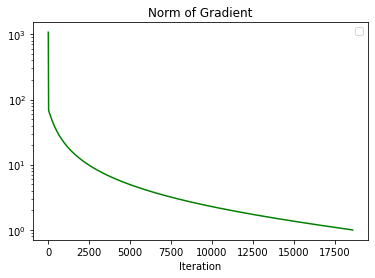

Weights: [-5.25293432 -0.06086974 -0.72502447 14.03310033  0.36920473 -1.00555164
 -0.57383854  0.2539296  -0.93630801  0.10155001 -1.53737484 -0.67541038
  8.34131453 -5.15251763 -1.07806362 -0.86808138  1.03588908  0.57463093
  2.41243094  0.24804385 -1.45758112]
Gradient: [ 0.59587304 -0.05727412 -0.03105243 -0.56038112 -0.15200962 -0.06022126
 -0.02239784 -0.08357377 -0.06390112 -0.08635882 -0.00769561 -0.05117523
 -0.29190086  0.40081237 -0.01949639 -0.08211014 -0.0896379  -0.08255084
  0.08324594 -0.05769055  0.00696178]
Iterations: 18588
Time taken: 15.150993824005127
Lambda:  0.00018102449547608579


In [4]:
current = time.time()
LAMB = 1/np.max( np.linalg.svd( xTrain @ xTrain.T )[1] )
w_list = []
gr = []
count = 1
x = xTrain
y = yTrain
w = weights
while np.linalg.norm(log_gradient(w, x, y)) > 1:
    w1 = GD(w, x , y , LAMB, log_gradient)
    w = w1
    w_list.append(cost_func(w,x,y))
    gr.append(np.linalg.norm(log_gradient(w, x, y)))
    count += 1
#     print('norm: ', np.linalg.norm(log_gradient(w, x, y)))
#     print('weights: ', log_gradient(w, x, y))
    
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.title(label = 'Norm of Gradient')
plt.yscale('log')
plt.xlabel('Iteration')
plt.legend(loc='best')
plt.show()
print('Weights:', w)
print('Gradient:', log_gradient(w, x, y) )
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', LAMB)

In [5]:
outp = predict(w, xTest)

In [9]:
sum(predict(w, xTest) == yTest)/len(xTest)

0.92

Trying error > 1e-2

No handles with labels found to put in legend.


----------------------


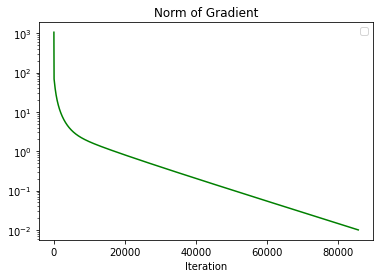

Weights: [-9.25575091e+00  6.05757683e-01  1.84604984e-01 -9.85186443e-01
 -1.17513492e+00  3.24251637e-02 -1.14856802e+00  6.05630026e-01
  5.44423926e-01 -2.72017536e-01  6.97445441e-01  8.35280547e+00
 -1.20549981e+00  9.73707293e-01  8.56756349e+00 -5.33395478e-01
  4.14567618e-01 -8.34878939e-03  6.10499671e-01  4.82006345e-01
 -1.55342351e-01]
Gradient: [ 0.00904634 -0.00112217 -0.00069364 -0.00074706 -0.00058829 -0.00099316
 -0.00068166 -0.00102527 -0.00089581 -0.00083371 -0.00067439 -0.00158911
  0.00017543 -0.00125006 -0.00137137 -0.00063709 -0.00125698 -0.00038411
 -0.00085997 -0.00087742 -0.00118887]
Iterations: 85672
Time taken: 59.41498374938965


NameError: name 'lamb' is not defined

In [42]:
current = time.time()
LAMB = 1/np.max( np.linalg.svd( xTrain @ xTrain.T )[1] )
w_list = []
gr = []
count = 1
x = xTrain
y = yTrain
w = weights
while np.linalg.norm(log_gradient(w, x, y)) > 1e-2:
    w1 = GD(w, x , y , LAMB, log_gradient)
    w = w1
    w_list.append(cost_func(w,x,y))
    gr.append(np.linalg.norm(log_gradient(w, x, y)))
    count += 1
#     print('norm: ', np.linalg.norm(log_gradient(w, x, y)))
#     print('weights: ', log_gradient(w, x, y))
    
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.title(label = 'Norm of Gradient')
plt.yscale('log')
plt.xlabel('Iteration')
plt.legend(loc='best')
plt.show()
print('Weights:', w)
print('Gradient:', log_gradient(w, x, y) )
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

In [13]:
G.norm

125.26096261088598

## Adaptive

For error > 1

No handles with labels found to put in legend.


----------------------


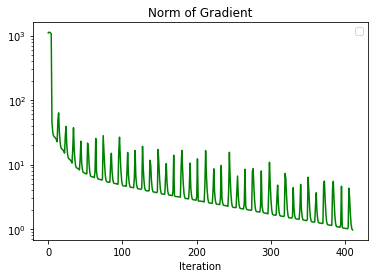

Weights: [-6.57074248  0.06837908 -0.73138931 16.20712125  0.71173241 -0.93905021
 -0.78670993  0.41414866 -0.92180032  0.2628578  -1.64029517 -0.6892218
  9.58403282 -6.26207216 -1.26912822 -0.78230739  1.21415436  0.82109624
  2.59932341  0.27040948 -1.6625621 ]
Gradient: [ 0.35892225  0.01188966 -0.0259955   0.63259915 -0.00954213 -0.0330176
 -0.15820159 -0.01659023 -0.08831352 -0.0112626  -0.07098404 -0.07681473
  0.45078862  0.02636602 -0.13799976 -0.07254333 -0.00277687  0.06681661
  0.41777326 -0.06103222 -0.12644654]
Iterations: 412
Time taken: 0.9048669338226318
Lambda:  0.00018102449547608579


In [10]:
current = time.time()
lam = random.random()
theta = 10e4
w_list = []
gr = []
Lambd = [lam]
count = 1
x = xTrain
y = yTrain
w = weights

w1 = GD(w, x , y , lam, log_gradient)

while np.linalg.norm( log_gradient(w1,x,y) ) > 1:
    lam_prev = lam
    min1 = np.sqrt(1 + theta)*lam
    min2 = np.linalg.norm(w1 - w) / ( 2*np.linalg.norm( log_gradient(w1,x,y) - log_gradient(w,x,y) ) )
#     print('min1:', min1)
#     print('min2:', min2)
    lam = np.min([min1, min2])
#     print('lambda: ',lam)
    Lambd.append(lam)
    temp = w1
    w1 = GD(w1, x , y , lam, log_gradient)
#     print('x1:', x1)
    w = temp
#     print('x:', x)
    theta = (lam/lam_prev)
#     print('theta:', theta)
    count += 1
    grad = np.linalg.norm(log_gradient(w1,x,y))
#     print('Gradient Norm:', grad)
    gr.append(grad)
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.title(label = 'Norm of Gradient')
plt.yscale('log')
plt.xlabel('Iteration')
plt.legend(loc='best')
plt.show()
print('Weights:', w)
print('Gradient:', log_gradient(w, x, y) )
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', LAMB)

In [11]:
sum(predict(w, xTest) == yTest)/len(xTest)

0.91

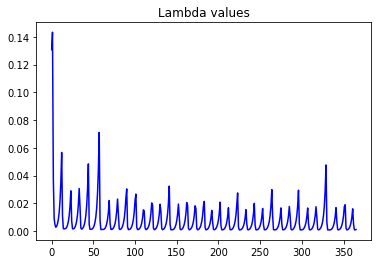

In [37]:
plt.plot(range(len(Lambd)), Lambd, c= 'b')
plt.title(label = 'Lambda values')
plt.show()

For error > 1e-6

<ipython-input-2-e6434357f5d4>:2: RuntimeWarning: overflow encountered in exp
  def sigmoid(beta, X): return 1.0/(1 + np.exp(-np.dot(X, beta)))
No handles with labels found to put in legend.


----------------------


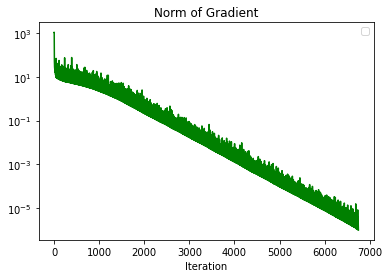

Weights: [-6.88086301  0.08800078 -0.61697544 15.31960662  0.75311091 -0.83394115
 -0.44718589  0.49131308 -0.72093756  0.34040477 -1.47617602 -0.50886609
  8.98366976 -6.18661083 -0.94614061 -0.6101949   1.28459318  0.78082803
  2.08526321  0.43117257 -1.40432494]
Gradient: [-5.35704054e-07  1.04973738e-07  1.07880158e-07  5.14895494e-07
  2.08111840e-07  1.28695558e-07  1.29516275e-07  1.53266088e-07
  1.54100581e-07  1.49409376e-07  8.72868364e-08  1.31605723e-07
  2.78743041e-07 -3.40596784e-07  1.37217579e-07  1.78403009e-07
  1.61620629e-07  1.36700165e-07 -9.40449134e-08  1.39122516e-07
  9.00459181e-08]
Iterations: 6750
Time taken: 6.914086580276489
Lambda:  0.00018102449547608579


In [12]:
current = time.time()
lam = random.random()
theta = 10e4
w_list = []
gr = []
Lambd = [lam]
count = 1
x = xTrain
y = yTrain
w = weights

w1 = GD(w, x , y , lam, log_gradient)

while np.linalg.norm( log_gradient(w1,x,y) ) > 1e-6:
    lam_prev = lam
    min1 = np.sqrt(1 + theta)*lam
    min2 = np.linalg.norm(w1 - w) / ( 2*np.linalg.norm( log_gradient(w1,x,y) - log_gradient(w,x,y) ) )
#     print('min1:', min1)
#     print('min2:', min2)
    lam = np.min([min1, min2])
#     print('lambda: ',lam)
    Lambd.append(lam)
    temp = w1
    w1 = GD(w1, x , y , lam, log_gradient)
#     print('x1:', x1)
    w = temp
#     print('x:', x)
    theta = (lam/lam_prev)
#     print('theta:', theta)
    count += 1
    grad = np.linalg.norm(log_gradient(w1,x,y))
#     print('Gradient Norm:', grad)
    gr.append(grad)
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.title(label = 'Norm of Gradient')
plt.yscale('log')
plt.xlabel('Iteration')
plt.legend(loc='best')
plt.show()
print('Weights:', w)
print('Gradient:', log_gradient(w, x, y) )
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', LAMB)

In [15]:
predict(w, xTest) == yTest

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [13]:
sum(predict(w, xTest) == yTest)/len(xTest)

0.91

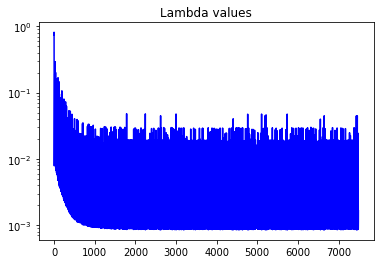

In [40]:
plt.plot(range(len(Lambd)), Lambd, c= 'b')
plt.title(label = 'Lambda values')
plt.yscale('log')
plt.show()

In [ ]:
aaa = [0]*10
bbb = [0]*10
ccc = [0]*10
for i in range(10):
    aaa[i] = A[i][0]
    bbb[i] = A[i][1]
    ccc[i] = 2*A[i][0] + 5
plt.scatter(aaa, bbb, label = 'A')
plt.scatter(aaa, b, c = 'r', label = 'b')
plt.scatter(x[0], x[1], c = 'g', label = 'x')
plt.plot(aaa, ccc, 'y')
plt.legend(loc = 'best')
plt.show

In [ ]:
def f(X, a=A,B=b):
    return 0.5*np.linalg.norm(np.matmul(a,x)-B)**2

def f_grad(X,a=A, B=b):
    return np.matmul(np.array(A).transpose(),(np.matmul(a,X)-B))

def GD(x, lamb, gradient_function):
    x1 = x - lamb*gradient_function(x)
    return x1

In [ ]:
class logregGD:
    def __init__(self, error):
        self.x_original = None
        self.y_original = None
        self.a_original = None
        self.b_original = None
        self.x = None
        self.y = None
        self.a = None
        self.b = None
        
        self.initialTime = None
        self.error = error
        self.grad = None
        self.lam = None
        self.gr = None
        self.theta = None
        
        self.vanPlt = None
        self.AdapPlt = None
        self.LSPlt = None
        self.BazPlt = None
        self.Max = 0
    
    def generate(self, function, dim, vec_len, scale):
        for i in range(dim):
            globals()['X'+str(i)] = [0]*vec_len
        for j in range(vec_len):
            globals()['X'+str(0)][j] = (random.random()+1e-12)*scale
            f = function(globals()['X'+str(0)][j])
            noiz = 3
            for k in range(dim):
                globals()['X'+str(k)][j] = f + np.random.normal(0,noiz)
                noiz += 3
        A = np.array([globals()['X'+str(i)] for i in range(dim)]).T
        self.a_original = A
        self.x_original = np.random.rand(len(A[0]))*scale
        y = [0]*len(A[0])
        for i in range(len(A[0])):
            if self.x_original[i] >= np.mean(self.x_original):
                y[i] = 1
            else:
                y[i] = 0
        self.y_original = y                
        self.b_original = A @ self.x_original + np.random.normal(0,3,(A @ self.x_original).shape)
#     def LinRegFunc(self, X):
#         return 0.5 * np.linalg.norm(self.a @ X - self.b)**2
#     def LinRegGrad(self, X):
#         return self.a.T @ (self.a @ X - self.b)
    def 
    
    def Step(self):
        self.x = self.x - self.lam*self.grad
    def BackTrack(self, alpha):
        rho = random.random()+1e-12
        c = random.random()+1e-12
        while self.LinRegFunc(self.x - alpha*self.grad) > self.LinRegFunc(self.x) \
                - c*alpha*np.linalg.norm(self.grad)**2:
                alpha = rho*alpha
        self.lam = alpha
    
    def Vanilla(self):
        self.initialTime = time.time()
        self.x = deepcopy(self.x_original)
        self.a = deepcopy(self.a_original)
        self.b = deepcopy(self.b_original)
        self.gr = []
        L = np.max( np.linalg.svd( self.a @ self.a.T ) [1] )
        self.lam = 1/L
        self.grad = self.LinRegGrad(self.x)
        while np.linalg.norm(self.grad) > self.error:
            self.Step()
            self.grad = self.LinRegGrad(self.x)
            self.gr.append(np.linalg.norm(self.grad))
        print(' \n Vanilla Gradient Descent:')
        print('_____________________________________________')
        if len(self.gr) > self.Max:
            self.Max = deepcopy(len(self.gr))
        self.SetPlots(0, len(self.gr) , 'g', self.vanPlt, 'Vanilla')
        self.PrintResults()
    
    def Adaptive(self):
        self.initialTime = time.time()
        self.x = deepcopy(self.x_original)
        self.a = deepcopy(self.a_original)
        self.b = deepcopy(self.b_original)
        self.gr = []
        self.lam = random.random()+1e-12
        self.theta = float(random.getrandbits(128))
        oldX = deepcopy(self.x)
        self.grad = self.LinRegGrad(self.x)
        self.Step()
        while np.linalg.norm(self.grad) > self.error:
            oldLam = deepcopy(self.lam)
            min1 = np.sqrt(1 + self.theta)*self.lam
            min2 = ( np.linalg.norm( self.x - oldX ) ) \
                / ( 2 * np.linalg.norm( self.LinRegGrad(self.x) - self.LinRegGrad(oldX) ) )
            self.lam = np.min([min1,min2])
            oldX = deepcopy(self.x)
            self.Step()
            self.theta = self.lam/oldLam
            self.grad = self.LinRegGrad(self.x)
            self.gr.append(np.linalg.norm(self.grad))
        print('\n Adaptive Gradient Descent:')
        print('_____________________________________________')
        if len(self.gr) > self.Max:
            self.Max = deepcopy(len(self.gr))
        self.SetPlots(0, len(self.gr) , 'y', self.AdapPlt, 'Adaptive')
        self.PrintResults()D:\Projects\Intern Roster\2021_v2.2.jl
    
    def LineSearch(self):
        self.initialTime = time.time()
        self.x = deepcopy(self.x_original)
        self.a = deepcopy(self.a_original)
        self.b = deepcopy(self.b_original)
        self.gr = []
        self.grad = self.LinRegGrad(self.x)
        alpha = float(random.getrandbits(8))
        self.BackTrack(alpha)
        k = 1000
        while np.linalg.norm(self.grad) > self.error:
            self.Step()
            self.grad =  self.LinRegGrad(self.x)
            self.gr.append(np.linalg.norm(self.grad))
#             alpha = float(random.getrandbits(8))
#             self.BackTrack(alpha)
            self.BackTrack(self.lam*2)
#             if len(self.gr) == k:
#                 self.SetPlots(k - 1000, len(self.gr), 'b', self.LSPlt, 'LineSearch')
#                 k += 1000
#             if len(self.gr) > 10:
#                 if self.gr[-1] == self.gr[-2]:
#                     print(len(self.gr))
#                     print(self.gr[-1])
        print('\n Line Search Gradient Descent:')
        print('_____________________________________________')
        if len(self.gr) > self.Max:
            self.Max = deepcopy(len(self.gr))
        self.SetPlots(0, len(self.gr) , 'b', self.LSPlt, 'LineSearch')
        self.PrintResults()
    
    def Barzilai(self):
        self.initialTime = time.time()
        self.x = deepcopy(self.x_original)
        self.a = deepcopy(self.a_original)
        self.b = deepcopy(self.b_original)
        self.gr = []
        self.grad = self.LinRegGrad(self.x)
        self.lam = random.random()+1e-12
        oldX = deepcopy(self.x)
        self.Step()
        while np.linalg.norm(self.grad) > self.error:
            oldLam = deepcopy(self.lam)
            self.lam = np.dot( self.x - oldX, self.LinRegGrad(self.x) - self.LinRegGrad(oldX) ) \
                        / np.linalg.norm(self.LinRegGrad(self.x) - self.LinRegGrad(oldX))**2
            oldX = deepcopy(self.x)
            self.Step()
            self.grad = self.LinRegGrad(self.x)
            self.gr.append(np.linalg.norm(self.grad))
        print('\n Barzilai-Borwein Gradient Descent:')
        print('_____________________________________________')
        if len(self.gr) > self.Max:
            self.Max = deepcopy(len(self.gr))
        self.SetPlots(0, len(self.gr) , 'r', self.BazPlt, 'Barzilai')
        self.PrintResults()
    
    def SetPlots(self, Min, Max, colour, name, label):
        name = plt.plot( range( Min, Max ) , self.gr[Min:Max] , c = colour , label = label)
    def PrintPlots(self):
        self.vanPlt
        self.AdapPlt
        self.LSPlt
        self.BazPlt
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.legend(loc='best')
        plt.title(label = 'Norm of Gradient in domain [{}, {}]'.format(0,self.Max) )
        plt.show()
    def PrintResults(self):
        print('At final iteration k =', len(self.gr), ':')
        print('x vector is:', self.x)
        print('Gradient Norm is:', np.linalg.norm(self.grad))
        print('Time taken:', time.time() - self.initialTime)
        print('Final Lambda value: ', self.lam)

In [ ]:
def sigmoid(t):
    if t < -700:
        return 0
    else:
        return (1 + np.e**(-t))**(-1)

In [ ]:
G = logregGD(1e-3)
G.generate(sigmoid,10,100, 1)
# G.Vanilla()
# G.LineSearch()
# G.Adaptive()
# G.Barzilai()
# G.PrintPlots()

In [ ]:
(G.a_original)

Backup

In [4]:
# Adapted from https://www.geeksforgeeks.org/understanding-logistic-regression/ 
def sigmoid(beta, X): return 1.0/(1 + np.exp(-np.dot(X, beta))) 

In [5]:
def normalise(X): 
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X 

In [6]:
sample_data = ds(n_samples=1000)
augmented_data = np.concatenate((np.array([[1]*len(sample_data[0])]).T,normalise(sample_data[0])), axis =1)
entire_set = list(sample_data)
entire_set[0] = augmented_data
xTrain, xTest, yTrain, yTest = split(entire_set[0], entire_set[1], test_size = 0.1, random_state= 13)
weights = np.random.rand(len(xTrain[0]),1)

In [7]:
def cost_func(w, X, y): 
    sig = sigmoid(w, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(sig) 
    step2 = (1 - y) * np.log(1 - sig) 
    final = -step1 - step2 
    return np.mean(final) 

In [8]:
cost_func(weights, xTrain, yTrain)

2.3704004336242517

In [78]:
def log_gradient(w, X, y):
    sig = sigmoid(w, X)
    inner_expr = np.squeeze(sig) - np.squeeze(y.reshape(X.shape[0],-1))
    return np.dot(inner_expr.T, X)

In [41]:
len(xTrain[0])

21

In [77]:
np.dot(np.squeeze(sigmoid(weights, xTrain)) - np.squeeze(yTrain.reshape(xTrain.shape[0],-1)), xTrain)

array([442.27933206, 236.01709427, 248.63716186, 214.48273504,
       208.14294535, 220.55039321, 251.97958863, 191.03446622,
       214.11305482, 219.00927582, 199.41458244, 200.41171925,
       196.55793629, 209.53051613, 209.81251252, 224.07558207,
       229.7430419 , 322.34100171, 171.71999343, 122.88571779,
       214.34447969])

In [48]:
log_gradient(weights, xTrain, yTrain)

array([442.27933206, 236.01709427, 248.63716186, 214.48273504,
       208.14294535, 220.55039321, 251.97958863, 191.03446622,
       214.11305482, 219.00927582, 199.41458244, 200.41171925,
       196.55793629, 209.53051613, 209.81251252, 224.07558207,
       229.7430419 , 322.34100171, 171.71999343, 122.88571779,
       214.34447969])

In [47]:
weights

array([[0.13624484],
       [0.02577269],
       [0.52022405],
       [0.40528379],
       [0.70045732],
       [0.40699504],
       [0.15214619],
       [0.93313221],
       [0.62913832],
       [0.51998177],
       [0.04019056],
       [0.26462292],
       [0.77185755],
       [0.80016782],
       [0.70412173],
       [0.63556158],
       [0.69815821],
       [0.01946515],
       [0.69640907],
       [0.084001  ],
       [0.26177002]])

In [79]:
def GD(w, x, y, lamb, gradient_function):
    w1 = np.squeeze(w) - lamb*gradient_function(w, x, y)  # we need to add the new params
    return w1

In [80]:
noone = GD(weights, xTrain, yTrain, 0.1, log_gradient)

In [64]:
np.squeeze(weights)

array([0.13624484, 0.02577269, 0.52022405, 0.40528379, 0.70045732,
       0.40699504, 0.15214619, 0.93313221, 0.62913832, 0.51998177,
       0.04019056, 0.26462292, 0.77185755, 0.80016782, 0.70412173,
       0.63556158, 0.69815821, 0.01946515, 0.69640907, 0.084001  ,
       0.26177002])

In [58]:
noone

array([-44.09168837, -23.57593673, -24.34349214, -21.04298972,
       -20.11383721, -21.64804428, -25.04581267, -18.17031441,
       -20.78216717, -21.38094582, -19.90126768, -19.776549  ,
       -18.88393607, -20.15288379, -20.27712952, -21.77199663,
       -22.27614598, -32.21463502, -16.47559028, -12.20457078,
       -21.17267795])

In [59]:
np.squeeze(noone)

array([-44.09168837, -23.57593673, -24.34349214, -21.04298972,
       -20.11383721, -21.64804428, -25.04581267, -18.17031441,
       -20.78216717, -21.38094582, -19.90126768, -19.776549  ,
       -18.88393607, -20.15288379, -20.27712952, -21.77199663,
       -22.27614598, -32.21463502, -16.47559028, -12.20457078,
       -21.17267795])

In [70]:
noone

array([-44.09168837, -23.57593673, -24.34349214, -21.04298972,
       -20.11383721, -21.64804428, -25.04581267, -18.17031441,
       -20.78216717, -21.38094582, -19.90126768, -19.776549  ,
       -18.88393607, -20.15288379, -20.27712952, -21.77199663,
       -22.27614598, -32.21463502, -16.47559028, -12.20457078,
       -21.17267795])

In [69]:
weights

array([[0.13624484],
       [0.02577269],
       [0.52022405],
       [0.40528379],
       [0.70045732],
       [0.40699504],
       [0.15214619],
       [0.93313221],
       [0.62913832],
       [0.51998177],
       [0.04019056],
       [0.26462292],
       [0.77185755],
       [0.80016782],
       [0.70412173],
       [0.63556158],
       [0.69815821],
       [0.01946515],
       [0.69640907],
       [0.084001  ],
       [0.26177002]])

In [73]:
len(sigmoid(weights, xTrain))

900

In [76]:
np.squeeze(yTrain.reshape(xTrain.shape[0],-1))

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [81]:
second = GD(noone, xTrain, yTrain, 0.1, log_gradient)

In [82]:
second

array([  0.80831163,   0.17668633,   1.20894838,   0.57321961,
         1.52917247,   1.04979804,   0.15123272,   1.82633813,
         1.22156175,   0.73456099,   0.68633585,   1.04860831,
         1.27068143,   1.47675714,   1.45213888,   1.55070742,
         0.57013517, -10.58664087,  18.77980279,  16.47951457,
         0.51428719])

In [62]:
np.squeeze(second)

array([[ 0.80831163,  0.17668633,  1.20894838, ..., 18.77980279,
        16.47951457,  0.51428719],
       [ 0.80831163,  0.17668633,  1.20894838, ..., 18.77980279,
        16.47951457,  0.51428719],
       [ 0.80831163,  0.17668633,  1.20894838, ..., 18.77980279,
        16.47951457,  0.51428719],
       ...,
       [ 0.80831163,  0.17668633,  1.20894838, ..., 18.77980279,
        16.47951457,  0.51428719],
       [ 0.80831163,  0.17668633,  1.20894838, ..., 18.77980279,
        16.47951457,  0.51428719],
       [ 0.80831163,  0.17668633,  1.20894838, ..., 18.77980279,
        16.47951457,  0.51428719]])

In [83]:
third = GD(second, xTrain, yTrain, 0.1, log_gradient)

In [84]:
third

array([-44.10167101, -23.7810103 , -24.04192714, -21.19303316,
       -19.61674832, -21.35542886, -25.42912983, -17.56050006,
       -20.51102064, -21.49228931, -19.57600183, -19.31748415,
       -18.67083125, -19.78468086, -19.8393842 , -21.20366612,
       -22.74153835, -43.21362207,   1.14989342,   3.83477687,
       -21.23124283])